In [197]:
# ! pip install torch_geometric

In [198]:
FOLD_INDEX = 4

# Merging

In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [200]:
df_vids_gb = pd.read_csv("GBvideos.csv", on_bad_lines='skip')

In [201]:
df_vids_gb.head()

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date
0,jt2OHQh0HoQ,Live Apple Event - Apple September Event 2017 ...,Apple Event,28,apple events|apple event|iphone 8|iphone x|iph...,7426393,78240,13548,705,https://i.ytimg.com/vi/jt2OHQh0HoQ/default_liv...,13.09
1,AqokkXoa7uE,Holly and Phillip Meet Samantha the Sex Robot ...,This Morning,24,this morning|interview|holly willoughby|philli...,494203,2651,1309,0,https://i.ytimg.com/vi/AqokkXoa7uE/default.jpg,13.09
2,YPVcg45W0z4,My DNA Test Results! I'm WHAT?!,emmablackery,24,emmablackery|emma blackery|emma|blackery|briti...,142819,13119,151,1141,https://i.ytimg.com/vi/YPVcg45W0z4/default.jpg,13.09
3,T_PuZBdT2iM,getting into a conversation in a language you ...,ProZD,1,skit|korean|language|conversation|esl|japanese...,1580028,65729,1529,3598,https://i.ytimg.com/vi/T_PuZBdT2iM/default.jpg,13.09
4,NsjsmgmbCfc,Baby Name Challenge!,Sprinkleofglitter,26,sprinkleofglitter|sprinkle of glitter|baby gli...,40592,5019,57,490,https://i.ytimg.com/vi/NsjsmgmbCfc/default.jpg,13.09


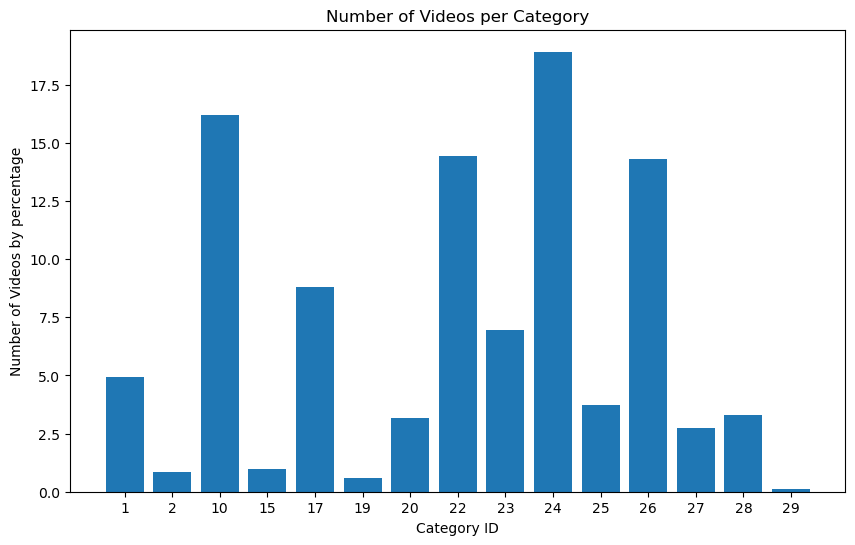

In [202]:
category_counts = df_vids_gb.groupby('category_id')['video_id'].count().reset_index(name='video_count')
total_videos = category_counts['video_count'].sum()
category_counts['percentage'] = (category_counts['video_count'] / total_videos) * 100
plt.figure(figsize=(10, 6))
plt.bar(category_counts['category_id'].astype(str), category_counts['percentage'])
plt.xlabel('Category ID')
plt.ylabel('Number of Videos by percentage')
plt.title('Number of Videos per Category')
plt.show()

In [203]:
# from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [204]:
import json

In [205]:
with open("GB_category_id.json", 'r') as file:
    cat_names = json.load(file)

In [206]:
titles = [item['snippet']['title'] for item in cat_names['items']]

print(titles)

['Film & Animation', 'Autos & Vehicles', 'Music', 'Pets & Animals', 'Sports', 'Short Movies', 'Travel & Events', 'Gaming', 'Videoblogging', 'People & Blogs', 'Comedy', 'Entertainment', 'News & Politics', 'Howto & Style', 'Education', 'Science & Technology', 'Movies', 'Anime/Animation', 'Action/Adventure', 'Classics', 'Comedy', 'Documentary', 'Drama', 'Family', 'Foreign', 'Horror', 'Sci-Fi/Fantasy', 'Thriller', 'Shorts', 'Shows', 'Trailers']


In [207]:
df_vids_gb['tags'] = df_vids_gb['tags'].str.split('|')

In [208]:
df_vids_gb

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date
0,jt2OHQh0HoQ,Live Apple Event - Apple September Event 2017 ...,Apple Event,28,"[apple events, apple event, iphone 8, iphone x...",7426393,78240,13548,705,https://i.ytimg.com/vi/jt2OHQh0HoQ/default_liv...,13.09
1,AqokkXoa7uE,Holly and Phillip Meet Samantha the Sex Robot ...,This Morning,24,"[this morning, interview, holly willoughby, ph...",494203,2651,1309,0,https://i.ytimg.com/vi/AqokkXoa7uE/default.jpg,13.09
2,YPVcg45W0z4,My DNA Test Results! I'm WHAT?!,emmablackery,24,"[emmablackery, emma blackery, emma, blackery, ...",142819,13119,151,1141,https://i.ytimg.com/vi/YPVcg45W0z4/default.jpg,13.09
3,T_PuZBdT2iM,getting into a conversation in a language you ...,ProZD,1,"[skit, korean, language, conversation, esl, ja...",1580028,65729,1529,3598,https://i.ytimg.com/vi/T_PuZBdT2iM/default.jpg,13.09
4,NsjsmgmbCfc,Baby Name Challenge!,Sprinkleofglitter,26,"[sprinkleofglitter, sprinkle of glitter, baby ...",40592,5019,57,490,https://i.ytimg.com/vi/NsjsmgmbCfc/default.jpg,13.09
...,...,...,...,...,...,...,...,...,...,...,...
7988,T2RUYYs8Hxc,DJ Cummerbund - Hey Trump!,DJ Cummerbund,10,"[eminem, freestyle, bet, rage against the mach...",118453,1846,92,240,https://i.ytimg.com/vi/T2RUYYs8Hxc/default.jpg,22.10
7989,KkQdnJK1iF8,Emotional Groom Start Crying When He Sees Brid...,Today`s Video,22,"[Today's Video, Today Video, Latest News, Last...",76096,194,19,31,https://i.ytimg.com/vi/KkQdnJK1iF8/default.jpg,22.10
7990,1zOPtQNChZM,FALLING IN LOVE WITH SANTORINI,Estée Lalonde,22,"[essiebutton, Estée Lalonde, Estee Lalonde, Es...",170003,6592,127,454,https://i.ytimg.com/vi/1zOPtQNChZM/default.jpg,22.10
7991,Z7R8XRKqHAI,Hey Ya! - Walk off the Earth (Outkast Cover),Walk off the Earth,10,"[hey ya cover, amazing cover, Shape of You Wal...",893125,44811,652,2056,https://i.ytimg.com/vi/Z7R8XRKqHAI/default.jpg,22.10


Word CLoud for all tags from all the trending videos from Great Britain

In [209]:
# all_tags_list = sum(df_vids_gb['tags'], [])

# # Convert the list of tags into a single string with spaces
# all_tags_string = ' '.join(all_tags_list)

# # Generating the word cloud
# wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_tags_string)

# plt.figure(figsize=(10, 5))
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')
# plt.show()

In [210]:
df_vids_gb_sorted = df_vids_gb.sort_values(by=['video_id', 'comment_total'], ascending=[True, False])

In [211]:
df_vids_gb_unique = df_vids_gb_sorted.drop_duplicates(subset='video_id', keep='first')

In [212]:
df_vids_gb_unique.shape

(1736, 11)

In [213]:
df_vids_gb_unique_sorted = df_vids_gb_unique.sort_values(by='views', ascending=False)
top_10_percent_count = int(np.ceil(len(df_vids_gb_unique_sorted) * 0.1))
top_10_percent_videos = df_vids_gb_unique_sorted.head(top_10_percent_count)

In [214]:
top_10_percent_videos

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date
2767,MBdVXkSdhwU,BTS (방탄소년단) 'DNA' Official MV,ibighit,10,"[BIGHIT, 빅히트, 방탄소년단, BTS, BANGTAN, 방탄]",58961407,2289911,96258,813322,https://i.ytimg.com/vi/MBdVXkSdhwU/default.jpg,26.09
592,QeaumjX9DNY,Yandel - Como Antes (Official Video) ft. Wisin,YandelVEVO,10,"[Wisinyyandel, wisin&yandel, yandelywisin, yan...",42486342,678389,13995,48429,https://i.ytimg.com/vi/QeaumjX9DNY/default.jpg,15.09
572,tt2k8PGm-TI,ZAYN - Dusk Till Dawn ft. Sia,ZaynVEVO,10,"[Dusk Till Dawn, Pop, RCA Records Label, ZAYN ...",41959549,1502097,30036,104931,https://i.ytimg.com/vi/tt2k8PGm-TI/default.jpg,15.09
2189,SHq2qrFUlGY,Shakira - Perro Fiel (Official Video) ft. Nick...,shakiraVEVO,10,"[Shakira ft. Nicky Jam, Shakira ft. Nicky Jam ...",38144440,624008,47220,41131,https://i.ytimg.com/vi/SHq2qrFUlGY/default.jpg,23.09
7284,LunHybOKIjU,Eminem Rips Donald Trump In BET Hip Hop Awards...,BETNetworks,24,"[BET, BET Networks, BET Music, Black Entertain...",33696905,993408,186722,340869,https://i.ytimg.com/vi/LunHybOKIjU/default.jpg,19.10
...,...,...,...,...,...,...,...,...,...,...,...
7952,TYR_7CeO39E,Sexiest Male Vocalist Riff-Off w/ Usher & Luke...,The Late Late Show with James Corden,24,"[James Corden, The Late Late Show, Colbert, la...",2183926,47301,1148,3104,https://i.ytimg.com/vi/TYR_7CeO39E/default.jpg,22.10
4532,QlRWZuKPVoo,Era Istrefi - No I Love Yous feat. French Mont...,Ultra Music,10,"[ultra records, ultra music, ultrarecords, ult...",2177949,34459,2274,2854,https://i.ytimg.com/vi/QlRWZuKPVoo/default.jpg,5.10
653,xHvVhhFvLtY,SPIKED by a Sea Urchin?,Brave Wilderness,15,"[sting, stung, stinging, adventure, adventurou...",2161849,45013,917,7757,https://i.ytimg.com/vi/xHvVhhFvLtY/default.jpg,16.09
5132,8hP6WROycAU,One More Light (Official Lyric Video) - Linkin...,Linkin Park,10,"[Linkin Park, One More Light, Lyrics, Lyric Vi...",2138277,172365,1195,11752,https://i.ytimg.com/vi/8hP6WROycAU/default.jpg,8.10


Top Tags based on views ( top 10%) Great Britain

In [215]:
# tags_list = sum(top_10_percent_videos['tags'], [])

# # Convert the list of tags into a single string with spaces
# tags_string = ' '.join(tags_list)

# # Generating the word cloud
# wordcloud = WordCloud(width=800, height=400, background_color='white').generate(tags_string)

# plt.figure(figsize=(10, 5))
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')
# plt.show()

In [216]:
# bottom_10_percent_count = int(np.ceil(len(df_vids_gb_unique_sorted) * 0.1))
# bottom_10_percent_videos = df_vids_gb_unique_sorted.tail(bottom_10_percent_count)

# tags_list_bottom = sum(bottom_10_percent_videos['tags'], [])

# # Convert the list of tags into a single string with spaces
# tags_string_bottom = ' '.join(tags_list_bottom)

# # Generating the word cloud
# wordcloud = WordCloud(width=800, height=400, background_color='white').generate(tags_string_bottom)

# plt.figure(figsize=(10, 5))
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')
# plt.show()


In [217]:
# from textblob import TextBlob

In [218]:
# df_comments_gb = pd.read_csv("GBcomments.csv", error_bad_lines=False)
df_comments_gb = pd.read_csv("GBcomments.csv", on_bad_lines='skip')

In [219]:
df_comments_gb.shape

(718452, 4)

In [220]:
df_comments_gb.head()

,video_id,comment_text,likes,replies
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0


In [221]:
import pandas as pd
# from textblob import TextBlob
import re

def clean_text(text):
    """Remove special characters, numbers, and other unnecessary parts from the text."""
    # Ensure the input is a string
    if not isinstance(text, str):
        text = str(text)
    # text = re.sub(r'[^a-zA-Z\s\.\,\!\?\:\;\'\"]', '', text)  # Keep only letters and spaces

    text = re.sub(r'[^\x00-\x7F]+', '', text)         # ascii

    text = text.replace('\\n', ' ')
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with a single space
    return text.strip().lower()

df_comments_gb['cleaned_comment_text'] = df_comments_gb['comment_text'].apply(clean_text)

# def categorize_sentiment(text):
#     """Analyze sentiment of the text and categorize as positive, negative, or neutral."""
#     analysis = TextBlob(text)
#     if analysis.sentiment.polarity > 0:
#         return 'Positive'
#     elif analysis.sentiment.polarity < 0:
#         return 'Negative'
#     else:
#         return 'Neutral'

# Applying sentiment analysis
# df_comments_gb['sentiment'] = df_comments_gb['cleaned_comment_text'].apply(categorize_sentiment)

# Counting the number of positive, negative, and neutral comments
# sentiment_counts = df_comments_gb['sentiment'].value_counts()

# print(sentiment_counts)

In [222]:
df_comments_gb.head()

,video_id,comment_text,likes,replies,cleaned_comment_text
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0,it's more accurate to call it the m+ (1000) be...
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0,to be there with a samsung phone
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0,"thank gosh, a place i can watch it without hav..."
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0,what happened to the home button on the iphone...
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0,power is the disease. care is the cure. keep c...


In [223]:
max_comments = df_vids_gb.loc[df_vids_gb.groupby('video_id')['comment_total'].idxmax()]
# print(max_comments)

In [224]:
print(type(max_comments))

<class 'pandas.core.frame.DataFrame'>


In [225]:
merged_df = pd.merge(df_comments_gb, max_comments, on='video_id', how='inner')

merged_df

,video_id,comment_text,likes_x,replies,cleaned_comment_text,title,channel_title,category_id,tags,views,likes_y,dislikes,comment_total,thumbnail_link,date
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0,it's more accurate to call it the m+ (1000) be...,Live Apple Event - Apple September Event 2017 ...,Apple Event,28,"[apple events, apple event, iphone 8, iphone x...",8443106,86006,15504,2381,https://i.ytimg.com/vi/jt2OHQh0HoQ/default_liv...,16.09
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0,to be there with a samsung phone,Live Apple Event - Apple September Event 2017 ...,Apple Event,28,"[apple events, apple event, iphone 8, iphone x...",8443106,86006,15504,2381,https://i.ytimg.com/vi/jt2OHQh0HoQ/default_liv...,16.09
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0,"thank gosh, a place i can watch it without hav...",Live Apple Event - Apple September Event 2017 ...,Apple Event,28,"[apple events, apple event, iphone 8, iphone x...",8443106,86006,15504,2381,https://i.ytimg.com/vi/jt2OHQh0HoQ/default_liv...,16.09
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0,what happened to the home button on the iphone...,Live Apple Event - Apple September Event 2017 ...,Apple Event,28,"[apple events, apple event, iphone 8, iphone x...",8443106,86006,15504,2381,https://i.ytimg.com/vi/jt2OHQh0HoQ/default_liv...,16.09
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0,power is the disease. care is the cure. keep c...,Live Apple Event - Apple September Event 2017 ...,Apple Event,28,"[apple events, apple event, iphone 8, iphone x...",8443106,86006,15504,2381,https://i.ytimg.com/vi/jt2OHQh0HoQ/default_liv...,16.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
718447,XQFeShp6UIY,Exploit used = Not World‘s First. Simple.,2,2,exploit used = not worlds first. simple.,World's First Prestige Leviathan Raid Completi...,Gladd,20,"[destiny, destiny 2, destiny 2 leviathan raid,...",19035,340,157,284,https://i.ytimg.com/vi/XQFeShp6UIY/default.jpg,22.10
718448,XQFeShp6UIY,Some exotics in Destiny have hidden perks. The...,3,4,some exotics in destiny have hidden perks. the...,World's First Prestige Leviathan Raid Completi...,Gladd,20,"[destiny, destiny 2, destiny 2 leviathan raid,...",19035,340,157,284,https://i.ytimg.com/vi/XQFeShp6UIY/default.jpg,22.10
718449,XQFeShp6UIY,Why is there a race if it's literally the same...,1,3,why is there a race if it's literally the same...,World's First Prestige Leviathan Raid Completi...,Gladd,20,"[destiny, destiny 2, destiny 2 leviathan raid,...",19035,340,157,284,https://i.ytimg.com/vi/XQFeShp6UIY/default.jpg,22.10
718450,XQFeShp6UIY,Who the fuck cares about some stupid heavy gli...,0,2,who the fuck cares about some stupid heavy gli...,World's First Prestige Leviathan Raid Completi...,Gladd,20,"[destiny, destiny 2, destiny 2 leviathan raid,...",19035,340,157,284,https://i.ytimg.com/vi/XQFeShp6UIY/default.jpg,22.10


In [226]:
merged_df.shape

merged_df.to_csv('merged_GB.csv')

In [227]:
import pandas as pd
import re
import torch
import torch.nn as nn
from torch_geometric.utils import to_networkx
from transformers import AutoModel, AutoTokenizer
from torch_geometric.nn import RGCNConv
from torch_geometric.data import Data
from tqdm import tqdm
import networkx as nx
import matplotlib.pyplot as plt

# Preprocessing

In [228]:
# replace file name with the merged file you got from running Varad's notbook
filename = 'merged_GB.csv'
merged_df = pd.read_csv(filename,on_bad_lines='skip')

In [229]:
grouped_df = merged_df.sort_values(by='likes_x',ascending=False).groupby('video_id')
merged_df = merged_df.drop(['replies','thumbnail_link'],axis=1)

In [230]:
def parse_tags(tag_str: str) -> list:
    # split tags into list because the tags column is not in json format :(
    tags = re.sub(r"[\[\]]","",tag_str).split(',')

    # drop the single quotes
    tags = [tag[1:-1] for tag in tags]

    return tags

In [231]:
video_nodes = []
prediction_nodes = []

y = None

for video_id, data in grouped_df:
    curr_video_nodes = []
    curr_prediction_nodes = []

    # these are put into seperate file because these are predictions
    for col, val in data[['likes_y','dislikes','views']].iloc[0].items():
        curr_prediction_nodes.append((val,col,video_id))

    # data = data.drop(['likes_y','dislikes','views'],axis=1)

    # append nodes
    for col, val in data.iloc[0].drop(['video_id','likes_x','tags','date']).items():
        curr_video_nodes.append((val,col,video_id))

    # append comment nodes
    # print(data.columns)
    for comment in data['cleaned_comment_text']:
        curr_video_nodes.append((comment,'cleaned_comment_text',video_id))

    # load tags as array and append as nodes
    tags = parse_tags(data['tags'].iloc[0])

    for tag in tags:
        if tag[0] == "'":
            tag = tag[1:]
        curr_video_nodes.append((tag,'tags',video_id))
    # raise

    video_nodes.append(curr_video_nodes)
    prediction_nodes.append(curr_prediction_nodes)

video_df = pd.DataFrame(video_nodes)
prediction_df = pd.DataFrame(prediction_nodes)
video_df.head()

,0,1,2,3,4,5,6,7,8,9,...,1226,1227,1228,1229,1230,1231,1232,1233,1234,1235
0,"(700812, Unnamed: 0, --JinobXWPk)",(Coyote: LOOK OUT LOOK OUT LOOK OUT \nMe: GET ...,"(0, replies, --JinobXWPk)",(coyote: look out look out look out me: get aw...,"(DANGEROUS Jungle Spider!, title, --JinobXWPk)","(Brave Wilderness, channel_title, --JinobXWPk)","(15, category_id, --JinobXWPk)","(1709248, views, --JinobXWPk)","(44999, likes_y, --JinobXWPk)","(627, dislikes, --JinobXWPk)",...,None,None,None,None,None,None,None,None,None,None
1,"(257489, Unnamed: 0, --y69Ui8xwM)","(The Giroud goal has to win it for me., commen...","(9, replies, --y69Ui8xwM)","(the giroud goal has to win it for me., cleane...","(FIFA Puskás Award 2017 - ALL NOMINEES, title,...","(LilWiz, channel_title, --y69Ui8xwM)","(17, category_id, --y69Ui8xwM)","(46479, views, --y69Ui8xwM)","(408, likes_y, --y69Ui8xwM)","(19, dislikes, --y69Ui8xwM)",...,None,None,None,None,None,None,None,None,None,None
2,"(51057, Unnamed: 0, -1fzGnFwz9M)",(I make interesting cartoons and I need your h...,"(5, replies, -1fzGnFwz9M)",(i make interesting cartoons and i need your h...,(9 Things You Need To Know About Kittens - Sim...,"(Simon's Cat, channel_title, -1fzGnFwz9M)","(15, category_id, -1fzGnFwz9M)","(197531, views, -1fzGnFwz9M)","(7176, likes_y, -1fzGnFwz9M)","(117, dislikes, -1fzGnFwz9M)",...,None,None,None,None,None,None,None,None,None,None
3,"(167539, Unnamed: 0, -2hRYEFiPSA)",(One thing that's upset me the most about Ches...,"(2, replies, -2hRYEFiPSA)",(one thing that's upset me the most about ches...,(Mike Shinoda of Linkin Park - KROQ Interview:...,"(LPAssociation, channel_title, -2hRYEFiPSA)","(10, category_id, -2hRYEFiPSA)","(149920, views, -2hRYEFiPSA)","(4766, likes_y, -2hRYEFiPSA)","(28, dislikes, -2hRYEFiPSA)",...,None,None,None,None,None,None,None,None,None,None
4,"(268113, Unnamed: 0, -6Zc8Co2H3w)","(Sub Rosa, the episode where Crusher masturbat...","(0, replies, -6Zc8Co2H3w)","(sub rosa, the episode where crusher masturbat...",(Honest Trailers - Star Trek: The Next Generat...,"(Screen Junkies, channel_title, -6Zc8Co2H3w)","(1, category_id, -6Zc8Co2H3w)","(1546160, views, -6Zc8Co2H3w)","(42954, likes_y, -6Zc8Co2H3w)","(1075, dislikes, -6Zc8Co2H3w)",...,None,None,None,None,None,None,None,None,None,None


# Graph Data

In [232]:
views = []
for i in prediction_df[[2]].values[:, 0][:]:
    views.append(i[0])


min_views, max_views = torch.tensor(views).min(), torch.tensor(views).max()

In [233]:


def make_data(video_links, min, max, threshold=None, for_show=False):

    x = []
    edge_index = []
    edge_type = []
    y = []

    super_node_index = 0
    x.append((0, 'super'))

    node_id = 1
    type_id = 0
    types_dict = {}

    valid_edge_types = [
                'cleaned_comment_text',
                'title',
                'channel_title',
                'category_id',
                'tags'
            ]

    node_types = dict(zip(valid_edge_types, ['text', 'text', 'channel', 'category', 'text']))

    count_0 = 0
    count_4 = 0

    for link in video_links:
        if link:
            source, edge, destination = link
            # print(source, edge, destination)
            if edge == 'views':

                y.append((source - min) / (max - min))
                # y.append(source)
            if edge not in valid_edge_types:
                continue

            if edge == 'cleaned_comment_text':
                count_0 += 1
                if threshold:
                  if count_0 > threshold:
                    continue
            if edge == 'tags' :
                count_4 += 1
                if threshold:
                  if count_4 > threshold:
                    continue

            edge_index.append([node_id, super_node_index])
            edge_index.append([super_node_index, node_id])
            node_id += 1

            x.append((source, node_types[edge]))
            try:
                edge_type.append(types_dict[edge])
                edge_type.append(types_dict[edge])
            except:
                types_dict[edge] = type_id
                type_id += 1

                edge_type.append(types_dict[edge])
                edge_type.append(types_dict[edge])
            # print(source, edge, destination)

    # x
    # torch.tensor(x).shape

    data = Data(x=x, edge_index=torch.tensor(edge_index).t(), edge_type=torch.tensor(edge_type), y=torch.tensor(y))
    # data.y = torch.log(data.y)
    if for_show:
        return data, types_dict
    else:
        return data
# edge_type
# x[-10:], edge_type[-10:],edge_index[-10:], types_dict

/home/mastaraan/anaconda3/envs/new/lib/python3.11/site-packages/torch_geometric/data/storage.py:327: UserWarning: Unable to accurately infer 'num_nodes' from the attribute set '{'edge_type', 'x', 'edge_index', 'y'}'. Please explicitly set 'num_nodes' as an attribute of 'data' to suppress this warning
  warnings.warn(


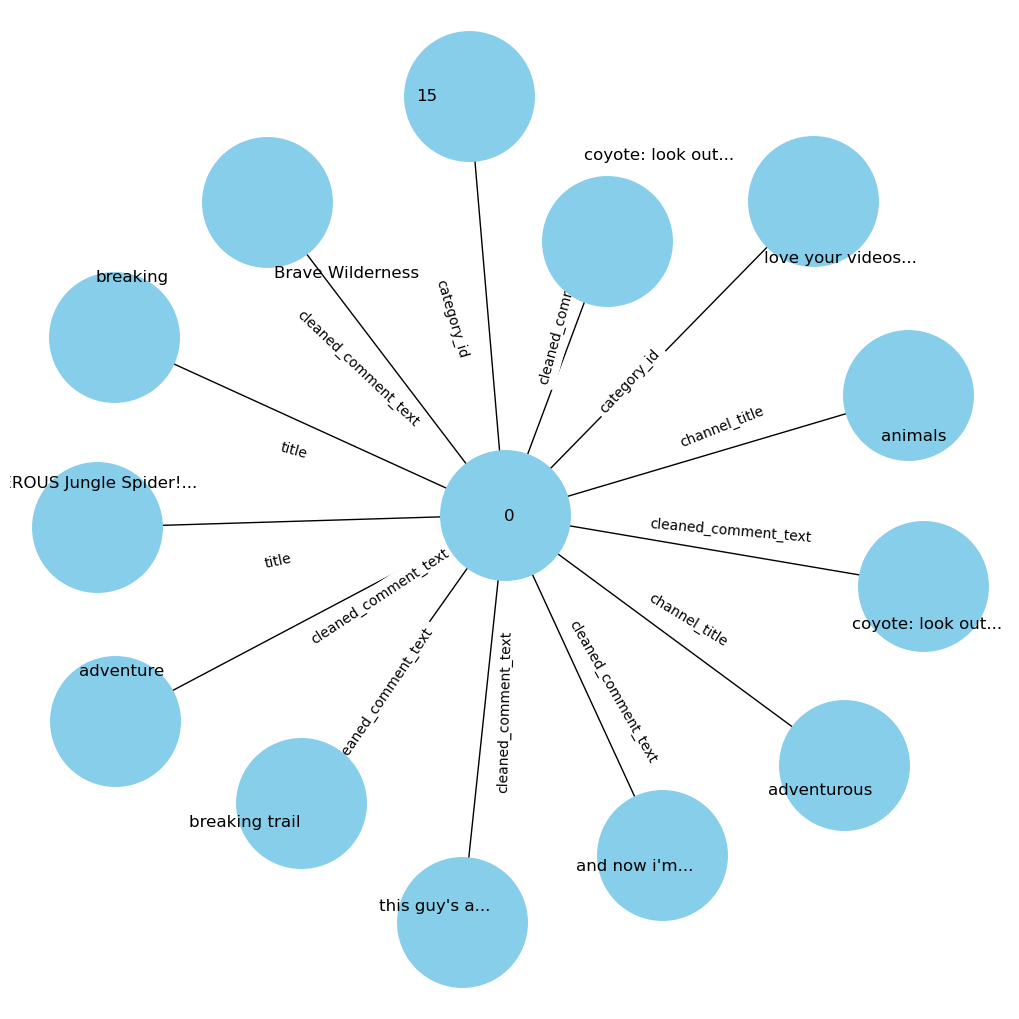

In [234]:
plt.gcf().set_size_inches(10, 10)

data, td = make_data(video_df.iloc[0], min_views, max_views, threshold=5, for_show=True)
td = {v: k for k, v in td.items()}
G = to_networkx(data, to_undirected=True)

for i, node_x in enumerate(data.x):
    if node_x[-1] == 'text':
        min_len = min(len(node_x[0].split(' ')), 3)
        if min_len < 3:
            add = ''
        else:
            add = '...'
        G.nodes[i]['label'] = ' '.join(node_x[0].split(' ')[:min_len]) + add
    else:
        G.nodes[i]['label'] = node_x[0]

for i, (u, v) in enumerate(G.edges()):
    G[u][v]['label'] = td[data.edge_type[i].item()]


nx.draw(G, with_labels=False, node_color='skyblue', node_size=8700, edge_color='k')

pos = nx.spring_layout(G)
node_labels = nx.get_node_attributes(G, 'label')
nx.draw_networkx_labels(G, pos, labels=node_labels)

pos = nx.spring_layout(G)
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.show()

# Naive

In [258]:
class Naive(nn.Module):
    def __init__(self, channel_id, num_categories, ff_dims, dropout, *args, **kwargs) -> None:
        super(Naive, self).__init__(*args, **kwargs)

        # self.num_relations = num_relations
        # self.conv_dims = conv_dims
        self.ff_dims = ff_dims
        self.dropout_rate = dropout

        model_name = "prajjwal1/bert-tiny"
        self.tokenizer = AutoTokenizer.from_pretrained(model_name)
        self.bert = AutoModel.from_pretrained(model_name)
        self.embedding_size = 128
        self.channel_id = channel_id
        self.num_categories = num_categories

        self.channel_enc = nn.Embedding(len(self.channel_id.keys()), self.embedding_size)
        self.category_enc = nn.Embedding(num_categories, self.embedding_size)

        dims = [self.embedding_size]
        # self.conv = nn.ModuleList(
        #     [
        #         RGCNConv(
        #             dim, dims[i+1], self.num_relations
        #         )
        #         for i, dim in enumerate(dims[:-1])
        #     ]
        # )
        self.activation = nn.ReLU()
        self.dropout = nn.Dropout(self.dropout_rate)

        dims = dims + self.ff_dims
        self.ff = nn.ModuleList(
            [
                nn.Linear(
                    dim, dims[i + 1]
                )
                for i, dim in enumerate(dims[:-1])
            ]
        )

        self.bn = nn.ModuleList(
            [
                nn.BatchNorm1d(dim)
                for dim in dims
            ]
        )

        self.output_ff = nn.Linear(dims[-1], 1)

    @property
    def device(self):
        return next(self.parameters()).device

    def pre_encode(self, x):
        ret = []
        for i, node_x in enumerate(x):
            if node_x[-1] == 'text':
                inputs = self.tokenizer(
                    str(node_x[0]),
                    return_tensors="pt",
                    padding=True,
                    truncation=True,
                    max_length=512
                )
                inputs = {k: v.to(self.device) for k, v in inputs.items()}
                with torch.no_grad():
                    self.bert.eval()
                    encoded = self.bert(**inputs)
                ret.append(encoded.pooler_output.reshape(-1))
                # print(node_x)

            elif node_x[-1] == 'super':
                ret.append(torch.zeros(self.embedding_size).to(self.device))
            elif node_x[-1] == 'channel':
                t = torch.tensor(self.channel_id[node_x[0]]).long().to(self.device)
                ret.append(self.channel_enc(t))
            elif node_x[-1] == 'category':
                t = torch.tensor(node_x[0]).long().to(self.device)
                ret.append(self.category_enc(t))

        return torch.stack(ret).to(self.device)

    def forward(self, data):
        x = self.pre_encode(data.x).to(self.device)

        x = self.bn[0](x).sum(0).reshape(1, -1)
        

        for ff in self.ff:
            residual = ff(x)
            # print(bn, residual.shape)
            # residual = bn(residual)
            residual = self.activation(residual)
            residual = self.dropout(residual)

            try:
                x = x + residual
            except:
                x = residual

        x = self.output_ff(x)
        x = self.dropout(x)
        
        return torch.exp(x.reshape(-1))


# GNN

In [236]:
class GNN(nn.Module):
    def __init__(self, num_relations, channel_id, num_categories, conv_dims, ff_dims, dropout, *args, **kwargs) -> None:
        super(GNN, self).__init__(*args, **kwargs)

        self.num_relations = num_relations
        self.conv_dims = conv_dims
        self.ff_dims = ff_dims
        self.dropout_rate = dropout

        model_name = "prajjwal1/bert-tiny"
        self.tokenizer = AutoTokenizer.from_pretrained(model_name)
        self.bert = AutoModel.from_pretrained(model_name)
        self.embedding_size = 128
        self.channel_id = channel_id
        self.num_categories = num_categories

        self.channel_enc = nn.Embedding(len(self.channel_id.keys()), self.embedding_size)
        self.category_enc = nn.Embedding(num_categories, self.embedding_size)

        dims = [self.embedding_size] + self.conv_dims
        self.conv = nn.ModuleList(
            [
                RGCNConv(
                    dim, dims[i+1], self.num_relations
                )
                for i, dim in enumerate(dims[:-1])
            ]
        )
        self.activation = nn.ReLU()
        self.dropout = nn.Dropout(self.dropout_rate)

        dims = dims + self.ff_dims
        self.ff = nn.ModuleList(
            [
                nn.Linear(
                    dim, dims[i + len(self.conv_dims) + 1]
                )
                for i, dim in enumerate(dims[len(self.conv_dims):-1])
            ]
        )

        self.bn = nn.ModuleList(
            [
                nn.BatchNorm1d(dim)
                for dim in dims
            ]
        )

        self.output_ff = nn.Linear(dims[-1], 1)

    @property
    def device(self):
        return next(self.parameters()).device

    def pre_encode(self, x):
        ret = []
        for i, node_x in enumerate(x):
            if node_x[-1] == 'text':
                inputs = self.tokenizer(
                    str(node_x[0]),
                    return_tensors="pt",
                    padding=True,
                    truncation=True,
                    max_length=512
                )
                inputs = {k: v.to(self.device) for k, v in inputs.items()}
                with torch.no_grad():
                    self.bert.eval()
                    encoded = self.bert(**inputs)
                ret.append(encoded.pooler_output.reshape(-1))
                # print(node_x)

            elif node_x[-1] == 'super':
                ret.append(torch.zeros(self.embedding_size).to(self.device))
            elif node_x[-1] == 'channel':
                t = torch.tensor(self.channel_id[node_x[0]]).long().to(self.device)
                ret.append(self.channel_enc(t))
            elif node_x[-1] == 'category':
                t = torch.tensor(node_x[0]).long().to(self.device)
                ret.append(self.category_enc(t))

        return torch.stack(ret).to(self.device)

    def forward(self, data):
        x = self.pre_encode(data.x).to(self.device)

        x = self.bn[0](x)

        for conv, bn in zip(self.conv, self.bn[1: len(self.conv_dims) + 1]):
            residual = conv(x=x, edge_index=data.edge_index.to(self.device), edge_type=data.edge_type.to(self.device))

            residual = bn(residual)
            residual = self.activation(residual)
            residual = self.dropout(residual)

            try:
                x = x + residual
            except:
                x = residual

        for ff, bn in zip(self.ff, self.bn[len(self.conv_dims) + 2:]):
            residual = ff(x)
            # print(bn, residual.shape)
            residual = bn(residual)
            residual = self.activation(residual)
            residual = self.dropout(residual)

            try:
                x = x + residual
            except:
                x = residual

        x = self.output_ff(x)
        x = self.dropout(x)
        return torch.exp(x[0])


In [237]:
def train(gnn, data, optimizer, loss_fn):
    gnn.train()

    optimizer.zero_grad()

    y_hat = gnn(data)

    # print(y_hat, data.y)
    # print('what we had')

    loss = loss_fn(y_hat, data.y.float())

    loss.backward()

    optimizer.step()

    return loss.item()


In [238]:
@torch.no_grad()
def eval(gnn, data, criterion):
    gnn.eval()

    y_hat = gnn(data)

    return criterion(y_hat, data.y.float()).item()


# Training/Testing


## Folds

In [239]:
data_list = []
for video_links in video_df.iloc:
    # data = make_data(video_links, min_views, max_views, threshold=50)
    data = make_data(video_links, 0, 1, threshold=50)
    data_list.append(data)

index = torch.randperm(len(data_list))
# train_size = int(.8 * index.shape[0])

# train_data = [data_list[i] for i in index[:train_size]]
# test_data = [data_list[i] for i in index[train_size:]]

In [240]:
index.numpy()

from sklearn.model_selection import KFold

kf = KFold(n_splits=5)

print(kf)
KFold(n_splits=5, random_state=None, shuffle=False)
for i, (train_index, test_index) in enumerate(kf.split(index.numpy())):
    if i == FOLD_INDEX:
        train_data = [data_list[i] for i in train_index]
        test_data = [data_list[i] for i in test_index]
        print(f"Fold {i}:")
        print(f"  Train: index={train_index.shape}")
        print(f"  Test:  index={test_index.shape}")
        break

KFold(n_splits=5, random_state=None, shuffle=False)
Fold 4:
  Train: index=(1354,)
  Test:  index=(338,)


## Neural Naive (Pooling)

In [259]:
num_channels = pd.unique(merged_df['channel_title']).shape[0]
channel_id = dict(zip(pd.unique(merged_df['channel_title']), [i for i in range(num_channels)]))

num_categories = pd.unique(merged_df['category_id']).max() * 2

device = 'cuda' if torch.cuda.is_available() else 'cpu'

naive = Naive(channel_id, num_categories, [1024, 1024], 0.3).to(device)

# naive(data)

num_channels = pd.unique(merged_df['channel_title']).shape[0]
channel_id = dict(zip(pd.unique(merged_df['channel_title']), [i for i in range(num_channels)]))

num_categories = pd.unique(merged_df['category_id']).max() * 2

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# input_tensor = input_tensor.to(device)
# output_tensor = output_tensor.to(device)

# gnn = GNN(5, channel_id, num_categories, [84, 84], [128, 128], 0.2).to(device)

loss_fn = nn.PoissonNLLLoss(log_input=False, full=True)
optimizer = torch.optim.Adam(naive.parameters(), lr=1e-3)
# gnn.bn


for e in range(25):
    e_loss = 0
    error_l1 = 0
    error_rmse = 0
    for data in tqdm(train_data):

        data.y = data.y.to(device)
        e_loss += train(naive, data, optimizer, loss_fn)
    for data in tqdm(test_data):
        data.y = data.y.to(device)
        # error += (eval(gnn, data, loss_fn) * (max_views - min_views) + min_views)
        if data.y:
            # error += (eval(gnn, data, nn.L1Loss()) * (max_views - min_views) + min_views) / (data.y * (max_views - min_views) + min_views)
            error_l1 += eval(naive, data, nn.L1Loss()) / data.y
            error_rmse += (eval(naive, data, nn.L1Loss())  / data.y) ** 2
            # error = eval(gnn, data, loss_fn)error_rmse.item() / len(test_data)

    print(f'Epoch: {e + 1}')
    print(f'Loss: {e_loss / len(train_data)}')
    print(f'Avg L1 Test Error: {error_l1.item() / len(test_data)}')
    print(f'Avg RMSE Test Error: {(error_rmse.item() / len(test_data)) ** 0.5}')
    # outputs.append([error_l1.item() / len(test_data), (error_rmse.item() / len(test_data)) ** 0.5])
    print('--------')


100%|██████████| 338/338 [01:00<00:00,  5.62it/s]


Epoch: 1
Loss: 45561431.802070834
Avg L1 Test Error: 0.9999999999294896
Avg RMSE Test Error: 0.9999999999294897
--------


100%|██████████| 338/338 [01:00<00:00,  5.61it/s]


Epoch: 2
Loss: 29305668.677763946
Avg L1 Test Error: 0.9999999999294896
Avg RMSE Test Error: 0.9999999999294897
--------


 82%|████████▏ | 1113/1354 [01:50<00:23, 10.12it/s]


KeyboardInterrupt: 

## Naive Bag-of-words

In [242]:
documents = []
for data in data_list:
    text = []
    for i, node_x in enumerate(data.x):
        if node_x[-1] == 'text' and isinstance(node_x[0], str):

            t = node_x[0]
            # print(t)
            t = re.sub(r'[^a-zA-Z\s]', '', t)  # Keep only letters and spaces

            text.extend(t.split())
    documents.append(' '.join(text))


In [243]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

X = vectorizer.fit_transform(documents)

X_array = X.toarray()


# train_size = int(.8 * index.shape[0])

train_X = np.stack([X_array[i.item()] for i in train_index])
test_X = np.stack([X_array[i.item()] for i in test_index])

train_y = np.stack([data.y.cpu().numpy() for data in train_data])
test_y = np.stack([data.y.cpu().numpy() for data in test_data])


In [244]:
# from sklearn.linear_model import LinearRegression
from sklearn.linear_model import PoissonRegressor

lin_reg = PoissonRegressor()

lin_reg.fit(train_X, train_y)

i = test_y != 0
i = i.reshape(-1)
# test_error_rate = ((lin_reg.predict(test_X[i]) * (max_views.numpy() - min_views.numpy()) + min_views.numpy()) / (test_y[i] * (max_views.numpy() - min_views.numpy()) + min_views.numpy())).mean()

error = lin_reg.predict(test_X) - test_y
(np.abs(error) / test_y).mean(), (((error / test_y) ** 2).mean() ** 0.5)

# test_error_rate

/home/mastaraan/anaconda3/envs/new/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/mastaraan/anaconda3/envs/new/lib/python3.11/site-packages/sklearn/linear_model/_glm/glm.py:284: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)


(8.684540756324994, 44.60418519676814)

In [245]:
raise

RuntimeError: No active exception to reraise

## GNN

In [ ]:
def data_mining(gnn_layers, ff_layers, dropout, learning_rate, num_epochs=100):
    outputs = []
    num_channels = pd.unique(merged_df['channel_title']).shape[0]
    channel_id = dict(zip(pd.unique(merged_df['channel_title']), [i for i in range(num_channels)]))

    num_categories = pd.unique(merged_df['category_id']).max() * 2

    device = 'cuda' if torch.cuda.is_available() else 'cpu'

    # input_tensor = input_tensor.to(device)
    # output_tensor = output_tensor.to(device)

    gnn = GNN(5, channel_id, num_categories, gnn_layers, ff_layers, dropout).to(device)

    # loss_fn = nn.L1Loss()
    loss_fn = nn.PoissonNLLLoss(log_input=False, full=True)
    optimizer = torch.optim.Adam(gnn.parameters(), lr=learning_rate)
    # gnn.bn


    for e in range(num_epochs):
        e_loss = 0
        error_l1 = 0
        error_rmse = 0
        for data in tqdm(train_data):

            data.y = data.y.to(device)
            e_loss += train(gnn, data, optimizer, loss_fn)
        for data in tqdm(test_data):
            data.y = data.y.to(device)
            # error += (eval(gnn, data, loss_fn) * (max_views - min_views) + min_views)
            if data.y:
                # error += (eval(gnn, data, nn.L1Loss()) * (max_views - min_views) + min_views) / (data.y * (max_views - min_views) + min_views)
                error_l1 += eval(gnn, data, nn.L1Loss()) / data.y
                error_rmse += (eval(gnn, data, nn.L1Loss())  / data.y) ** 2
                # error = eval(gnn, data, loss_fn)error_rmse.item() / len(test_data)

        print(f'Epoch: {e + 1}')
        print(f'Loss: {e_loss / len(train_data)}')
        print(f'Avg L1 Test Error: {error_l1.item() / len(test_data)}')
        print(f'Avg RMSE Test Error: {(error_rmse.item() / len(test_data)) ** 0.5}')
        outputs.append([error_l1.item() / len(test_data), (error_rmse.item() / len(test_data)) ** 0.5])
        print('--------')
    return outputs


In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

/home/mastaraan/anaconda3/envs/new/lib/python3.11/site-packages/torch/cuda/__init__.py:138: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at /opt/conda/conda-bld/pytorch_1695392026823/work/c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0


'cpu'

In [ ]:
gnn_layers = [[16, 16, 16], [64]]
ff_layers = [[16], [24, 24]]
dropout = [0.1, 0.2, 0.3, 0.4]
learning_rate = [1e-3, 5e-4]
num_epochs=100

from itertools import product
res = []
for g, f, d, l in product(gnn_layers, ff_layers, dropout, learning_rate):
    try:
        print(g, f, d, l)
        res.append(data_mining(g, f, d, l, 30))
    except KeyboardInterrupt:
        continue

print(res)

[16, 16, 16] [16] 0.1 0.001


100%|██████████| 339/339 [01:03<00:00,  5.35it/s]


Epoch: 1
Loss: 3639243.82827946
Avg L1 Test Error: 1.3533651644816644
Avg RMSE Test Error: 4.726980782878569
--------


100%|██████████| 339/339 [01:01<00:00,  5.50it/s]


Epoch: 2
Loss: 3205347.969351239
Avg L1 Test Error: 1.1080206415634397
Avg RMSE Test Error: 4.370856306846586
--------


100%|██████████| 339/339 [01:00<00:00,  5.57it/s]


Epoch: 3
Loss: 2439261.4535089848
Avg L1 Test Error: 1.0395272257723398
Avg RMSE Test Error: 3.1571984448632446
--------


100%|██████████| 339/339 [01:00<00:00,  5.56it/s]


Epoch: 4
Loss: 2356880.024345494
Avg L1 Test Error: 1.1423441095459155
Avg RMSE Test Error: 3.502650992223539
--------


100%|██████████| 339/339 [01:03<00:00,  5.35it/s]


Epoch: 5
Loss: 2386001.9514403758
Avg L1 Test Error: 1.0448526987677214
Avg RMSE Test Error: 2.449505670786172
--------


100%|██████████| 339/339 [01:02<00:00,  5.40it/s]


Epoch: 6
Loss: 2250951.0862998315
Avg L1 Test Error: 0.9629766273870378
Avg RMSE Test Error: 1.4420343820468466
--------


100%|██████████| 339/339 [01:03<00:00,  5.33it/s]


Epoch: 7
Loss: 2376896.965428388
Avg L1 Test Error: 1.0216097930488552
Avg RMSE Test Error: 2.41321902763739
--------


100%|██████████| 339/339 [00:59<00:00,  5.70it/s]


Epoch: 8
Loss: 2064381.9094373614
Avg L1 Test Error: 0.9556103017281325
Avg RMSE Test Error: 1.1411727008426202
--------


100%|██████████| 339/339 [00:59<00:00,  5.65it/s]


Epoch: 9
Loss: 2292436.248200613
Avg L1 Test Error: 0.9807331364793365
Avg RMSE Test Error: 1.9713472851196245
--------


100%|██████████| 339/339 [01:02<00:00,  5.40it/s]


Epoch: 10
Loss: 2416958.9897919265
Avg L1 Test Error: 0.9824508369214648
Avg RMSE Test Error: 1.634252330309904
--------


100%|██████████| 339/339 [00:59<00:00,  5.71it/s]


Epoch: 11
Loss: 2237170.8046607943
Avg L1 Test Error: 0.9665541903650325
Avg RMSE Test Error: 1.8479853468062684
--------


100%|██████████| 339/339 [01:02<00:00,  5.44it/s]


Epoch: 12
Loss: 1616713.6270700525
Avg L1 Test Error: 0.9752687782863145
Avg RMSE Test Error: 1.6749606197511036
--------


100%|██████████| 339/339 [00:59<00:00,  5.72it/s]


Epoch: 13
Loss: 2309358.077297123
Avg L1 Test Error: 1.0045305148176182
Avg RMSE Test Error: 2.455041632707251
--------


100%|██████████| 339/339 [01:02<00:00,  5.44it/s]


Epoch: 14
Loss: 1605095.8255157808
Avg L1 Test Error: 0.9525437476007325
Avg RMSE Test Error: 1.2373635621603354
--------


100%|██████████| 339/339 [01:01<00:00,  5.55it/s]


Epoch: 15
Loss: 1694684.9553856014
Avg L1 Test Error: 0.9423658424019431
Avg RMSE Test Error: 1.1193006338132883
--------


100%|██████████| 339/339 [01:01<00:00,  5.48it/s]


Epoch: 16
Loss: 1273507.664860062
Avg L1 Test Error: 0.9374325275611851
Avg RMSE Test Error: 1.4036261566096555
--------


100%|██████████| 339/339 [00:59<00:00,  5.75it/s]


Epoch: 17
Loss: 1213325.4967036503
Avg L1 Test Error: 0.9528190016624976
Avg RMSE Test Error: 1.048204189055611
--------


100%|██████████| 339/339 [01:00<00:00,  5.58it/s]


Epoch: 18
Loss: 3184997.369054734
Avg L1 Test Error: 0.9938360387896997
Avg RMSE Test Error: 2.1628473989528083
--------


100%|██████████| 339/339 [00:59<00:00,  5.66it/s]


Epoch: 19
Loss: 1489624.6193326174
Avg L1 Test Error: 0.9592429868110725
Avg RMSE Test Error: 1.475318472876301
--------


100%|██████████| 339/339 [00:59<00:00,  5.71it/s]


Epoch: 20
Loss: 2153090.8456598185
Avg L1 Test Error: 0.9758257211066688
Avg RMSE Test Error: 1.823937659362998
--------


100%|██████████| 339/339 [01:00<00:00,  5.60it/s]


Epoch: 21
Loss: 1924708.0953638905
Avg L1 Test Error: 0.9756753303011854
Avg RMSE Test Error: 1.7821304121942994
--------


100%|██████████| 339/339 [00:59<00:00,  5.73it/s]


Epoch: 22
Loss: 1954947.7029048584
Avg L1 Test Error: 0.9564056308175961
Avg RMSE Test Error: 1.7708617869033656
--------


100%|██████████| 339/339 [00:59<00:00,  5.65it/s]


Epoch: 23
Loss: 2809925.2081904216
Avg L1 Test Error: 0.9416890975148443
Avg RMSE Test Error: 1.266257763112565
--------


100%|██████████| 339/339 [00:59<00:00,  5.67it/s]


Epoch: 24
Loss: 1618356.0684510404
Avg L1 Test Error: 0.9643653877645616
Avg RMSE Test Error: 1.491230143896345
--------


100%|██████████| 339/339 [00:59<00:00,  5.65it/s]


Epoch: 25
Loss: 1616360.1774413341
Avg L1 Test Error: 0.9716274102938312
Avg RMSE Test Error: 1.054574722069477
--------


100%|██████████| 339/339 [01:01<00:00,  5.47it/s]


Epoch: 26
Loss: 2467547.5862197145
Avg L1 Test Error: 0.9625109098729066
Avg RMSE Test Error: 1.4745025875967428
--------


100%|██████████| 339/339 [01:04<00:00,  5.29it/s]


Epoch: 27
Loss: 1309922.8003005474
Avg L1 Test Error: 0.9521453156498303
Avg RMSE Test Error: 1.1533012001627192
--------


100%|██████████| 339/339 [01:01<00:00,  5.51it/s]


Epoch: 28
Loss: 1943133.9665608543
Avg L1 Test Error: 0.94773330691365
Avg RMSE Test Error: 1.6941743295865994
--------


100%|██████████| 339/339 [01:04<00:00,  5.30it/s]


Epoch: 29
Loss: 1786992.3517927465
Avg L1 Test Error: 0.9515130030426677
Avg RMSE Test Error: 1.126629107273411
--------


100%|██████████| 339/339 [01:01<00:00,  5.55it/s]


Epoch: 30
Loss: 1812519.1684494526
Avg L1 Test Error: 0.9483880475153791
Avg RMSE Test Error: 1.228854597300508
--------
[16, 16, 16] [16] 0.1 0.0005


100%|██████████| 339/339 [01:00<00:00,  5.58it/s]


Epoch: 1
Loss: 3048946.519671996
Avg L1 Test Error: 1.0850941952733841
Avg RMSE Test Error: 2.45184664049957
--------


100%|██████████| 339/339 [01:02<00:00,  5.40it/s]


Epoch: 2
Loss: 2706194.469373614
Avg L1 Test Error: 1.2444419393283106
Avg RMSE Test Error: 4.678915365042873
--------


100%|██████████| 339/339 [01:02<00:00,  5.43it/s]


Epoch: 3
Loss: 2637189.3592263144
Avg L1 Test Error: 1.0474546160506342
Avg RMSE Test Error: 2.608290263709817
--------


100%|██████████| 339/339 [01:02<00:00,  5.40it/s]


Epoch: 4
Loss: 2219111.1761847227
Avg L1 Test Error: 1.0097268948765108
Avg RMSE Test Error: 2.0539301690341354
--------


100%|██████████| 339/339 [01:00<00:00,  5.63it/s]


Epoch: 5
Loss: 2353342.8225384564
Avg L1 Test Error: 1.0305584201750757
Avg RMSE Test Error: 1.7426305222415375
--------


100%|██████████| 339/339 [01:00<00:00,  5.58it/s]


Epoch: 6
Loss: 1863707.5765544162
Avg L1 Test Error: 1.0929482587644936
Avg RMSE Test Error: 2.0885330088097818
--------


100%|██████████| 339/339 [01:01<00:00,  5.47it/s]


Epoch: 7
Loss: 2252060.5094321645
Avg L1 Test Error: 1.072046720898972
Avg RMSE Test Error: 1.9671175818020608
--------


100%|██████████| 339/339 [00:58<00:00,  5.80it/s]


Epoch: 8
Loss: 2136455.9561196472
Avg L1 Test Error: 1.2304513123138863
Avg RMSE Test Error: 2.9108091745871496
--------


100%|██████████| 339/339 [01:02<00:00,  5.38it/s]


Epoch: 9
Loss: 1603375.908634747
Avg L1 Test Error: 1.0807215470522287
Avg RMSE Test Error: 2.0393610353871354
--------


100%|██████████| 339/339 [00:57<00:00,  5.90it/s]


Epoch: 10
Loss: 2007680.616952923
Avg L1 Test Error: 1.2953924077000167
Avg RMSE Test Error: 3.4061119260609014
--------


100%|██████████| 339/339 [00:57<00:00,  5.91it/s]


Epoch: 11
Loss: 1747437.1717407496
Avg L1 Test Error: 1.0377452428162959
Avg RMSE Test Error: 1.6447965677986962
--------


100%|██████████| 339/339 [00:56<00:00,  6.00it/s]


Epoch: 12
Loss: 2250946.913660471
Avg L1 Test Error: 1.0993150585936196
Avg RMSE Test Error: 2.194669511741998
--------


100%|██████████| 339/339 [00:59<00:00,  5.72it/s]


Epoch: 13
Loss: 1968534.8387935665
Avg L1 Test Error: 1.184352653766983
Avg RMSE Test Error: 2.6858692491645324
--------


100%|██████████| 339/339 [00:56<00:00,  5.96it/s]


Epoch: 14
Loss: 2228194.4937616927
Avg L1 Test Error: 1.1645199461296403
Avg RMSE Test Error: 2.571552277791803
--------


 27%|██▋       | 92/339 [00:18<00:49,  4.98it/s]


[16, 16, 16] [16] 0.2 0.001


  8%|▊         | 106/1353 [00:10<01:49, 11.39it/s]

In [ ]:
msg = """
[16, 16, 16] [16] 0.1 0.001
100%|██████████| 1353/1353 [02:07<00:00, 10.62it/s]
100%|██████████| 339/339 [01:00<00:00,  5.63it/s]
Epoch: 1
Loss: 3493719.618720732
Avg L1 Test Error: 1.0843151676230827
Avg RMSE Test Error: 1.084315166699186
--------
100%|██████████| 1353/1353 [02:08<00:00, 10.57it/s]
100%|██████████| 339/339 [01:00<00:00,  5.64it/s]
Epoch: 2
Loss: 3020739.2800368755
Avg L1 Test Error: 1.2957934985975184
Avg RMSE Test Error: 1.295793500375842
--------
100%|██████████| 1353/1353 [02:08<00:00, 10.50it/s]
100%|██████████| 339/339 [00:59<00:00,  5.74it/s]
Epoch: 3
Loss: 2952094.873116887
Avg L1 Test Error: 1.1702738745925612
Avg RMSE Test Error: 1.1702738741109278
--------
100%|██████████| 1353/1353 [02:07<00:00, 10.57it/s]
100%|██████████| 339/339 [00:59<00:00,  5.72it/s]
Epoch: 4
Loss: 3225079.1846832703
Avg L1 Test Error: 0.9993917166050573
Avg RMSE Test Error: 0.9993917157504747
--------
100%|██████████| 1353/1353 [02:07<00:00, 10.62it/s]
100%|██████████| 339/339 [00:58<00:00,  5.75it/s]
Epoch: 5
Loss: 2765457.444717396
Avg L1 Test Error: 0.9753303617593219
Avg RMSE Test Error: 0.9753303626140788
--------
100%|██████████| 1353/1353 [02:07<00:00, 10.60it/s]
100%|██████████| 339/339 [00:58<00:00,  5.77it/s]
Epoch: 6
Loss: 3052877.1484420113
Avg L1 Test Error: 0.9947104321303939
Avg RMSE Test Error: 0.9947104323188588
--------
100%|██████████| 1353/1353 [02:06<00:00, 10.73it/s]
100%|██████████| 339/339 [00:58<00:00,  5.79it/s]
Epoch: 7
Loss: 2517242.03320926
Avg L1 Test Error: 0.8867520820837292
Avg RMSE Test Error: 0.8867520816133412
--------
100%|██████████| 1353/1353 [02:05<00:00, 10.77it/s]
100%|██████████| 339/339 [00:58<00:00,  5.76it/s]
Epoch: 8
Loss: 3456480.592388009
Avg L1 Test Error: 0.8973441645075032
Avg RMSE Test Error: 0.8973441641855612
--------
100%|██████████| 1353/1353 [02:07<00:00, 10.62it/s]
100%|██████████| 339/339 [00:58<00:00,  5.79it/s]
Epoch: 9
Loss: 2692450.588779492
Avg L1 Test Error: 0.8923571383897761
Avg RMSE Test Error: 0.8923571385349146
--------
100%|██████████| 1353/1353 [02:05<00:00, 10.78it/s]
100%|██████████| 339/339 [00:59<00:00,  5.74it/s]
Epoch: 10
Loss: 1837190.1558598801
Avg L1 Test Error: 0.9349032045838334
Avg RMSE Test Error: 0.9349032055843364
--------
100%|██████████| 1353/1353 [02:07<00:00, 10.58it/s]
100%|██████████| 339/339 [01:00<00:00,  5.60it/s]
Epoch: 11
Loss: 1659417.64933575
Avg L1 Test Error: 0.9441243466982279
Avg RMSE Test Error: 0.9441243475986372
--------
100%|██████████| 1353/1353 [02:09<00:00, 10.47it/s]
100%|██████████| 339/339 [01:00<00:00,  5.64it/s]
Epoch: 12
Loss: 3256445.6152356383
Avg L1 Test Error: 0.9824729100182222
Avg RMSE Test Error: 0.982472911354587
--------
100%|██████████| 1353/1353 [02:09<00:00, 10.48it/s]
100%|██████████| 339/339 [01:00<00:00,  5.61it/s]
Epoch: 13
Loss: 2390190.154574398
Avg L1 Test Error: 1.0880375109594513
Avg RMSE Test Error: 1.0880375116481973
--------
100%|██████████| 1353/1353 [02:11<00:00, 10.25it/s]
100%|██████████| 339/339 [00:59<00:00,  5.68it/s]
Epoch: 14
Loss: 3001162.0893560103
Avg L1 Test Error: 1.0391580799189784
Avg RMSE Test Error: 1.0391580804954146
--------
100%|██████████| 1353/1353 [02:11<00:00, 10.30it/s]
100%|██████████| 339/339 [01:00<00:00,  5.56it/s]
Epoch: 15
Loss: 2805357.1038427697
Avg L1 Test Error: 0.9600347117995749
Avg RMSE Test Error: 0.9600347108822769
--------
100%|██████████| 1353/1353 [02:08<00:00, 10.50it/s]
100%|██████████| 339/339 [00:59<00:00,  5.71it/s]
Epoch: 16
Loss: 2250908.814983991
Avg L1 Test Error: 1.1220151288404725
Avg RMSE Test Error: 1.1220151308319202
--------
100%|██████████| 1353/1353 [02:03<00:00, 10.96it/s]
100%|██████████| 339/339 [00:57<00:00,  5.86it/s]
Epoch: 17
Loss: 2163892.251955651
Avg L1 Test Error: 1.18095667782026
Avg RMSE Test Error: 1.1809566756412244
--------
100%|██████████| 1353/1353 [02:02<00:00, 11.01it/s]
100%|██████████| 339/339 [00:57<00:00,  5.91it/s]
Epoch: 18
Loss: 1730306.6406421422
Avg L1 Test Error: 1.3883642755008647
Avg RMSE Test Error: 1.3883642741488131
--------
100%|██████████| 1353/1353 [02:03<00:00, 10.92it/s]
100%|██████████| 339/339 [00:57<00:00,  5.90it/s]
Epoch: 19
Loss: 3036524.282614156
Avg L1 Test Error: 0.9851411362528496
Avg RMSE Test Error: 0.9851411361058772
--------
100%|██████████| 1353/1353 [02:03<00:00, 10.97it/s]
100%|██████████| 339/339 [00:58<00:00,  5.80it/s]
Epoch: 20
Loss: 2226950.802187269
Avg L1 Test Error: 0.8968105613033823
Avg RMSE Test Error: 0.8968105608469188
--------
[16, 16, 16] [16] 0.1 0.0002
100%|██████████| 1353/1353 [02:05<00:00, 10.81it/s]
100%|██████████| 339/339 [01:00<00:00,  5.60it/s]
Epoch: 1
Loss: 5773793.292294251
Avg L1 Test Error: 1.2471922273302665
Avg RMSE Test Error: 1.2471922264886908
--------
100%|██████████| 1353/1353 [01:59<00:00, 11.29it/s]
100%|██████████| 339/339 [00:55<00:00,  6.06it/s]
Epoch: 2
Loss: 4270435.146607438
Avg L1 Test Error: 1.1994167998573089
Avg RMSE Test Error: 1.1994167970709495
--------
100%|██████████| 1353/1353 [01:58<00:00, 11.42it/s]
100%|██████████| 339/339 [00:56<00:00,  6.05it/s]
Epoch: 3
Loss: 2874565.796958185
Avg L1 Test Error: 1.2793287423372863
Avg RMSE Test Error: 1.2793287449783841
--------
100%|██████████| 1353/1353 [01:58<00:00, 11.40it/s]
100%|██████████| 339/339 [00:56<00:00,  6.01it/s]
Epoch: 4
Loss: 3319025.3114882507
Avg L1 Test Error: 1.35932593985034
Avg RMSE Test Error: 1.3593259426165496
--------
100%|██████████| 1353/1353 [01:58<00:00, 11.43it/s]
100%|██████████| 339/339 [00:56<00:00,  5.99it/s]
Epoch: 5
Loss: 3184449.7910780585
Avg L1 Test Error: 1.4550916546199095
Avg RMSE Test Error: 1.4550916496216373
--------
100%|██████████| 1353/1353 [01:59<00:00, 11.32it/s]
100%|██████████| 339/339 [00:56<00:00,  6.05it/s]
Epoch: 6
Loss: 3205123.952325994
Avg L1 Test Error: 1.6148998550481213
Avg RMSE Test Error: 1.6148998538453228
--------
100%|██████████| 1353/1353 [01:58<00:00, 11.46it/s]
100%|██████████| 339/339 [00:55<00:00,  6.06it/s]
Epoch: 7
Loss: 2259923.3056451157
Avg L1 Test Error: 1.5143800595888193
Avg RMSE Test Error: 1.514380053682785
--------
100%|██████████| 1353/1353 [01:57<00:00, 11.48it/s]
100%|██████████| 339/339 [00:55<00:00,  6.09it/s]
Epoch: 8
Loss: 2663187.474385264
Avg L1 Test Error: 1.6969478655447363
Avg RMSE Test Error: 1.6969478579598771
--------
100%|██████████| 1353/1353 [01:57<00:00, 11.51it/s]
100%|██████████| 339/339 [00:55<00:00,  6.09it/s]
Epoch: 9
Loss: 2316436.045919369
Avg L1 Test Error: 1.6407628815552668
Avg RMSE Test Error: 1.640762889111804
--------
100%|██████████| 1353/1353 [01:57<00:00, 11.50it/s]
100%|██████████| 339/339 [00:55<00:00,  6.09it/s]
Epoch: 10
Loss: 3031615.4481938286
Avg L1 Test Error: 1.351192294046702
Avg RMSE Test Error: 1.3511922944459747
--------
100%|██████████| 1353/1353 [01:58<00:00, 11.41it/s]
100%|██████████| 339/339 [00:55<00:00,  6.10it/s]
Epoch: 11
Loss: 3027387.4408613094
Avg L1 Test Error: 1.155845900401892
Avg RMSE Test Error: 1.1558459007990987
--------
100%|██████████| 1353/1353 [01:57<00:00, 11.51it/s]
100%|██████████| 339/339 [00:55<00:00,  6.08it/s]
Epoch: 12
Loss: 3032114.334808282
Avg L1 Test Error: 1.6794317995156716
Avg RMSE Test Error: 1.6794317941916221
--------
100%|██████████| 1353/1353 [01:57<00:00, 11.51it/s]
100%|██████████| 339/339 [00:55<00:00,  6.08it/s]
Epoch: 13
Loss: 2001545.9266818457
Avg L1 Test Error: 1.4459812609008116
Avg RMSE Test Error: 1.4459812653871043
--------
100%|██████████| 1353/1353 [01:58<00:00, 11.40it/s]
100%|██████████| 339/339 [00:55<00:00,  6.06it/s]
Epoch: 14
Loss: 2320952.0943425777
Avg L1 Test Error: 1.5445868433367826
Avg RMSE Test Error: 1.5445868449897024
--------
100%|██████████| 1353/1353 [01:58<00:00, 11.44it/s]
100%|██████████| 339/339 [00:55<00:00,  6.09it/s]
Epoch: 15
Loss: 2538361.906749108
Avg L1 Test Error: 1.6357992693090042
Avg RMSE Test Error: 1.635799271932846
--------
100%|██████████| 1353/1353 [01:58<00:00, 11.45it/s]
100%|██████████| 339/339 [00:55<00:00,  6.08it/s]
Epoch: 16
Loss: 2646197.9543195385
Avg L1 Test Error: 1.700370444958195
Avg RMSE Test Error: 1.70037044367573
--------
100%|██████████| 1353/1353 [01:58<00:00, 11.43it/s]
100%|██████████| 339/339 [00:55<00:00,  6.09it/s]
Epoch: 17
Loss: 1906030.1281415287
Avg L1 Test Error: 1.6255928141323626
Avg RMSE Test Error: 1.6255928135187723
--------
100%|██████████| 1353/1353 [01:58<00:00, 11.40it/s]
100%|██████████| 339/339 [00:55<00:00,  6.08it/s]
Epoch: 18
Loss: 2603921.2865841025
Avg L1 Test Error: 1.5520058425886234
Avg RMSE Test Error: 1.5520058459323414
--------
100%|██████████| 1353/1353 [01:58<00:00, 11.46it/s]
100%|██████████| 339/339 [00:55<00:00,  6.07it/s]
Epoch: 19
Loss: 1876119.5630312269
Avg L1 Test Error: 1.7224840175410858
Avg RMSE Test Error: 1.7224840216210504
--------
100%|██████████| 1353/1353 [01:57<00:00, 11.52it/s]
100%|██████████| 339/339 [00:56<00:00,  6.03it/s]
Epoch: 20
Loss: 2117752.845610918
Avg L1 Test Error: 1.415687685593004
Avg RMSE Test Error: 1.4156876876298234
--------
[16, 16, 16] [16] 0.2 0.001
100%|██████████| 1353/1353 [01:57<00:00, 11.54it/s]
100%|██████████| 339/339 [00:55<00:00,  6.06it/s]
Epoch: 1
Loss: 4916824.929192723
Avg L1 Test Error: 0.9286735121926205
Avg RMSE Test Error: 0.9286735132428615
--------
100%|██████████| 1353/1353 [01:58<00:00, 11.38it/s]
100%|██████████| 339/339 [00:55<00:00,  6.08it/s]
Epoch: 2
Loss: 4829081.499800068
Avg L1 Test Error: 0.9506362834640666
Avg RMSE Test Error: 0.950636283648808
--------
100%|██████████| 1353/1353 [01:57<00:00, 11.47it/s]
100%|██████████| 339/339 [00:55<00:00,  6.09it/s]
Epoch: 3
Loss: 5285681.833991593
Avg L1 Test Error: 0.9237000666763622
Avg RMSE Test Error: 0.9237000656501508
--------
100%|██████████| 1353/1353 [01:58<00:00, 11.40it/s]
100%|██████████| 339/339 [00:55<00:00,  6.06it/s]
Epoch: 4
Loss: 5362245.919664381
Avg L1 Test Error: 0.9301127586983987
Avg RMSE Test Error: 0.9301127583481809
--------
100%|██████████| 1353/1353 [01:58<00:00, 11.40it/s]
100%|██████████| 339/339 [00:55<00:00,  6.09it/s]
Epoch: 5
Loss: 4621401.323974068
Avg L1 Test Error: 0.9146327311825355
Avg RMSE Test Error: 0.9146327309152965
--------
100%|██████████| 1353/1353 [01:58<00:00, 11.41it/s]
100%|██████████| 339/339 [00:56<00:00,  6.03it/s]
Epoch: 6
Loss: 4190990.9073512494
Avg L1 Test Error: 0.9212769657916489
Avg RMSE Test Error: 0.9212769655282762
--------
100%|██████████| 1353/1353 [01:58<00:00, 11.38it/s]
100%|██████████| 339/339 [00:55<00:00,  6.08it/s]
Epoch: 7
Loss: 5418255.881043428
Avg L1 Test Error: 0.946220349062657
Avg RMSE Test Error: 0.9462203494993751
--------
100%|██████████| 1353/1353 [01:58<00:00, 11.40it/s]
100%|██████████| 339/339 [00:55<00:00,  6.07it/s]
Epoch: 8
Loss: 4664274.315757013
Avg L1 Test Error: 0.9359546590322345
Avg RMSE Test Error: 0.9359546594047652
--------
100%|██████████| 1353/1353 [01:57<00:00, 11.47it/s]
100%|██████████| 339/339 [00:55<00:00,  6.12it/s]
Epoch: 9
Loss: 4651953.8305609925
Avg L1 Test Error: 0.9299944632248567
Avg RMSE Test Error: 0.9299944632178289
--------
100%|██████████| 1353/1353 [01:58<00:00, 11.46it/s]
100%|██████████| 339/339 [00:55<00:00,  6.07it/s]
Epoch: 10
Loss: 5049100.899820964
Avg L1 Test Error: 0.9488735391152848
Avg RMSE Test Error: 0.948873539947665
--------
100%|██████████| 1353/1353 [01:58<00:00, 11.41it/s]
100%|██████████| 339/339 [00:55<00:00,  6.07it/s]
Epoch: 11
Loss: 4282075.850276837
Avg L1 Test Error: 0.9447177056601992
Avg RMSE Test Error: 0.944717705104996
--------
100%|██████████| 1353/1353 [01:58<00:00, 11.44it/s]
100%|██████████| 339/339 [00:55<00:00,  6.10it/s]
Epoch: 12
Loss: 3605972.404345234
Avg L1 Test Error: 0.9441297814901985
Avg RMSE Test Error: 0.944129781950945
--------
100%|██████████| 1353/1353 [01:58<00:00, 11.43it/s]
100%|██████████| 339/339 [00:55<00:00,  6.08it/s]
Epoch: 13
Loss: 4549448.819413167
Avg L1 Test Error: 0.9391964884288811
Avg RMSE Test Error: 0.9391964887525482
--------
100%|██████████| 1353/1353 [01:58<00:00, 11.41it/s]
100%|██████████| 339/339 [00:55<00:00,  6.09it/s]
Epoch: 14
Loss: 4785271.481969863
Avg L1 Test Error: 0.9406898945354695
Avg RMSE Test Error: 0.9406898935684476
--------
100%|██████████| 1353/1353 [02:00<00:00, 11.24it/s]
100%|██████████| 339/339 [00:55<00:00,  6.06it/s]
Epoch: 15
Loss: 4351704.253904445
Avg L1 Test Error: 0.96594593474362
Avg RMSE Test Error: 0.9659459343434029
--------
100%|██████████| 1353/1353 [01:59<00:00, 11.35it/s]
100%|██████████| 339/339 [00:56<00:00,  6.05it/s]
Epoch: 16
Loss: 5205236.536559924
Avg L1 Test Error: 0.9433613915303298
Avg RMSE Test Error: 0.9433613917601686
--------
100%|██████████| 1353/1353 [01:59<00:00, 11.35it/s]
100%|██████████| 339/339 [00:55<00:00,  6.08it/s]
Epoch: 17
Loss: 3423027.644544242
Avg L1 Test Error: 0.9406448497530849
Avg RMSE Test Error: 0.9406448498895321
--------
100%|██████████| 1353/1353 [01:59<00:00, 11.35it/s]
100%|██████████| 339/339 [00:56<00:00,  6.02it/s]
Epoch: 18
Loss: 4280941.696465176
Avg L1 Test Error: 0.9585261801145106
Avg RMSE Test Error: 0.9585261798562205
--------
100%|██████████| 1353/1353 [01:58<00:00, 11.45it/s]
100%|██████████| 339/339 [00:55<00:00,  6.06it/s]
Epoch: 19
Loss: 3813566.6250714557
Avg L1 Test Error: 0.9517518678052892
Avg RMSE Test Error: 0.9517518668534077
--------
100%|██████████| 1353/1353 [01:59<00:00, 11.35it/s]
100%|██████████| 339/339 [00:55<00:00,  6.06it/s]
Epoch: 20
Loss: 4664923.478225471
Avg L1 Test Error: 0.9318554795979344
Avg RMSE Test Error: 0.9318554800363128
--------
[16, 16, 16] [16] 0.2 0.0002
100%|██████████| 1353/1353 [01:58<00:00, 11.43it/s]
100%|██████████| 339/339 [00:55<00:00,  6.09it/s]
Epoch: 1
Loss: 7189313.355434917
Avg L1 Test Error: 0.969944575156103
Avg RMSE Test Error: 0.9699445751209765
--------
100%|██████████| 1353/1353 [01:57<00:00, 11.48it/s]
100%|██████████| 339/339 [00:56<00:00,  6.04it/s]
Epoch: 2
Loss: 5898061.751956012
Avg L1 Test Error: 0.9536285118216812
Avg RMSE Test Error: 0.9536285111571448
--------
100%|██████████| 1353/1353 [01:57<00:00, 11.49it/s]
100%|██████████| 339/339 [00:55<00:00,  6.06it/s]
Epoch: 3
Loss: 5199847.792003014
Avg L1 Test Error: 0.9515566435750988
Avg RMSE Test Error: 0.9515566438400319
--------
100%|██████████| 1353/1353 [01:58<00:00, 11.44it/s]
100%|██████████| 339/339 [00:55<00:00,  6.07it/s]
Epoch: 4
Loss: 4710399.530210282
Avg L1 Test Error: 0.9415524877743181
Avg RMSE Test Error: 0.94155248858711
--------
100%|██████████| 1353/1353 [01:58<00:00, 11.40it/s]
100%|██████████| 339/339 [00:55<00:00,  6.07it/s]
Epoch: 5
Loss: 4305419.7115093265
Avg L1 Test Error: 0.9346497401565125
Avg RMSE Test Error: 0.9346497394689975
--------
100%|██████████| 1353/1353 [01:57<00:00, 11.48it/s]
100%|██████████| 339/339 [00:56<00:00,  6.03it/s]
Epoch: 6
Loss: 4426077.000285101
Avg L1 Test Error: 0.9321677775509328
Avg RMSE Test Error: 0.9321677777736863
--------
100%|██████████| 1353/1353 [01:57<00:00, 11.48it/s]
100%|██████████| 339/339 [00:55<00:00,  6.09it/s]
Epoch: 7
Loss: 4511217.416092855
Avg L1 Test Error: 0.9324449244043895
Avg RMSE Test Error: 0.932444924861519
--------
100%|██████████| 1353/1353 [01:57<00:00, 11.50it/s]
100%|██████████| 339/339 [00:55<00:00,  6.10it/s]
Epoch: 8
Loss: 5225186.403158274
Avg L1 Test Error: 0.9326590946945743
Avg RMSE Test Error: 0.93265909446477
--------
100%|██████████| 1353/1353 [01:57<00:00, 11.53it/s]
100%|██████████| 339/339 [00:55<00:00,  6.07it/s]
Epoch: 9
Loss: 5240444.641513325
Avg L1 Test Error: 0.9269443828800271
Avg RMSE Test Error: 0.9269443834531328
--------
100%|██████████| 1353/1353 [01:58<00:00, 11.46it/s]
100%|██████████| 339/339 [00:55<00:00,  6.08it/s]
Epoch: 10
Loss: 4382033.333041736
Avg L1 Test Error: 0.9289115151911267
Avg RMSE Test Error: 0.9289115154237503
--------
100%|██████████| 1353/1353 [01:58<00:00, 11.40it/s]
100%|██████████| 339/339 [00:56<00:00,  6.05it/s]
Epoch: 11
Loss: 4122356.9284779844
Avg L1 Test Error: 0.9288757752812715
Avg RMSE Test Error: 0.9288757755600345
--------
100%|██████████| 1353/1353 [01:58<00:00, 11.39it/s]
100%|██████████| 339/339 [00:55<00:00,  6.06it/s]
Epoch: 12
Loss: 4892386.65165301
Avg L1 Test Error: 0.9239864057787176
Avg RMSE Test Error: 0.9239864054807487
--------
100%|██████████| 1353/1353 [01:58<00:00, 11.38it/s]
100%|██████████| 339/339 [00:56<00:00,  6.05it/s]
Epoch: 13
Loss: 5618528.530450272
Avg L1 Test Error: 0.9261780983291626
Avg RMSE Test Error: 0.9261780992460632
--------
100%|██████████| 1353/1353 [01:58<00:00, 11.37it/s]
100%|██████████| 339/339 [00:56<00:00,  6.05it/s]
Epoch: 14
Loss: 4365191.085325434
Avg L1 Test Error: 0.9334493397821909
Avg RMSE Test Error: 0.9334493397108559
--------
100%|██████████| 1353/1353 [01:58<00:00, 11.44it/s]
100%|██████████| 339/339 [00:55<00:00,  6.06it/s]
Epoch: 15
Loss: 5269874.589399858
Avg L1 Test Error: 0.9268222710007814
Avg RMSE Test Error: 0.9268222702440782
--------
100%|██████████| 1353/1353 [01:58<00:00, 11.44it/s]
100%|██████████| 339/339 [00:56<00:00,  6.05it/s]
Epoch: 16
Loss: 4225227.753614743
Avg L1 Test Error: 0.9192926834023899
Avg RMSE Test Error: 0.919292683230824
--------
100%|██████████| 1353/1353 [02:00<00:00, 11.19it/s]
100%|██████████| 339/339 [00:56<00:00,  6.03it/s]
Epoch: 17
Loss: 3767209.985921765
Avg L1 Test Error: 0.9232237622887635
Avg RMSE Test Error: 0.9232237620001118
--------
100%|██████████| 1353/1353 [01:58<00:00, 11.43it/s]
100%|██████████| 339/339 [00:56<00:00,  6.05it/s]
Epoch: 18
Loss: 3652089.7310624104
Avg L1 Test Error: 0.9329025350389188
Avg RMSE Test Error: 0.9329025362192025
--------
100%|██████████| 1353/1353 [01:57<00:00, 11.52it/s]
100%|██████████| 339/339 [00:55<00:00,  6.06it/s]
Epoch: 19
Loss: 4211695.93066713
Avg L1 Test Error: 0.9308612688423794
Avg RMSE Test Error: 0.9308612693156064
--------
100%|██████████| 1353/1353 [01:58<00:00, 11.43it/s]
100%|██████████| 339/339 [00:56<00:00,  6.05it/s]
Epoch: 20
Loss: 3431971.567860989
Avg L1 Test Error: 0.9235090005336631
Avg RMSE Test Error: 0.9235090013350208
--------
[16, 16, 16] [16] 0.3 0.001
100%|██████████| 1353/1353 [01:58<00:00, 11.42it/s]
100%|██████████| 339/339 [00:56<00:00,  6.04it/s]
Epoch: 1
Loss: 9568559.988124624
Avg L1 Test Error: 0.9964679466052362
Avg RMSE Test Error: 0.9964679466260904
--------
100%|██████████| 1353/1353 [01:58<00:00, 11.44it/s]
100%|██████████| 339/339 [00:56<00:00,  6.04it/s]
Epoch: 2
Loss: 6845002.103318761
Avg L1 Test Error: 0.9904168332507831
Avg RMSE Test Error: 0.9904168332362423
--------
100%|██████████| 1353/1353 [01:58<00:00, 11.46it/s]
100%|██████████| 339/339 [00:56<00:00,  6.04it/s]
Epoch: 3
Loss: 7099973.038829727
Avg L1 Test Error: 0.9925056177014987
Avg RMSE Test Error: 0.9925056172370732
--------
100%|██████████| 1353/1353 [01:58<00:00, 11.47it/s]
100%|██████████| 339/339 [00:56<00:00,  6.04it/s]
Epoch: 4
Loss: 7017840.289540676
Avg L1 Test Error: 0.9834238547758175
Avg RMSE Test Error: 0.9834238543526159
--------
100%|██████████| 1353/1353 [01:58<00:00, 11.42it/s]
100%|██████████| 339/339 [00:55<00:00,  6.07it/s]
Epoch: 5
Loss: 6732268.630812098
Avg L1 Test Error: 0.9857059569810958
Avg RMSE Test Error: 0.9857059576800348
--------
100%|██████████| 1353/1353 [01:58<00:00, 11.41it/s]
100%|██████████| 339/339 [00:56<00:00,  6.05it/s]
Epoch: 6
Loss: 6589028.144410714
Avg L1 Test Error: 0.9777301193032971
Avg RMSE Test Error: 0.9777301178808299
--------
100%|██████████| 1353/1353 [01:58<00:00, 11.38it/s]
100%|██████████| 339/339 [00:55<00:00,  6.07it/s]
Epoch: 7
Loss: 6107970.024519983
Avg L1 Test Error: 0.983063920602476
Avg RMSE Test Error: 0.983063919536536
--------
100%|██████████| 1353/1353 [01:58<00:00, 11.41it/s]
100%|██████████| 339/339 [00:56<00:00,  6.05it/s]
Epoch: 8
Loss: 6546095.049633086
Avg L1 Test Error: 0.9906599520844317
Avg RMSE Test Error: 0.9906599520776561
--------
100%|██████████| 1353/1353 [01:58<00:00, 11.42it/s]
100%|██████████| 339/339 [00:55<00:00,  6.06it/s]
Epoch: 9
Loss: 6061844.678664563
Avg L1 Test Error: 0.9877498097864955
Avg RMSE Test Error: 0.987749810279356
--------
100%|██████████| 1353/1353 [01:58<00:00, 11.41it/s]
100%|██████████| 339/339 [00:55<00:00,  6.06it/s]
Epoch: 10
Loss: 5516577.665325427
Avg L1 Test Error: 0.9845890952590621
Avg RMSE Test Error: 0.9845890950081083
--------
100%|██████████| 1353/1353 [01:58<00:00, 11.44it/s]
100%|██████████| 339/339 [00:55<00:00,  6.09it/s]
Epoch: 11
Loss: 6240915.01016585
Avg L1 Test Error: 0.9838658517482286
Avg RMSE Test Error: 0.9838658523964225
--------
100%|██████████| 1353/1353 [01:58<00:00, 11.38it/s]
100%|██████████| 339/339 [00:56<00:00,  6.03it/s]
Epoch: 12
Loss: 5838282.417848935
Avg L1 Test Error: 0.9934308133847546
Avg RMSE Test Error: 0.9934308142569821
--------
100%|██████████| 1353/1353 [01:58<00:00, 11.43it/s]
100%|██████████| 339/339 [00:56<00:00,  6.04it/s]
Epoch: 13
Loss: 5628077.813913778
Avg L1 Test Error: 0.985182803060741
Avg RMSE Test Error: 0.9851828039884968
--------
100%|██████████| 1353/1353 [01:58<00:00, 11.41it/s]
100%|██████████| 339/339 [00:56<00:00,  6.05it/s]
Epoch: 14
Loss: 5612698.711307049
Avg L1 Test Error: 0.9879402232685894
Avg RMSE Test Error: 0.9879402239102256
--------
100%|██████████| 1353/1353 [01:58<00:00, 11.38it/s]
100%|██████████| 339/339 [00:56<00:00,  6.05it/s]
Epoch: 15
Loss: 4932223.735853197
Avg L1 Test Error: 0.9861291740029089
Avg RMSE Test Error: 0.9861291740642422
--------
100%|██████████| 1353/1353 [01:58<00:00, 11.42it/s]
100%|██████████| 339/339 [00:56<00:00,  6.04it/s]
Epoch: 16
Loss: 6935348.262587768
Avg L1 Test Error: 0.9882417546516051
Avg RMSE Test Error: 0.9882417550320904
--------
100%|██████████| 1353/1353 [01:58<00:00, 11.38it/s]
100%|██████████| 339/339 [00:56<00:00,  6.02it/s]
Epoch: 17
Loss: 6047222.432804127
Avg L1 Test Error: 0.990065000549643
Avg RMSE Test Error: 0.9900650011459349
--------
100%|██████████| 1353/1353 [01:58<00:00, 11.39it/s]
100%|██████████| 339/339 [00:56<00:00,  6.03it/s]
Epoch: 18
Loss: 5409450.956784403
Avg L1 Test Error: 0.9893595179331669
Avg RMSE Test Error: 0.9893595180567866
--------
100%|██████████| 1353/1353 [01:58<00:00, 11.43it/s]
100%|██████████| 339/339 [00:56<00:00,  6.04it/s]
Epoch: 19
Loss: 5651040.408926524
Avg L1 Test Error: 0.9868853919573932
Avg RMSE Test Error: 0.9868853914485158
--------
100%|██████████| 1353/1353 [01:58<00:00, 11.41it/s]
100%|██████████| 339/339 [00:55<00:00,  6.07it/s]
Epoch: 20
Loss: 5452541.9757526675
Avg L1 Test Error: 0.9735282872159915
Avg RMSE Test Error: 0.9735282862457363
--------
[16, 16, 16] [16] 0.3 0.0002
100%|██████████| 1353/1353 [01:58<00:00, 11.44it/s]
100%|██████████| 339/339 [00:56<00:00,  6.02it/s]
Epoch: 1
Loss: 8271106.306110752
Avg L1 Test Error: 0.9866465611081916
Avg RMSE Test Error: 0.9866465611333883
--------
100%|██████████| 1353/1353 [01:58<00:00, 11.41it/s]
100%|██████████| 339/339 [00:56<00:00,  6.03it/s]
Epoch: 2
Loss: 7727850.602994323
Avg L1 Test Error: 0.9943016410267398
Avg RMSE Test Error: 0.9943016409615177
--------
100%|██████████| 1353/1353 [01:58<00:00, 11.37it/s]
100%|██████████| 339/339 [00:56<00:00,  5.99it/s]
Epoch: 3
Loss: 6900098.087688528
Avg L1 Test Error: 0.986039331859634
Avg RMSE Test Error: 0.9860393313471374
--------
100%|██████████| 1353/1353 [01:58<00:00, 11.43it/s]
100%|██████████| 339/339 [00:56<00:00,  6.03it/s]
Epoch: 4
Loss: 7673057.956580141
Avg L1 Test Error: 0.9873792451648291
Avg RMSE Test Error: 0.9873792444723468
--------
100%|██████████| 1353/1353 [01:58<00:00, 11.42it/s]
100%|██████████| 339/339 [00:56<00:00,  6.02it/s]
Epoch: 5
Loss: 5823479.212422193
Avg L1 Test Error: 0.9891220071182615
Avg RMSE Test Error: 0.9891220071841105
--------
100%|██████████| 1353/1353 [01:58<00:00, 11.42it/s]
100%|██████████| 339/339 [00:55<00:00,  6.06it/s]
Epoch: 6
Loss: 6584828.990819735
Avg L1 Test Error: 0.9803841460669772
Avg RMSE Test Error: 0.9803841460809147
--------
100%|██████████| 1353/1353 [01:58<00:00, 11.39it/s]
100%|██████████| 339/339 [00:56<00:00,  6.03it/s]
Epoch: 7
Loss: 6739985.40272196
Avg L1 Test Error: 0.9877706065352163
Avg RMSE Test Error: 0.9877706068041131
--------
100%|██████████| 1353/1353 [01:58<00:00, 11.41it/s]
100%|██████████| 339/339 [00:56<00:00,  6.04it/s]
Epoch: 8
Loss: 6816998.689041713
Avg L1 Test Error: 0.9786496912284545
Avg RMSE Test Error: 0.9786496915859223
--------
100%|██████████| 1353/1353 [01:59<00:00, 11.37it/s]
100%|██████████| 339/339 [00:56<00:00,  6.02it/s]
Epoch: 9
Loss: 6031528.662088985
Avg L1 Test Error: 0.9823210355920344
Avg RMSE Test Error: 0.9823210353669747
--------
100%|██████████| 1353/1353 [01:59<00:00, 11.32it/s]
100%|██████████| 339/339 [00:56<00:00,  6.04it/s]
Epoch: 10
Loss: 5635195.771373041
Avg L1 Test Error: 0.9844704257994104
Avg RMSE Test Error: 0.9844704275029164
--------
100%|██████████| 1353/1353 [01:59<00:00, 11.36it/s]
100%|██████████| 339/339 [00:56<00:00,  6.05it/s]
Epoch: 11
Loss: 6428188.740024699
Avg L1 Test Error: 0.9807548524384854
Avg RMSE Test Error: 0.9807548527259172
--------
100%|██████████| 1353/1353 [01:58<00:00, 11.40it/s]
100%|██████████| 339/339 [00:55<00:00,  6.06it/s]
Epoch: 12
Loss: 6388374.230158206
Avg L1 Test Error: 0.9894189857537973
Avg RMSE Test Error: 0.9894189839468764
--------
100%|██████████| 1353/1353 [01:59<00:00, 11.37it/s]
100%|██████████| 339/339 [00:56<00:00,  6.03it/s]
Epoch: 13
Loss: 6995877.687118903
Avg L1 Test Error: 0.9817703768901999
Avg RMSE Test Error: 0.9817703773846225
--------
100%|██████████| 1353/1353 [01:59<00:00, 11.35it/s]
100%|██████████| 339/339 [00:56<00:00,  6.02it/s]
Epoch: 14
Loss: 5798087.33481947
Avg L1 Test Error: 0.9891387874459308
Avg RMSE Test Error: 0.989138787419582
--------
100%|██████████| 1353/1353 [01:59<00:00, 11.36it/s]
100%|██████████| 339/339 [00:56<00:00,  6.03it/s]
Epoch: 15
Loss: 5606687.547766574
Avg L1 Test Error: 0.9814799121405509
Avg RMSE Test Error: 0.9814799122141566
--------
100%|██████████| 1353/1353 [01:58<00:00, 11.39it/s]
100%|██████████| 339/339 [00:56<00:00,  6.05it/s]
Epoch: 16
Loss: 5689853.488174608
Avg L1 Test Error: 0.9804161568808702
Avg RMSE Test Error: 0.9804161569162791
--------
100%|██████████| 1353/1353 [01:58<00:00, 11.39it/s]
100%|██████████| 339/339 [00:56<00:00,  6.05it/s]
Epoch: 17
Loss: 6337146.202060381
Avg L1 Test Error: 0.9836195022928687
Avg RMSE Test Error: 0.9836195015502016
--------
100%|██████████| 1353/1353 [01:58<00:00, 11.39it/s]
100%|██████████| 339/339 [00:56<00:00,  6.04it/s]
Epoch: 18
Loss: 5220548.144901521
Avg L1 Test Error: 0.9805628513874943
Avg RMSE Test Error: 0.9805628510205784
--------
100%|██████████| 1353/1353 [01:58<00:00, 11.38it/s]
100%|██████████| 339/339 [00:56<00:00,  6.05it/s]
Epoch: 19
Loss: 5956147.593161752
Avg L1 Test Error: 0.9789812073347683
Avg RMSE Test Error: 0.9789812066419933
--------
100%|██████████| 1353/1353 [01:59<00:00, 11.35it/s]
100%|██████████| 339/339 [00:55<00:00,  6.06it/s]
Epoch: 20
Loss: 6169197.133335788
Avg L1 Test Error: 0.9736524588176253
Avg RMSE Test Error: 0.9736524590368358
--------
[16, 16, 16] [16] 0.4 0.001
100%|██████████| 1353/1353 [01:58<00:00, 11.43it/s]
100%|██████████| 339/339 [00:56<00:00,  6.02it/s]
Epoch: 1
Loss: 10395554.767379276
Avg L1 Test Error: 0.9982033582540729
Avg RMSE Test Error: 0.9982033594453965
--------
100%|██████████| 1353/1353 [01:58<00:00, 11.41it/s]
100%|██████████| 339/339 [00:55<00:00,  6.06it/s]
Epoch: 2
Loss: 9830004.274217017
Avg L1 Test Error: 0.9977654803869425
Avg RMSE Test Error: 0.9977654808463658
--------
100%|██████████| 1353/1353 [01:58<00:00, 11.38it/s]
100%|██████████| 339/339 [00:55<00:00,  6.06it/s]
Epoch: 3
Loss: 8680512.762764422
Avg L1 Test Error: 0.9987843273164145
Avg RMSE Test Error: 0.9987843275598985
--------
100%|██████████| 1353/1353 [02:00<00:00, 11.23it/s]
100%|██████████| 339/339 [00:56<00:00,  6.03it/s]
Epoch: 4
Loss: 8034463.8635849375
Avg L1 Test Error: 0.997287533871345
Avg RMSE Test Error: 0.9972875340313648
--------
100%|██████████| 1353/1353 [01:58<00:00, 11.41it/s]
100%|██████████| 339/339 [00:56<00:00,  6.00it/s]
Epoch: 5
Loss: 8613614.326511651
Avg L1 Test Error: 0.9962793373017272
Avg RMSE Test Error: 0.9962793381110546
--------
100%|██████████| 1353/1353 [01:59<00:00, 11.32it/s]
100%|██████████| 339/339 [00:55<00:00,  6.06it/s]
Epoch: 6
Loss: 7859055.99397173
Avg L1 Test Error: 0.9957816197412578
Avg RMSE Test Error: 0.995781619543831
--------
100%|██████████| 1353/1353 [01:58<00:00, 11.40it/s]
100%|██████████| 339/339 [00:56<00:00,  6.05it/s]
Epoch: 7
Loss: 8199397.054341048
Avg L1 Test Error: 0.9976800805989462
Avg RMSE Test Error: 0.997680080362156
--------
100%|██████████| 1353/1353 [01:58<00:00, 11.43it/s]
100%|██████████| 339/339 [00:56<00:00,  6.05it/s]
Epoch: 8
Loss: 7509753.01555571
Avg L1 Test Error: 0.9979488136149454
Avg RMSE Test Error: 0.9979488136440956
--------
100%|██████████| 1353/1353 [01:58<00:00, 11.40it/s]
100%|██████████| 339/339 [00:56<00:00,  6.02it/s]
Epoch: 9
Loss: 7088556.162469361
Avg L1 Test Error: 0.9986523438175697
Avg RMSE Test Error: 0.9986523430499763
--------
100%|██████████| 1353/1353 [01:58<00:00, 11.39it/s]
100%|██████████| 339/339 [00:55<00:00,  6.05it/s]
Epoch: 10
Loss: 6871606.774530268
Avg L1 Test Error: 0.99683155698626
Avg RMSE Test Error: 0.9968315569314502
--------
100%|██████████| 1353/1353 [01:58<00:00, 11.40it/s]
100%|██████████| 339/339 [00:55<00:00,  6.07it/s]
Epoch: 11
Loss: 7629723.311047066
Avg L1 Test Error: 0.9956792359762036
Avg RMSE Test Error: 0.9956792347135072
--------
100%|██████████| 1353/1353 [01:58<00:00, 11.38it/s]
100%|██████████| 339/339 [00:56<00:00,  6.03it/s]
Epoch: 12
Loss: 7771865.89858402
Avg L1 Test Error: 0.996866516283499
Avg RMSE Test Error: 0.9968665164463223
--------
100%|██████████| 1353/1353 [01:58<00:00, 11.45it/s]
100%|██████████| 339/339 [00:56<00:00,  6.05it/s]
Epoch: 13
Loss: 8774325.377602002
Avg L1 Test Error: 0.9956938791199583
Avg RMSE Test Error: 0.9956938789131845
--------
100%|██████████| 1353/1353 [01:59<00:00, 11.37it/s]
100%|██████████| 339/339 [00:56<00:00,  6.02it/s]
Epoch: 14
Loss: 8278225.886648016
Avg L1 Test Error: 0.998181992703627
Avg RMSE Test Error: 0.9981819932271262
--------
100%|██████████| 1353/1353 [01:58<00:00, 11.40it/s]
100%|██████████| 339/339 [00:56<00:00,  6.04it/s]
Epoch: 15
Loss: 7039420.578065814
Avg L1 Test Error: 0.9980669099807736
Avg RMSE Test Error: 0.9980669107831144
--------
100%|██████████| 1353/1353 [01:58<00:00, 11.43it/s]
100%|██████████| 339/339 [00:55<00:00,  6.06it/s]
Epoch: 16
Loss: 8076840.309786123
Avg L1 Test Error: 0.9963659605524711
Avg RMSE Test Error: 0.9963659598345092
--------
100%|██████████| 1353/1353 [01:58<00:00, 11.41it/s]
100%|██████████| 339/339 [00:55<00:00,  6.06it/s]
Epoch: 17
Loss: 7590762.180832597
Avg L1 Test Error: 0.99630471072341
Avg RMSE Test Error: 0.9963047101876761
--------
100%|██████████| 1353/1353 [01:58<00:00, 11.40it/s]
100%|██████████| 339/339 [00:56<00:00,  6.02it/s]
Epoch: 18
Loss: 8357567.015290818
Avg L1 Test Error: 0.9969700743762682
Avg RMSE Test Error: 0.9969700749606615
--------
100%|██████████| 1353/1353 [01:58<00:00, 11.44it/s]
100%|██████████| 339/339 [00:56<00:00,  6.04it/s]
Epoch: 19
Loss: 8026285.191414911
Avg L1 Test Error: 0.9971030385350512
Avg RMSE Test Error: 0.9971030393174923
--------
100%|██████████| 1353/1353 [01:58<00:00, 11.40it/s]
100%|██████████| 339/339 [00:56<00:00,  6.04it/s]
Epoch: 20
Loss: 7398077.131765384
Avg L1 Test Error: 0.9975310857501363
Avg RMSE Test Error: 0.9975310857181805
--------
[16, 16, 16] [16] 0.4 0.0002
100%|██████████| 1353/1353 [01:58<00:00, 11.41it/s]
100%|██████████| 339/339 [00:55<00:00,  6.06it/s]
Epoch: 1
Loss: 10741885.620340938
Avg L1 Test Error: 0.999477900328777
Avg RMSE Test Error: 0.9994779007444928
--------
100%|██████████| 1353/1353 [01:58<00:00, 11.40it/s]
100%|██████████| 339/339 [00:56<00:00,  6.04it/s]
Epoch: 2
Loss: 14717421.217434384
Avg L1 Test Error: 0.9992486450881745
Avg RMSE Test Error: 0.9992486444050871
--------
100%|██████████| 1353/1353 [01:58<00:00, 11.40it/s]
100%|██████████| 339/339 [00:56<00:00,  6.03it/s]
Epoch: 3
Loss: 10429323.305225223
Avg L1 Test Error: 0.998868654711875
Avg RMSE Test Error: 0.9988686545585916
--------
100%|██████████| 1353/1353 [01:58<00:00, 11.41it/s]
100%|██████████| 339/339 [00:56<00:00,  6.04it/s]
Epoch: 4
Loss: 8965773.863705745
Avg L1 Test Error: 0.9988959047268832
Avg RMSE Test Error: 0.9988959046983884
--------
100%|██████████| 1353/1353 [01:59<00:00, 11.34it/s]
100%|██████████| 339/339 [00:56<00:00,  6.02it/s]
Epoch: 5
Loss: 8977641.18322781
Avg L1 Test Error: 0.9982544093204645
Avg RMSE Test Error: 0.9982544087378524
--------
100%|██████████| 1353/1353 [01:58<00:00, 11.38it/s]
100%|██████████| 339/339 [00:56<00:00,  6.05it/s]
Epoch: 6
Loss: 8308305.006514206
Avg L1 Test Error: 0.9982275779802738
Avg RMSE Test Error: 0.998227577391922
--------
100%|██████████| 1353/1353 [01:58<00:00, 11.43it/s]
100%|██████████| 339/339 [00:55<00:00,  6.06it/s]
Epoch: 7
Loss: 9294619.315263318
Avg L1 Test Error: 0.9982054574629299
Avg RMSE Test Error: 0.9982054577156635
--------
100%|██████████| 1353/1353 [01:58<00:00, 11.41it/s]
100%|██████████| 339/339 [00:56<00:00,  6.02it/s]
Epoch: 8
Loss: 9614198.508025425
Avg L1 Test Error: 0.9979605512645324
Avg RMSE Test Error: 0.9979605510877022
--------
100%|██████████| 1353/1353 [01:58<00:00, 11.45it/s]
100%|██████████| 339/339 [00:55<00:00,  6.06it/s]
Epoch: 9
Loss: 8207554.215904219
Avg L1 Test Error: 0.9980729884916535
Avg RMSE Test Error: 0.9980729890721429
--------
100%|██████████| 1353/1353 [01:59<00:00, 11.36it/s]
100%|██████████| 339/339 [00:56<00:00,  6.02it/s]
Epoch: 10
Loss: 8460428.384908175
Avg L1 Test Error: 0.9981495120285492
Avg RMSE Test Error: 0.9981495127508395
--------
100%|██████████| 1353/1353 [01:58<00:00, 11.42it/s]
100%|██████████| 339/339 [00:56<00:00,  6.02it/s]
Epoch: 11
Loss: 9309489.282632923
Avg L1 Test Error: 0.9980949993826487
Avg RMSE Test Error: 0.9980950000904839
--------
100%|██████████| 1353/1353 [01:58<00:00, 11.40it/s]
100%|██████████| 339/339 [00:56<00:00,  6.05it/s]
Epoch: 12
Loss: 7429368.282043592
Avg L1 Test Error: 0.9980465974659289
Avg RMSE Test Error: 0.9980465974184638
--------
100%|██████████| 1353/1353 [01:58<00:00, 11.39it/s]
100%|██████████| 339/339 [00:56<00:00,  6.03it/s]
Epoch: 13
Loss: 7868067.895293445
Avg L1 Test Error: 0.9987982915216808
Avg RMSE Test Error: 0.9987982904720302
--------
100%|██████████| 1353/1353 [01:58<00:00, 11.41it/s]
100%|██████████| 339/339 [00:56<00:00,  6.02it/s]
Epoch: 14
Loss: 8190168.8229888445
Avg L1 Test Error: 0.997384405499657
Avg RMSE Test Error: 0.9973844054064436
--------
100%|██████████| 1353/1353 [01:59<00:00, 11.34it/s]
100%|██████████| 339/339 [00:56<00:00,  6.04it/s]
Epoch: 15
Loss: 8868649.285918444
Avg L1 Test Error: 0.9976064166153422
Avg RMSE Test Error: 0.9976064169986177
--------
100%|██████████| 1353/1353 [01:58<00:00, 11.38it/s]
100%|██████████| 339/339 [00:56<00:00,  6.04it/s]
Epoch: 16
Loss: 8894110.707266187
Avg L1 Test Error: 0.9974631315438296
Avg RMSE Test Error: 0.9974631311888427
--------
100%|██████████| 1353/1353 [01:58<00:00, 11.42it/s]
100%|██████████| 339/339 [00:56<00:00,  6.03it/s]
Epoch: 17
Loss: 8335318.8041133275
Avg L1 Test Error: 0.9956308082072699
Avg RMSE Test Error: 0.9956308074296117
--------
100%|██████████| 1353/1353 [01:58<00:00, 11.41it/s]
100%|██████████| 339/339 [00:56<00:00,  6.04it/s]
Epoch: 18
Loss: 8142739.553623241
Avg L1 Test Error: 0.9960678463911077
Avg RMSE Test Error: 0.9960678461851692
--------
100%|██████████| 1353/1353 [01:58<00:00, 11.40it/s]
100%|██████████| 339/339 [00:56<00:00,  6.04it/s]
Epoch: 19
Loss: 7213093.302297701
Avg L1 Test Error: 0.9966290994466659
Avg RMSE Test Error: 0.9966290996435856
--------
100%|██████████| 1353/1353 [01:58<00:00, 11.42it/s]
100%|██████████| 339/339 [00:56<00:00,  6.01it/s]
Epoch: 20
Loss: 7378322.178634429
Avg L1 Test Error: 0.996841745363382
Avg RMSE Test Error: 0.9968417456832902
--------
[16, 16, 16] [24, 24] 0.1 0.001
100%|██████████| 1353/1353 [02:05<00:00, 10.79it/s]
100%|██████████| 339/339 [00:59<00:00,  5.71it/s]
Epoch: 1
Loss: 5090547.868658118
Avg L1 Test Error: 0.921720999234913
Avg RMSE Test Error: 0.921720998986451
--------
100%|██████████| 1353/1353 [02:04<00:00, 10.84it/s]
100%|██████████| 339/339 [00:59<00:00,  5.73it/s]
Epoch: 2
Loss: 3381876.33802271
Avg L1 Test Error: 1.0478964551625003
Avg RMSE Test Error: 1.0478964553123795
--------
100%|██████████| 1353/1353 [02:05<00:00, 10.78it/s]
100%|██████████| 339/339 [00:59<00:00,  5.66it/s]
Epoch: 3
Loss: 3127034.678654639
Avg L1 Test Error: 1.9310601659100732
Avg RMSE Test Error: 1.9310601766489324
--------
100%|██████████| 1353/1353 [02:05<00:00, 10.81it/s]
100%|██████████| 339/339 [00:59<00:00,  5.73it/s]
Epoch: 4
Loss: 3407074.8960902854
Avg L1 Test Error: 2.974622144755923
Avg RMSE Test Error: 2.974622142400958
--------
100%|██████████| 1353/1353 [02:05<00:00, 10.80it/s]
100%|██████████| 339/339 [00:59<00:00,  5.72it/s]
Epoch: 5
Loss: 3146481.7355922745
Avg L1 Test Error: 2.084243675211673
Avg RMSE Test Error: 2.084243686445654
--------
100%|██████████| 1353/1353 [02:05<00:00, 10.80it/s]
100%|██████████| 339/339 [00:59<00:00,  5.69it/s]
Epoch: 6
Loss: 3847422.7060231096
Avg L1 Test Error: 1.3345209774395677
Avg RMSE Test Error: 1.3345209785603511
--------
100%|██████████| 1353/1353 [02:05<00:00, 10.78it/s]
100%|██████████| 339/339 [00:59<00:00,  5.70it/s]
Epoch: 7
Loss: 2953298.886120759
Avg L1 Test Error: 1.2896008319197798
Avg RMSE Test Error: 1.2896008305401778
--------
100%|██████████| 1353/1353 [02:06<00:00, 10.65it/s]
100%|██████████| 339/339 [00:59<00:00,  5.70it/s]
Epoch: 8
Loss: 3523440.3478753087
Avg L1 Test Error: 0.9713224545811545
Avg RMSE Test Error: 0.9713224541838665
--------
100%|██████████| 1353/1353 [02:05<00:00, 10.81it/s]
100%|██████████| 339/339 [00:59<00:00,  5.73it/s]
Epoch: 9
Loss: 2932655.4328017817
Avg L1 Test Error: 1.3591884440159288
Avg RMSE Test Error: 1.359188446009225
--------
100%|██████████| 1353/1353 [02:05<00:00, 10.77it/s]
100%|██████████| 339/339 [00:59<00:00,  5.70it/s]
Epoch: 10
Loss: 2632105.5015359386
Avg L1 Test Error: 1.130143893814113
Avg RMSE Test Error: 1.1301438954844143
--------
100%|██████████| 1353/1353 [02:05<00:00, 10.82it/s]
100%|██████████| 339/339 [00:59<00:00,  5.72it/s]
Epoch: 11
Loss: 2772128.7523650783
Avg L1 Test Error: 1.2588714427160812
Avg RMSE Test Error: 1.258871444742157
--------
100%|██████████| 1353/1353 [02:05<00:00, 10.81it/s]
100%|██████████| 339/339 [00:59<00:00,  5.71it/s]
Epoch: 12
Loss: 2307994.770477859
Avg L1 Test Error: 1.7005754311005812
Avg RMSE Test Error: 1.7005754362837908
--------
100%|██████████| 1353/1353 [02:05<00:00, 10.77it/s]
100%|██████████| 339/339 [00:59<00:00,  5.69it/s]
Epoch: 13
Loss: 3326526.765074285
Avg L1 Test Error: 1.4554070194153068
Avg RMSE Test Error: 1.455407023923672
--------
100%|██████████| 1353/1353 [02:04<00:00, 10.83it/s]
100%|██████████| 339/339 [00:59<00:00,  5.70it/s]
Epoch: 14
Loss: 2375031.3400115627
Avg L1 Test Error: 1.2560859773434394
Avg RMSE Test Error: 1.2560859768180104
--------
100%|██████████| 1353/1353 [02:05<00:00, 10.76it/s]
100%|██████████| 339/339 [00:59<00:00,  5.72it/s]
Epoch: 15
Loss: 2758190.169117095
Avg L1 Test Error: 1.331158484727659
Avg RMSE Test Error: 1.3311584831560428
--------
100%|██████████| 1353/1353 [02:04<00:00, 10.86it/s]
100%|██████████| 339/339 [00:59<00:00,  5.72it/s]
Epoch: 16
Loss: 2336708.520697459
Avg L1 Test Error: 1.6315129106740456
Avg RMSE Test Error: 1.6315129013819196
--------
100%|██████████| 1353/1353 [02:05<00:00, 10.81it/s]
100%|██████████| 339/339 [00:59<00:00,  5.73it/s]
Epoch: 17
Loss: 3273915.087987343
Avg L1 Test Error: 1.0199532889472798
Avg RMSE Test Error: 1.0199532895279768
--------
100%|██████████| 1353/1353 [02:05<00:00, 10.77it/s]
100%|██████████| 339/339 [00:59<00:00,  5.71it/s]
Epoch: 18
Loss: 2158292.3444817
Avg L1 Test Error: 1.2253260569827413
Avg RMSE Test Error: 1.2253260542743216
--------
100%|██████████| 1353/1353 [02:05<00:00, 10.76it/s]
100%|██████████| 339/339 [00:59<00:00,  5.69it/s]
Epoch: 19
Loss: 1939259.4542848936
Avg L1 Test Error: 1.0888364824047883
Avg RMSE Test Error: 1.088836485711205
--------
100%|██████████| 1353/1353 [02:04<00:00, 10.83it/s]
100%|██████████| 339/339 [00:59<00:00,  5.73it/s]
Epoch: 20
Loss: 2586699.9354023393
Avg L1 Test Error: 1.1314905530987718
Avg RMSE Test Error: 1.1314905542637577
--------
[16, 16, 16] [24, 24] 0.1 0.0002
100%|██████████| 1353/1353 [02:05<00:00, 10.74it/s]
100%|██████████| 339/339 [00:59<00:00,  5.72it/s]
Epoch: 1
Loss: 8483238.885302085
Avg L1 Test Error: 0.9302333203626718
Avg RMSE Test Error: 0.9302333211576379
--------
100%|██████████| 1353/1353 [02:05<00:00, 10.79it/s]
100%|██████████| 339/339 [00:59<00:00,  5.72it/s]
Epoch: 2
Loss: 3708585.5087794987
Avg L1 Test Error: 0.9473916745985408
Avg RMSE Test Error: 0.9473916746143244
--------
100%|██████████| 1353/1353 [02:05<00:00, 10.79it/s]
100%|██████████| 339/339 [00:59<00:00,  5.71it/s]
Epoch: 3
Loss: 3807507.983918928
Avg L1 Test Error: 0.9094898866040948
Avg RMSE Test Error: 0.9094898872149988
--------
100%|██████████| 1353/1353 [02:05<00:00, 10.77it/s]
100%|██████████| 339/339 [00:59<00:00,  5.73it/s]
Epoch: 4
Loss: 3508057.8392957416
Avg L1 Test Error: 0.9230025875489426
Avg RMSE Test Error: 0.9230025877864337
--------
100%|██████████| 1353/1353 [02:05<00:00, 10.76it/s]
100%|██████████| 339/339 [00:59<00:00,  5.72it/s]
Epoch: 5
Loss: 3306075.2121518874
Avg L1 Test Error: 0.9278031284690489
Avg RMSE Test Error: 0.9278031283328648
--------
100%|██████████| 1353/1353 [02:05<00:00, 10.78it/s]
100%|██████████| 339/339 [00:59<00:00,  5.69it/s]
Epoch: 6
Loss: 3976135.1978138136
Avg L1 Test Error: 0.9204982767817027
Avg RMSE Test Error: 0.9204982754356299
--------
100%|██████████| 1353/1353 [02:05<00:00, 10.80it/s]
100%|██████████| 339/339 [00:59<00:00,  5.70it/s]
Epoch: 7
Loss: 3815293.5320789595
Avg L1 Test Error: 0.9139153121950385
Avg RMSE Test Error: 0.9139153130926227
--------
100%|██████████| 1353/1353 [02:05<00:00, 10.78it/s]
100%|██████████| 339/339 [00:59<00:00,  5.72it/s]
Epoch: 8
Loss: 3649670.374607354
Avg L1 Test Error: 0.9107402175186599
Avg RMSE Test Error: 0.9107402167888687
--------
100%|██████████| 1353/1353 [02:05<00:00, 10.78it/s]
100%|██████████| 339/339 [00:59<00:00,  5.69it/s]
Epoch: 9
Loss: 2690004.581995522
Avg L1 Test Error: 0.9202287381551116
Avg RMSE Test Error: 0.9202287386800682
--------
100%|██████████| 1353/1353 [02:05<00:00, 10.77it/s]
100%|██████████| 339/339 [00:59<00:00,  5.70it/s]
Epoch: 10
Loss: 3415236.950005125
Avg L1 Test Error: 0.9268725900889881
Avg RMSE Test Error: 0.9268725905391488
--------
100%|██████████| 1353/1353 [02:05<00:00, 10.75it/s]
100%|██████████| 339/339 [00:59<00:00,  5.68it/s]
Epoch: 11
Loss: 3030699.323185528
Avg L1 Test Error: 0.920704064668148
Avg RMSE Test Error: 0.9207040651074357
--------
100%|██████████| 1353/1353 [02:05<00:00, 10.75it/s]
100%|██████████| 339/339 [00:59<00:00,  5.70it/s]
Epoch: 12
Loss: 2572496.6806889637
Avg L1 Test Error: 0.9470464090560647
Avg RMSE Test Error: 0.947046409468328
--------
100%|██████████| 1353/1353 [02:05<00:00, 10.81it/s]
100%|██████████| 339/339 [00:59<00:00,  5.71it/s]
Epoch: 13
Loss: 2622841.375833651
Avg L1 Test Error: 0.9300936824094105
Avg RMSE Test Error: 0.9300936832565208
--------
100%|██████████| 1353/1353 [02:05<00:00, 10.78it/s]
100%|██████████| 339/339 [00:59<00:00,  5.71it/s]
Epoch: 14
Loss: 3181227.663991405
Avg L1 Test Error: 0.951026493425685
Avg RMSE Test Error: 0.9510264927507781
--------
100%|██████████| 1353/1353 [02:05<00:00, 10.79it/s]
100%|██████████| 339/339 [00:59<00:00,  5.69it/s]
Epoch: 15
Loss: 3562751.9611340035
Avg L1 Test Error: 0.9507206920170942
Avg RMSE Test Error: 0.9507206914399601
--------
100%|██████████| 1353/1353 [02:05<00:00, 10.77it/s]
100%|██████████| 339/339 [00:59<00:00,  5.70it/s]
Epoch: 16
Loss: 4086395.9127140427
Avg L1 Test Error: 0.9471499269158725
Avg RMSE Test Error: 0.947149926307777
--------
100%|██████████| 1353/1353 [02:05<00:00, 10.78it/s]
100%|██████████| 339/339 [00:59<00:00,  5.72it/s]
Epoch: 17
Loss: 3154911.586212136
Avg L1 Test Error: 0.9486297043849871
Avg RMSE Test Error: 0.9486297040125099
--------
100%|██████████| 1353/1353 [02:06<00:00, 10.72it/s]
100%|██████████| 339/339 [00:59<00:00,  5.69it/s]
Epoch: 18
Loss: 3031664.4552490055
Avg L1 Test Error: 0.939707425606372
Avg RMSE Test Error: 0.9397074255494655
--------
100%|██████████| 1353/1353 [02:05<00:00, 10.78it/s]
100%|██████████| 339/339 [00:59<00:00,  5.71it/s]
Epoch: 19
Loss: 3790028.0229885555
Avg L1 Test Error: 0.9476610540597251
Avg RMSE Test Error: 0.9476610545780402
--------
100%|██████████| 1353/1353 [02:05<00:00, 10.74it/s]
100%|██████████| 339/339 [00:59<00:00,  5.70it/s]
Epoch: 20
Loss: 3313940.321171774
Avg L1 Test Error: 0.9365143682831385
Avg RMSE Test Error: 0.9365143675216966
--------
[16, 16, 16] [24, 24] 0.2 0.001
100%|██████████| 1353/1353 [02:05<00:00, 10.81it/s]
100%|██████████| 339/339 [00:59<00:00,  5.71it/s]
Epoch: 1
Loss: 7681257.644926061
Avg L1 Test Error: 0.9772661717344273
Avg RMSE Test Error: 0.9772661710225489
--------
100%|██████████| 1353/1353 [02:05<00:00, 10.79it/s]
100%|██████████| 339/339 [00:59<00:00,  5.69it/s]
Epoch: 2
Loss: 6718138.706243793
Avg L1 Test Error: 0.9131689079033343
Avg RMSE Test Error: 0.9131689083219859
--------
100%|██████████| 1353/1353 [02:05<00:00, 10.77it/s]
100%|██████████| 339/339 [00:59<00:00,  5.68it/s]
Epoch: 3
Loss: 5217770.369076387
Avg L1 Test Error: 0.9669830303193632
Avg RMSE Test Error: 0.9669830303805562
--------
100%|██████████| 1353/1353 [02:05<00:00, 10.80it/s]
100%|██████████| 339/339 [00:59<00:00,  5.73it/s]
Epoch: 4
Loss: 5520310.3303034995
Avg L1 Test Error: 0.9290021646742478
Avg RMSE Test Error: 0.9290021637258999
--------
100%|██████████| 1353/1353 [02:05<00:00, 10.80it/s]
100%|██████████| 339/339 [00:59<00:00,  5.72it/s]
Epoch: 5
Loss: 5038431.394092591
Avg L1 Test Error: 0.9330724413702859
Avg RMSE Test Error: 0.9330724412459492
--------
100%|██████████| 1353/1353 [02:05<00:00, 10.79it/s]
100%|██████████| 339/339 [00:59<00:00,  5.69it/s]
Epoch: 6
Loss: 4443281.835753267
Avg L1 Test Error: 0.9621533179880022
Avg RMSE Test Error: 0.962153318032065
--------
100%|██████████| 1353/1353 [02:06<00:00, 10.72it/s]
100%|██████████| 339/339 [00:59<00:00,  5.72it/s]
Epoch: 7
Loss: 6653784.228470965
Avg L1 Test Error: 0.9649226828706494
Avg RMSE Test Error: 0.9649226826765617
--------
100%|██████████| 1353/1353 [02:05<00:00, 10.81it/s]
100%|██████████| 339/339 [00:59<00:00,  5.71it/s]
Epoch: 8
Loss: 4828351.665195327
Avg L1 Test Error: 0.9431770311239487
Avg RMSE Test Error: 0.9431770314874028
--------
100%|██████████| 1353/1353 [02:05<00:00, 10.80it/s]
100%|██████████| 339/339 [00:59<00:00,  5.71it/s]
Epoch: 9
Loss: 5992990.729865345
Avg L1 Test Error: 0.959045926173632
Avg RMSE Test Error: 0.9590459260848881
--------
100%|██████████| 1353/1353 [02:05<00:00, 10.75it/s]
100%|██████████| 339/339 [00:59<00:00,  5.69it/s]
Epoch: 10
Loss: 4863522.284949101
Avg L1 Test Error: 0.9421022467697459
Avg RMSE Test Error: 0.9421022464210719
--------
100%|██████████| 1353/1353 [02:05<00:00, 10.75it/s]
100%|██████████| 339/339 [00:59<00:00,  5.71it/s]
Epoch: 11
Loss: 5524291.092654705
Avg L1 Test Error: 0.9685674645067186
Avg RMSE Test Error: 0.9685674631370685
--------
100%|██████████| 1353/1353 [02:05<00:00, 10.79it/s]
100%|██████████| 339/339 [00:59<00:00,  5.71it/s]
Epoch: 12
Loss: 4701049.644936346
Avg L1 Test Error: 0.9691215947419834
Avg RMSE Test Error: 0.9691215937187355
--------
100%|██████████| 1353/1353 [02:05<00:00, 10.78it/s]
100%|██████████| 339/339 [00:59<00:00,  5.71it/s]
Epoch: 13
Loss: 5705833.401029577
Avg L1 Test Error: 0.9600501128764972
Avg RMSE Test Error: 0.9600501128219123
--------
100%|██████████| 1353/1353 [02:05<00:00, 10.79it/s]
100%|██████████| 339/339 [00:59<00:00,  5.67it/s]
Epoch: 14
Loss: 5615881.141505747
Avg L1 Test Error: 0.9562419208180908
Avg RMSE Test Error: 0.9562419211442356
--------
100%|██████████| 1353/1353 [02:05<00:00, 10.78it/s]
100%|██████████| 339/339 [00:59<00:00,  5.72it/s]
Epoch: 15
Loss: 5321178.26308074
Avg L1 Test Error: 0.9796200357769516
Avg RMSE Test Error: 0.9796200354467416
--------
100%|██████████| 1353/1353 [02:06<00:00, 10.73it/s]
100%|██████████| 339/339 [00:59<00:00,  5.72it/s]
Epoch: 16
Loss: 4966776.949884047
Avg L1 Test Error: 0.9882553257300061
Avg RMSE Test Error: 0.9882553261401826
--------
100%|██████████| 1353/1353 [02:06<00:00, 10.73it/s]
100%|██████████| 339/339 [00:59<00:00,  5.72it/s]
Epoch: 17
Loss: 5364639.7018373525
Avg L1 Test Error: 0.9540155488066031
Avg RMSE Test Error: 0.9540155498269283
--------
100%|██████████| 1353/1353 [02:05<00:00, 10.77it/s]
100%|██████████| 339/339 [00:59<00:00,  5.73it/s]
Epoch: 18
Loss: 5771393.397308282
Avg L1 Test Error: 0.9685715852942306
Avg RMSE Test Error: 0.9685715845384981
--------
100%|██████████| 1353/1353 [02:06<00:00, 10.71it/s]
100%|██████████| 339/339 [00:59<00:00,  5.70it/s]
Epoch: 19
Loss: 4634923.752931853
Avg L1 Test Error: 0.9829111331554564
Avg RMSE Test Error: 0.9829111320941291
--------
100%|██████████| 1353/1353 [02:05<00:00, 10.77it/s]
100%|██████████| 339/339 [00:59<00:00,  5.71it/s]
Epoch: 20
Loss: 5336022.502942319
Avg L1 Test Error: 0.9780276831410624
Avg RMSE Test Error: 0.9780276830612036
--------
[16, 16, 16] [24, 24] 0.2 0.0002
100%|██████████| 1353/1353 [02:05<00:00, 10.79it/s]
100%|██████████| 339/339 [00:59<00:00,  5.74it/s]
Epoch: 1
Loss: 10134696.422645316
Avg L1 Test Error: 0.953411971996135
Avg RMSE Test Error: 0.9534119728683641
--------
100%|██████████| 1353/1353 [02:05<00:00, 10.78it/s]
100%|██████████| 339/339 [00:59<00:00,  5.69it/s]
Epoch: 2
Loss: 6081814.449016653
Avg L1 Test Error: 0.9765314221239254
Avg RMSE Test Error: 0.976531421349953
--------
100%|██████████| 1353/1353 [02:05<00:00, 10.76it/s]
100%|██████████| 339/339 [00:59<00:00,  5.71it/s]
Epoch: 3
Loss: 6248830.421734795
Avg L1 Test Error: 0.9512358114360022
Avg RMSE Test Error: 0.9512358108844519
--------
100%|██████████| 1353/1353 [02:05<00:00, 10.74it/s]
100%|██████████| 339/339 [00:59<00:00,  5.72it/s]
Epoch: 4
Loss: 5922089.451038617
Avg L1 Test Error: 0.9331678344215596
Avg RMSE Test Error: 0.9331678332830463
--------
100%|██████████| 1353/1353 [02:06<00:00, 10.72it/s]
100%|██████████| 339/339 [00:59<00:00,  5.70it/s]
Epoch: 5
Loss: 6053191.354090159
Avg L1 Test Error: 0.9261736480106291
Avg RMSE Test Error: 0.9261736477972345
--------
100%|██████████| 1353/1353 [02:05<00:00, 10.79it/s]
100%|██████████| 339/339 [00:59<00:00,  5.71it/s]
Epoch: 6
Loss: 6098626.8666440025
Avg L1 Test Error: 0.9417667324731579
Avg RMSE Test Error: 0.941766731748114
--------
100%|██████████| 1353/1353 [02:05<00:00, 10.76it/s]
100%|██████████| 339/339 [00:59<00:00,  5.71it/s]
Epoch: 7
Loss: 6324570.658002832
Avg L1 Test Error: 0.928904506443947
Avg RMSE Test Error: 0.9289045073048667
--------
100%|██████████| 1353/1353 [02:05<00:00, 10.76it/s]
100%|██████████| 339/339 [00:59<00:00,  5.71it/s]
Epoch: 8
Loss: 6181582.891013857
Avg L1 Test Error: 0.9094242771290347
Avg RMSE Test Error: 0.9094242770944333
--------
100%|██████████| 1353/1353 [02:05<00:00, 10.78it/s]
100%|██████████| 339/339 [00:59<00:00,  5.72it/s]
Epoch: 9
Loss: 4776415.475864904
Avg L1 Test Error: 0.9555855537308784
Avg RMSE Test Error: 0.9555855533608394
--------
100%|██████████| 1353/1353 [02:05<00:00, 10.80it/s]
100%|██████████| 339/339 [00:59<00:00,  5.71it/s]
Epoch: 10
Loss: 6239916.061497273
Avg L1 Test Error: 0.9169333260198295
Avg RMSE Test Error: 0.9169333257417227
--------
100%|██████████| 1353/1353 [02:05<00:00, 10.75it/s]
100%|██████████| 339/339 [00:59<00:00,  5.71it/s]
Epoch: 11
Loss: 5778249.800870028
Avg L1 Test Error: 0.9317842134540179
Avg RMSE Test Error: 0.9317842131719375
--------
100%|██████████| 1353/1353 [02:05<00:00, 10.78it/s]
100%|██████████| 339/339 [00:59<00:00,  5.72it/s]
Epoch: 12
Loss: 5800586.963634776
Avg L1 Test Error: 0.9196253072324804
Avg RMSE Test Error: 0.919625306566748
--------
100%|██████████| 1353/1353 [02:05<00:00, 10.77it/s]
100%|██████████| 339/339 [00:59<00:00,  5.73it/s]
Epoch: 13
Loss: 5466152.494372495
Avg L1 Test Error: 0.9488520916588706
Avg RMSE Test Error: 0.9488520917250968
--------
100%|██████████| 1353/1353 [02:05<00:00, 10.77it/s]
100%|██████████| 339/339 [00:59<00:00,  5.71it/s]
Epoch: 14
Loss: 5985509.423819464
Avg L1 Test Error: 0.9170157398844174
Avg RMSE Test Error: 0.9170157405661578
--------
100%|██████████| 1353/1353 [02:06<00:00, 10.73it/s]
100%|██████████| 339/339 [00:59<00:00,  5.69it/s]
Epoch: 15
Loss: 5791058.163482734
Avg L1 Test Error: 0.9116437229161755
Avg RMSE Test Error: 0.9116437227112582
--------
100%|██████████| 1353/1353 [02:05<00:00, 10.75it/s]
100%|██████████| 339/339 [00:59<00:00,  5.71it/s]
Epoch: 16
Loss: 5456784.847657152
Avg L1 Test Error: 0.915640975220245
Avg RMSE Test Error: 0.915640974827875
--------
100%|██████████| 1353/1353 [02:06<00:00, 10.74it/s]
100%|██████████| 339/339 [00:59<00:00,  5.71it/s]
Epoch: 17
Loss: 4299135.155418514
Avg L1 Test Error: 0.9261711298942228
Avg RMSE Test Error: 0.9261711310785741
--------
100%|██████████| 1353/1353 [02:05<00:00, 10.80it/s]
100%|██████████| 339/339 [00:59<00:00,  5.68it/s]
Epoch: 18
Loss: 5941046.740371152
Avg L1 Test Error: 0.9137817903147366
Avg RMSE Test Error: 0.9137817922405699
--------
100%|██████████| 1353/1353 [02:05<00:00, 10.77it/s]
100%|██████████| 339/339 [00:59<00:00,  5.72it/s]
Epoch: 19
Loss: 5209679.029409472
Avg L1 Test Error: 0.9244623722517653
Avg RMSE Test Error: 0.9244623707718763
--------
100%|██████████| 1353/1353 [02:05<00:00, 10.78it/s]
100%|██████████| 339/339 [00:59<00:00,  5.72it/s]
Epoch: 20
Loss: 4349733.760616599
Avg L1 Test Error: 0.9223489894933183
Avg RMSE Test Error: 0.9223489894639227
--------
[16, 16, 16] [24, 24] 0.3 0.001
100%|██████████| 1353/1353 [02:04<00:00, 10.83it/s]
100%|██████████| 339/339 [00:59<00:00,  5.71it/s]
Epoch: 1
Loss: 8544547.08256753
Avg L1 Test Error: 0.9908128685231465
Avg RMSE Test Error: 0.9908128683187479
--------
100%|██████████| 1353/1353 [02:05<00:00, 10.78it/s]
100%|██████████| 339/339 [00:59<00:00,  5.69it/s]
Epoch: 2
Loss: 8421519.000006497
Avg L1 Test Error: 0.9957056485348672
Avg RMSE Test Error: 0.9957056482298686
--------
100%|██████████| 1353/1353 [02:05<00:00, 10.76it/s]
100%|██████████| 339/339 [00:59<00:00,  5.70it/s]
Epoch: 3
Loss: 7814779.630074805
Avg L1 Test Error: 0.9937274987075121
Avg RMSE Test Error: 0.9937274988776993
--------
100%|██████████| 1353/1353 [02:05<00:00, 10.79it/s]
100%|██████████| 339/339 [00:59<00:00,  5.69it/s]
Epoch: 4
Loss: 7485199.366567494
Avg L1 Test Error: 0.9911586925923404
Avg RMSE Test Error: 0.9911586922250822
--------
100%|██████████| 1353/1353 [02:05<00:00, 10.77it/s]
100%|██████████| 339/339 [00:59<00:00,  5.70it/s]
Epoch: 5
Loss: 7695400.40774985
Avg L1 Test Error: 0.9926180592283086
Avg RMSE Test Error: 0.9926180586312435
--------
100%|██████████| 1353/1353 [02:05<00:00, 10.77it/s]
100%|██████████| 339/339 [00:59<00:00,  5.71it/s]
Epoch: 6
Loss: 7792844.730110388
Avg L1 Test Error: 0.9944484865506018
Avg RMSE Test Error: 0.9944484868163301
--------
100%|██████████| 1353/1353 [02:05<00:00, 10.76it/s]
100%|██████████| 339/339 [00:59<00:00,  5.72it/s]
Epoch: 7
Loss: 6896517.942492522
Avg L1 Test Error: 0.9889179691539625
Avg RMSE Test Error: 0.9889179694173491
--------
100%|██████████| 1353/1353 [02:06<00:00, 10.73it/s]
100%|██████████| 339/339 [00:59<00:00,  5.71it/s]
Epoch: 8
Loss: 6988419.904935647
Avg L1 Test Error: 0.9910325832608651
Avg RMSE Test Error: 0.9910325824381302
--------
100%|██████████| 1353/1353 [02:05<00:00, 10.76it/s]
100%|██████████| 339/339 [00:59<00:00,  5.70it/s]
Epoch: 9
Loss: 7034975.22758264
Avg L1 Test Error: 0.9812386027731589
Avg RMSE Test Error: 0.9812386026700212
--------
100%|██████████| 1353/1353 [02:05<00:00, 10.76it/s]
100%|██████████| 339/339 [00:59<00:00,  5.70it/s]
"""

In [ ]:
def parse(msg):
    m = 100
    for r in msg.split('Avg L1 Test Error'):
        if ': 0.' in r:
            res = float(r[2:10])
            m = min(res, m)
    return m

In [ ]:
parse(msg)

0.886752

In [ ]:
m = 100
    for r in msg.split('Avg L1 Test Error'):
        if ': 0.' in r:
            res = float(r[2:10])
            m = min(res, m)
    return m

In [ ]:
text = """
[16, 16, 16] [16] 0.2 0.001
100%|██████████| 1353/1353 [02:00<00:00, 11.26it/s]
100%|██████████| 339/339 [00:57<00:00,  5.88it/s]
Epoch: 1
Loss: 5105385.625655373
Avg L1 Test Error: 0.9554148011556846
Avg RMSE Test Error: 0.9554148011128685
--------
100%|██████████| 1353/1353 [02:00<00:00, 11.23it/s]
100%|██████████| 339/339 [00:57<00:00,  5.86it/s]
Epoch: 2
Loss: 3951021.6820939
Avg L1 Test Error: 0.91383419965683
Avg RMSE Test Error: 0.9138341999649876
--------
100%|██████████| 1353/1353 [01:59<00:00, 11.28it/s]
100%|██████████| 339/339 [00:57<00:00,  5.89it/s]
Epoch: 3
Loss: 4899475.098012807
Avg L1 Test Error: 0.9368821874778674
Avg RMSE Test Error: 0.9368821871708336
--------
100%|██████████| 1353/1353 [01:59<00:00, 11.31it/s]
100%|██████████| 339/339 [00:57<00:00,  5.92it/s]
Epoch: 4
Loss: 4113901.520219824
Avg L1 Test Error: 0.9301486230521369
Avg RMSE Test Error: 0.9301486229283413
--------
100%|██████████| 1353/1353 [02:00<00:00, 11.25it/s]
100%|██████████| 339/339 [00:57<00:00,  5.86it/s]
Epoch: 5
Loss: 4299725.217486171
Avg L1 Test Error: 0.9449671733312865
Avg RMSE Test Error: 0.944967173281917
--------
100%|██████████| 1353/1353 [02:00<00:00, 11.27it/s]
100%|██████████| 339/339 [00:57<00:00,  5.92it/s]
Epoch: 6
Loss: 4085795.554677395
Avg L1 Test Error: 0.9438797430006926
Avg RMSE Test Error: 0.9438797420186263
--------
100%|██████████| 1353/1353 [01:59<00:00, 11.32it/s]
100%|██████████| 339/339 [00:57<00:00,  5.91it/s]
Epoch: 7
Loss: 4423451.566649488
Avg L1 Test Error: 0.9573873028647318
Avg RMSE Test Error: 0.9573873024015027
--------
100%|██████████| 1353/1353 [02:00<00:00, 11.26it/s]
100%|██████████| 339/339 [00:57<00:00,  5.91it/s]
Epoch: 8
Loss: 3485948.338978341
Avg L1 Test Error: 0.9547312183771521
Avg RMSE Test Error: 0.954731218301955
--------
100%|██████████| 1353/1353 [01:59<00:00, 11.28it/s]
100%|██████████| 339/339 [00:57<00:00,  5.88it/s]
Epoch: 9
Loss: 3936842.2995210295
Avg L1 Test Error: 0.9574852840267805
Avg RMSE Test Error: 0.9574852831177854
--------
100%|██████████| 1353/1353 [01:59<00:00, 11.30it/s]
100%|██████████| 339/339 [00:57<00:00,  5.89it/s]
Epoch: 10
Loss: 4031015.7232112954
Avg L1 Test Error: 0.9561007012022422
Avg RMSE Test Error: 0.9561007008138226
--------
100%|██████████| 1353/1353 [01:59<00:00, 11.29it/s]
100%|██████████| 339/339 [00:57<00:00,  5.87it/s]
Epoch: 11
Loss: 3638743.179770504
Avg L1 Test Error: 0.9672257593438042
Avg RMSE Test Error: 0.9672257589494163
--------
100%|██████████| 1353/1353 [01:59<00:00, 11.30it/s]
100%|██████████| 339/339 [00:57<00:00,  5.89it/s]
Epoch: 12
Loss: 4300347.1147421235
Avg L1 Test Error: 0.9668824964018977
Avg RMSE Test Error: 0.9668824962899237
--------
100%|██████████| 1353/1353 [01:59<00:00, 11.36it/s]
100%|██████████| 339/339 [00:57<00:00,  5.89it/s]
Epoch: 13
Loss: 3797915.7607927117
Avg L1 Test Error: 0.9819957758700558
Avg RMSE Test Error: 0.9819957755462406
--------
100%|██████████| 1353/1353 [02:00<00:00, 11.24it/s]
100%|██████████| 339/339 [00:57<00:00,  5.91it/s]
Epoch: 14
Loss: 4112898.6154256454
Avg L1 Test Error: 0.988637759941838
Avg RMSE Test Error: 0.9886377596149508
--------
100%|██████████| 1353/1353 [02:00<00:00, 11.25it/s]
100%|██████████| 339/339 [00:57<00:00,  5.90it/s]
Epoch: 15
Loss: 3100268.935019979
Avg L1 Test Error: 0.970804290253847
Avg RMSE Test Error: 0.9708042913954923
--------
100%|██████████| 1353/1353 [02:00<00:00, 11.26it/s]
100%|██████████| 339/339 [00:57<00:00,  5.89it/s]
Epoch: 16
Loss: 3344681.55858148
Avg L1 Test Error: 0.9668070694488226
Avg RMSE Test Error: 0.9668070689222714
--------
100%|██████████| 1353/1353 [01:59<00:00, 11.33it/s]
100%|██████████| 339/339 [00:57<00:00,  5.89it/s]
Epoch: 17
Loss: 3073625.7974776826
Avg L1 Test Error: 0.9883251495422867
Avg RMSE Test Error: 0.9883251496186994
--------
100%|██████████| 1353/1353 [02:00<00:00, 11.27it/s]
100%|██████████| 339/339 [00:57<00:00,  5.91it/s]
Epoch: 18
Loss: 2777456.9430995355
Avg L1 Test Error: 0.9769471619705914
Avg RMSE Test Error: 0.9769471623512545
--------
100%|██████████| 1353/1353 [02:00<00:00, 11.23it/s]
100%|██████████| 339/339 [00:56<00:00,  5.99it/s]
Epoch: 19
Loss: 3864614.1178197754
Avg L1 Test Error: 0.9725336406435178
Avg RMSE Test Error: 0.9725336412848928
--------
100%|██████████| 1353/1353 [01:58<00:00, 11.45it/s]
100%|██████████| 339/339 [00:56<00:00,  5.96it/s]
Epoch: 20
Loss: 4140112.6812681886
Avg L1 Test Error: 0.9727899808834793
Avg RMSE Test Error: 0.9727899818731147
--------
100%|██████████| 1353/1353 [01:57<00:00, 11.49it/s]
100%|██████████| 339/339 [00:56<00:00,  5.97it/s]
Epoch: 21
Loss: 3523036.498126992
Avg L1 Test Error: 0.9782549295053719
Avg RMSE Test Error: 0.9782549291556967
--------
100%|██████████| 1353/1353 [01:58<00:00, 11.42it/s]
100%|██████████| 339/339 [00:56<00:00,  5.98it/s]
Epoch: 22
Loss: 3727981.5339739816
Avg L1 Test Error: 0.9734020778293345
Avg RMSE Test Error: 0.9734020771966119
--------
100%|██████████| 1353/1353 [01:57<00:00, 11.50it/s]
100%|██████████| 339/339 [00:56<00:00,  5.98it/s]
Epoch: 23
Loss: 3707707.1376541713
Avg L1 Test Error: 0.977727438025579
Avg RMSE Test Error: 0.9777274386890101
--------
100%|██████████| 1353/1353 [01:58<00:00, 11.45it/s]
100%|██████████| 339/339 [00:56<00:00,  5.96it/s]
Epoch: 24
Loss: 3115485.43748773
Avg L1 Test Error: 0.9749256084433106
Avg RMSE Test Error: 0.9749256082989548
--------
100%|██████████| 1353/1353 [01:57<00:00, 11.48it/s]
100%|██████████| 339/339 [00:56<00:00,  5.95it/s]
Epoch: 25
Loss: 2484543.412748868
Avg L1 Test Error: 0.9746494058488421
Avg RMSE Test Error: 0.9746494052708432
--------
100%|██████████| 1353/1353 [01:58<00:00, 11.43it/s]
100%|██████████| 339/339 [00:56<00:00,  5.98it/s]
Epoch: 26
Loss: 4418101.125520401
Avg L1 Test Error: 0.9766376193286445
Avg RMSE Test Error: 0.9766376183152016
--------
100%|██████████| 1353/1353 [01:58<00:00, 11.46it/s]
100%|██████████| 339/339 [00:57<00:00,  5.95it/s]
Epoch: 27
Loss: 3455285.873602642
Avg L1 Test Error: 0.9676486635649229
Avg RMSE Test Error: 0.9676486627431143
--------
100%|██████████| 1353/1353 [01:58<00:00, 11.44it/s]
100%|██████████| 339/339 [00:56<00:00,  5.98it/s]
Epoch: 28
Loss: 4046564.2713551773
Avg L1 Test Error: 0.9667179722223534
Avg RMSE Test Error: 0.9667179728589086
--------
100%|██████████| 1353/1353 [01:58<00:00, 11.46it/s]
100%|██████████| 339/339 [00:56<00:00,  5.97it/s]
Epoch: 29
Loss: 3040551.722505399
Avg L1 Test Error: 0.9816283888992582
Avg RMSE Test Error: 0.981628390072766
--------
100%|██████████| 1353/1353 [01:57<00:00, 11.50it/s]
100%|██████████| 339/339 [00:56<00:00,  5.97it/s]
Epoch: 30
Loss: 3080473.1517251884
Avg L1 Test Error: 0.9756284595587243
Avg RMSE Test Error: 0.9756284595742669
--------
[16, 16, 16] [16] 0.2 0.0005
100%|██████████| 1353/1353 [01:57<00:00, 11.54it/s]
100%|██████████| 339/339 [00:56<00:00,  6.00it/s]
Epoch: 1
Loss: 6281208.386767109
Avg L1 Test Error: 0.964791270226016
Avg RMSE Test Error: 0.9647912697992881
--------
100%|██████████| 1353/1353 [01:57<00:00, 11.56it/s]
100%|██████████| 339/339 [00:56<00:00,  6.01it/s]
Epoch: 2
Loss: 4307464.624340297
Avg L1 Test Error: 0.9715898946778654
Avg RMSE Test Error: 0.9715898940623633
--------
100%|██████████| 1353/1353 [01:57<00:00, 11.53it/s]
100%|██████████| 339/339 [00:56<00:00,  6.01it/s]
Epoch: 3
Loss: 5478643.603447056
Avg L1 Test Error: 0.9738084853008582
Avg RMSE Test Error: 0.9738084855400646
--------
100%|██████████| 1353/1353 [01:56<00:00, 11.57it/s]
100%|██████████| 339/339 [00:56<00:00,  6.03it/s]
Epoch: 4
Loss: 3950093.652925501
Avg L1 Test Error: 0.9432006302094562
Avg RMSE Test Error: 0.9432006298510194
--------
100%|██████████| 1353/1353 [01:57<00:00, 11.54it/s]
100%|██████████| 339/339 [00:56<00:00,  6.02it/s]
Epoch: 5
Loss: 4347926.45019026
Avg L1 Test Error: 0.9691233102939006
Avg RMSE Test Error: 0.969123310408765
--------
100%|██████████| 1353/1353 [01:57<00:00, 11.55it/s]
100%|██████████| 339/339 [00:56<00:00,  6.04it/s]
Epoch: 6
Loss: 4945956.131003008
Avg L1 Test Error: 0.9623039132047277
Avg RMSE Test Error: 0.9623039144595773
--------
100%|██████████| 1353/1353 [01:57<00:00, 11.56it/s]
100%|██████████| 339/339 [00:56<00:00,  6.02it/s]
Epoch: 7
Loss: 3517949.572346464
Avg L1 Test Error: 0.956302346304363
Avg RMSE Test Error: 0.9563023463826914
--------
100%|██████████| 1353/1353 [01:57<00:00, 11.56it/s]
100%|██████████| 339/339 [00:56<00:00,  6.03it/s]
Epoch: 8
Loss: 4461006.916978474
Avg L1 Test Error: 0.9610105460644959
Avg RMSE Test Error: 0.9610105457130013
--------
100%|██████████| 1353/1353 [01:57<00:00, 11.51it/s]
100%|██████████| 339/339 [00:56<00:00,  6.02it/s]
Epoch: 9
Loss: 3969234.660556114
Avg L1 Test Error: 0.9637201467202188
Avg RMSE Test Error: 0.9637201465183934
--------
100%|██████████| 1353/1353 [01:56<00:00, 11.58it/s]
100%|██████████| 339/339 [00:56<00:00,  6.04it/s]
Epoch: 10
Loss: 3277054.417824395
Avg L1 Test Error: 0.9535281503861661
Avg RMSE Test Error: 0.953528149998379
--------
100%|██████████| 1353/1353 [01:56<00:00, 11.58it/s]
100%|██████████| 339/339 [00:56<00:00,  6.02it/s]
Epoch: 11
Loss: 4839760.700699112
Avg L1 Test Error: 0.9520310023793608
Avg RMSE Test Error: 0.9520310033730807
--------
100%|██████████| 1353/1353 [01:57<00:00, 11.56it/s]
100%|██████████| 339/339 [00:56<00:00,  6.00it/s]
Epoch: 12
Loss: 4125927.4146334245
Avg L1 Test Error: 0.9652430334207812
Avg RMSE Test Error: 0.9652430335389557
--------
100%|██████████| 1353/1353 [01:56<00:00, 11.58it/s]
100%|██████████| 339/339 [00:56<00:00,  6.01it/s]
Epoch: 13
Loss: 3304815.0077598104
Avg L1 Test Error: 0.9692359272235469
Avg RMSE Test Error: 0.9692359291780062
--------
100%|██████████| 1353/1353 [01:57<00:00, 11.55it/s]
100%|██████████| 339/339 [00:56<00:00,  6.02it/s]
Epoch: 14
Loss: 4305723.380588709
Avg L1 Test Error: 0.9664867947623971
Avg RMSE Test Error: 0.9664867956950096
--------
100%|██████████| 1353/1353 [01:57<00:00, 11.51it/s]
100%|██████████| 339/339 [00:56<00:00,  6.02it/s]
Epoch: 15
Loss: 4175324.264707623
Avg L1 Test Error: 0.9657217757284496
Avg RMSE Test Error: 0.9657217768417291
--------
100%|██████████| 1353/1353 [01:56<00:00, 11.57it/s]
100%|██████████| 339/339 [00:56<00:00,  5.99it/s]
Epoch: 16
Loss: 3861272.079118885
Avg L1 Test Error: 0.9595368148797297
Avg RMSE Test Error: 0.9595368140565316
--------
100%|██████████| 1353/1353 [01:57<00:00, 11.56it/s]
100%|██████████| 339/339 [00:56<00:00,  6.01it/s]
Epoch: 17
Loss: 4876613.377033964
Avg L1 Test Error: 0.9703671463158174
Avg RMSE Test Error: 0.9703671470511492
--------
100%|██████████| 1353/1353 [01:56<00:00, 11.57it/s]
100%|██████████| 339/339 [00:56<00:00,  5.99it/s]
Epoch: 18
Loss: 3221961.58376279
Avg L1 Test Error: 0.9785422543269954
Avg RMSE Test Error: 0.978542253725981
--------
100%|██████████| 1353/1353 [01:56<00:00, 11.59it/s]
100%|██████████| 339/339 [00:56<00:00,  6.01it/s]
Epoch: 19
Loss: 4167142.0938705364
Avg L1 Test Error: 0.9647789557779815
Avg RMSE Test Error: 0.9647789554627972
--------
100%|██████████| 1353/1353 [01:57<00:00, 11.53it/s]
100%|██████████| 339/339 [00:56<00:00,  6.00it/s]
Epoch: 20
Loss: 3789463.067802886
Avg L1 Test Error: 0.9662908688264354
Avg RMSE Test Error: 0.9662908688796681
--------
100%|██████████| 1353/1353 [01:56<00:00, 11.57it/s]
100%|██████████| 339/339 [00:56<00:00,  6.04it/s]
Epoch: 21
Loss: 3012245.8032822027
Avg L1 Test Error: 0.9679363028027679
Avg RMSE Test Error: 0.9679363040145986
--------
100%|██████████| 1353/1353 [01:56<00:00, 11.61it/s]
100%|██████████| 339/339 [00:56<00:00,  6.01it/s]
Epoch: 22
Loss: 3259232.7822655383
Avg L1 Test Error: 0.9719427356097265
Avg RMSE Test Error: 0.9719427360423638
--------
100%|██████████| 1353/1353 [01:57<00:00, 11.56it/s]
100%|██████████| 339/339 [00:56<00:00,  6.02it/s]
Epoch: 23
Loss: 3636662.5919585526
Avg L1 Test Error: 0.9825063938910684
Avg RMSE Test Error: 0.9825063936797268
--------
100%|██████████| 1353/1353 [01:56<00:00, 11.59it/s]
100%|██████████| 339/339 [00:56<00:00,  6.02it/s]
Epoch: 24
Loss: 4184536.2368218196
Avg L1 Test Error: 0.973632094203418
Avg RMSE Test Error: 0.973632093846554
--------
100%|██████████| 1353/1353 [01:57<00:00, 11.56it/s]
100%|██████████| 339/339 [00:56<00:00,  6.01it/s]
Epoch: 25
Loss: 4341221.642639476
Avg L1 Test Error: 0.9825980146981129
Avg RMSE Test Error: 0.9825980157053361
--------
100%|██████████| 1353/1353 [01:56<00:00, 11.57it/s]
100%|██████████| 339/339 [00:56<00:00,  6.02it/s]
Epoch: 26
Loss: 3374807.206216365
Avg L1 Test Error: 0.9762622012497736
Avg RMSE Test Error: 0.9762622016949856
--------
100%|██████████| 1353/1353 [01:57<00:00, 11.53it/s]
100%|██████████| 339/339 [00:56<00:00,  6.02it/s]
Epoch: 27
Loss: 4111150.8865895523
Avg L1 Test Error: 0.9800491502253478
Avg RMSE Test Error: 0.9800491506380562
--------
100%|██████████| 1353/1353 [01:56<00:00, 11.61it/s]
100%|██████████| 339/339 [00:56<00:00,  6.02it/s]
Epoch: 28
Loss: 2803815.282279974
Avg L1 Test Error: 0.9785344925279483
Avg RMSE Test Error: 0.978534492056196
--------
100%|██████████| 1353/1353 [01:56<00:00, 11.57it/s]
100%|██████████| 339/339 [00:56<00:00,  6.01it/s]
Epoch: 29
Loss: 3438785.4644359467
Avg L1 Test Error: 0.9840059293848764
Avg RMSE Test Error: 0.9840059286481246
--------
100%|██████████| 1353/1353 [01:56<00:00, 11.57it/s]
100%|██████████| 339/339 [00:56<00:00,  6.00it/s]
Epoch: 30
Loss: 2859975.9953265022
Avg L1 Test Error: 0.9775658662031952
Avg RMSE Test Error: 0.9775658651894565
--------
[16, 16, 16] [16] 0.3 0.001
100%|██████████| 1353/1353 [01:56<00:00, 11.57it/s]
100%|██████████| 339/339 [00:56<00:00,  6.03it/s]
Epoch: 1
Loss: 7883395.917793359
Avg L1 Test Error: 0.9955192051510819
Avg RMSE Test Error: 0.9955192049612311
--------
100%|██████████| 1353/1353 [01:56<00:00, 11.57it/s]
100%|██████████| 339/339 [00:56<00:00,  6.03it/s]
Epoch: 2
Loss: 7169756.174417094
Avg L1 Test Error: 0.9956621882829261
Avg RMSE Test Error: 0.9956621879950911
--------
100%|██████████| 1353/1353 [01:57<00:00, 11.52it/s]
100%|██████████| 339/339 [00:56<00:00,  6.01it/s]
Epoch: 3
Loss: 5666811.649528825
Avg L1 Test Error: 0.9835700518911137
Avg RMSE Test Error: 0.9835700514544863
--------
100%|██████████| 1353/1353 [01:57<00:00, 11.53it/s]
100%|██████████| 339/339 [00:56<00:00,  6.02it/s]
Epoch: 4
Loss: 6285142.475078529
Avg L1 Test Error: 0.9914321126921388
Avg RMSE Test Error: 0.9914321124518458
--------
100%|██████████| 1353/1353 [01:57<00:00, 11.56it/s]
100%|██████████| 339/339 [00:56<00:00,  6.03it/s]
Epoch: 5
Loss: 5986688.514822385
Avg L1 Test Error: 0.9838342397497547
Avg RMSE Test Error: 0.9838342405732297
--------
100%|██████████| 1353/1353 [01:57<00:00, 11.56it/s]
100%|██████████| 339/339 [00:56<00:00,  6.02it/s]
Epoch: 6
Loss: 6446311.788873395
Avg L1 Test Error: 0.9867505780146052
Avg RMSE Test Error: 0.9867505782196374
--------
100%|██████████| 1353/1353 [01:56<00:00, 11.58it/s]
100%|██████████| 339/339 [00:56<00:00,  6.05it/s]
Epoch: 7
Loss: 5909449.980843351
Avg L1 Test Error: 0.9846524665743092
Avg RMSE Test Error: 0.9846524662497331
--------
100%|██████████| 1353/1353 [01:57<00:00, 11.53it/s]
100%|██████████| 339/339 [00:56<00:00,  6.04it/s]
Epoch: 8
Loss: 6304089.489005191
Avg L1 Test Error: 0.9805630102835604
Avg RMSE Test Error: 0.980563011193803
--------
100%|██████████| 1353/1353 [01:57<00:00, 11.53it/s]
100%|██████████| 339/339 [00:56<00:00,  6.02it/s]
Epoch: 9
Loss: 5630023.341586117
Avg L1 Test Error: 0.9879616166443378
Avg RMSE Test Error: 0.9879616165358738
--------
100%|██████████| 1353/1353 [01:57<00:00, 11.56it/s]
100%|██████████| 339/339 [00:56<00:00,  6.01it/s]
Epoch: 10
Loss: 6178351.743088998
Avg L1 Test Error: 0.9896875175796797
Avg RMSE Test Error: 0.9896875175701255
--------
100%|██████████| 1353/1353 [01:57<00:00, 11.55it/s]
100%|██████████| 339/339 [00:56<00:00,  6.00it/s]
Epoch: 11
Loss: 5509930.045672522
Avg L1 Test Error: 0.9869157873767694
Avg RMSE Test Error: 0.9869157872750632
--------
100%|██████████| 1353/1353 [01:56<00:00, 11.60it/s]
100%|██████████| 339/339 [00:56<00:00,  6.04it/s]
Epoch: 12
Loss: 5337318.788417232
Avg L1 Test Error: 0.9854596898529706
Avg RMSE Test Error: 0.9854596897166229
--------
100%|██████████| 1353/1353 [01:57<00:00, 11.52it/s]
100%|██████████| 339/339 [00:56<00:00,  6.01it/s]
Epoch: 13
Loss: 5183373.696856379
Avg L1 Test Error: 0.9850496770670608
Avg RMSE Test Error: 0.9850496758292803
--------
100%|██████████| 1353/1353 [01:57<00:00, 11.52it/s]
100%|██████████| 339/339 [00:56<00:00,  6.03it/s]
Epoch: 14
Loss: 5614175.466789657
Avg L1 Test Error: 0.9963628204050663
Avg RMSE Test Error: 0.9963628198650193
--------
100%|██████████| 1353/1353 [01:57<00:00, 11.56it/s]
100%|██████████| 339/339 [00:56<00:00,  6.02it/s]
Epoch: 15
Loss: 5569813.400778218
Avg L1 Test Error: 0.9909323093980577
Avg RMSE Test Error: 0.9909323098741962
--------
100%|██████████| 1353/1353 [01:57<00:00, 11.56it/s]
100%|██████████| 339/339 [00:56<00:00,  5.99it/s]
Epoch: 16
Loss: 5262523.921925524
Avg L1 Test Error: 0.9867878310487844
Avg RMSE Test Error: 0.9867878303820533
--------
100%|██████████| 1353/1353 [01:57<00:00, 11.56it/s]
100%|██████████| 339/339 [00:56<00:00,  6.00it/s]
Epoch: 17
Loss: 5048738.541105125
Avg L1 Test Error: 0.9878905884440699
Avg RMSE Test Error: 0.9878905872162309
--------
100%|██████████| 1353/1353 [01:56<00:00, 11.58it/s]
100%|██████████| 339/339 [00:56<00:00,  6.04it/s]
Epoch: 18
Loss: 4894215.782324002
Avg L1 Test Error: 0.987562343726164
Avg RMSE Test Error: 0.9875623443348152
--------
100%|██████████| 1353/1353 [01:56<00:00, 11.58it/s]
100%|██████████| 339/339 [00:56<00:00,  6.03it/s]
Epoch: 19
Loss: 5454153.575193147
Avg L1 Test Error: 0.9943552062036907
Avg RMSE Test Error: 0.9943552073458645
--------
100%|██████████| 1353/1353 [01:56<00:00, 11.58it/s]
100%|██████████| 339/339 [00:56<00:00,  6.03it/s]
Epoch: 20
Loss: 5840692.45874258
Avg L1 Test Error: 0.9955433608423089
Avg RMSE Test Error: 0.9955433615169019
--------
100%|██████████| 1353/1353 [01:56<00:00, 11.59it/s]
100%|██████████| 339/339 [00:56<00:00,  6.04it/s]
Epoch: 21
Loss: 5726775.150215955
Avg L1 Test Error: 0.9920837642597534
Avg RMSE Test Error: 0.9920837647148999
--------
100%|██████████| 1353/1353 [01:56<00:00, 11.60it/s]
100%|██████████| 339/339 [00:56<00:00,  5.99it/s]
Epoch: 22
Loss: 4470420.352818389
Avg L1 Test Error: 0.9935824600512265
Avg RMSE Test Error: 0.9935824597150292
--------
100%|██████████| 1353/1353 [01:57<00:00, 11.53it/s]
100%|██████████| 339/339 [00:56<00:00,  6.03it/s]
Epoch: 23
Loss: 5247687.986141185
Avg L1 Test Error: 0.9911506708513141
Avg RMSE Test Error: 0.9911506713587469
--------
100%|██████████| 1353/1353 [01:57<00:00, 11.53it/s]
100%|██████████| 339/339 [00:56<00:00,  6.00it/s]
Epoch: 24
Loss: 5546867.814678319
Avg L1 Test Error: 0.9930199339481053
Avg RMSE Test Error: 0.9930199337332007
--------
100%|██████████| 1353/1353 [01:56<00:00, 11.59it/s]
100%|██████████| 339/339 [00:56<00:00,  6.01it/s]
Epoch: 25
Loss: 4812957.740587323
Avg L1 Test Error: 0.9947233686500337
Avg RMSE Test Error: 0.9947233694210869
--------
100%|██████████| 1353/1353 [01:57<00:00, 11.56it/s]
100%|██████████| 339/339 [00:56<00:00,  6.02it/s]
Epoch: 26
Loss: 4319800.333798157
Avg L1 Test Error: 0.9950026455873443
Avg RMSE Test Error: 0.9950026454597497
--------
100%|██████████| 1353/1353 [01:56<00:00, 11.58it/s]
100%|██████████| 339/339 [00:56<00:00,  6.02it/s]
Epoch: 27
Loss: 5339637.964064954
Avg L1 Test Error: 0.9935100504641774
Avg RMSE Test Error: 0.993510051071839
--------
100%|██████████| 1353/1353 [01:57<00:00, 11.55it/s]
100%|██████████| 339/339 [00:56<00:00,  6.02it/s]
Epoch: 28
Loss: 4226621.620885879
Avg L1 Test Error: 0.9940632384989887
Avg RMSE Test Error: 0.9940632388298296
--------
100%|██████████| 1353/1353 [01:57<00:00, 11.56it/s]
100%|██████████| 339/339 [00:54<00:00,  6.23it/s]
Epoch: 29
Loss: 4905490.177501963
Avg L1 Test Error: 0.996342330915512
Avg RMSE Test Error: 0.9963423303065847
--------
100%|██████████| 1353/1353 [02:12<00:00, 10.23it/s]
100%|██████████| 339/339 [01:06<00:00,  5.10it/s]
Epoch: 30
Loss: 4623231.626917036
Avg L1 Test Error: 0.9933380690175653
Avg RMSE Test Error: 0.9933380694845982
--------
[16, 16, 16] [16] 0.3 0.0005
100%|██████████| 1353/1353 [02:23<00:00,  9.43it/s]
100%|██████████| 339/339 [01:10<00:00,  4.80it/s]
Epoch: 1
Loss: 7376701.158912631
Avg L1 Test Error: 0.9946949301341529
Avg RMSE Test Error: 0.9946949300235399
--------
100%|██████████| 1353/1353 [02:12<00:00, 10.20it/s]
100%|██████████| 339/339 [00:59<00:00,  5.65it/s]
Epoch: 2
Loss: 8266285.097190705
Avg L1 Test Error: 0.9886497064193656
Avg RMSE Test Error: 0.988649705959758
--------
100%|██████████| 1353/1353 [02:06<00:00, 10.66it/s]
100%|██████████| 339/339 [01:02<00:00,  5.43it/s]
Epoch: 3
Loss: 6654868.746387512
Avg L1 Test Error: 0.9852375542811227
Avg RMSE Test Error: 0.9852375543789673
--------
100%|██████████| 1353/1353 [02:09<00:00, 10.44it/s]
100%|██████████| 339/339 [01:04<00:00,  5.24it/s]
Epoch: 4
Loss: 5693301.622173526
Avg L1 Test Error: 0.9837862989939159
Avg RMSE Test Error: 0.9837862984314506
--------
100%|██████████| 1353/1353 [02:15<00:00, 10.00it/s]
100%|██████████| 339/339 [01:01<00:00,  5.52it/s]
Epoch: 5
Loss: 6824991.100269078
Avg L1 Test Error: 0.9807844719527831
Avg RMSE Test Error: 0.9807844711025702
--------
100%|██████████| 1353/1353 [02:05<00:00, 10.81it/s]
100%|██████████| 339/339 [00:59<00:00,  5.66it/s]
Epoch: 6
Loss: 5484959.219966192
Avg L1 Test Error: 0.9893524402796361
Avg RMSE Test Error: 0.9893524397298901
--------
100%|██████████| 1353/1353 [02:03<00:00, 10.92it/s]
100%|██████████| 339/339 [00:59<00:00,  5.69it/s]
Epoch: 7
Loss: 6072440.220887899
Avg L1 Test Error: 0.9866915775083904
Avg RMSE Test Error: 0.9866915773890577
--------
100%|██████████| 1353/1353 [02:08<00:00, 10.53it/s]
100%|██████████| 339/339 [00:59<00:00,  5.73it/s]
Epoch: 8
Loss: 5983370.612272929
Avg L1 Test Error: 0.9850217710546456
Avg RMSE Test Error: 0.9850217713045367
--------
100%|██████████| 1353/1353 [02:06<00:00, 10.68it/s]
100%|██████████| 339/339 [00:59<00:00,  5.71it/s]
Epoch: 9
Loss: 5933768.27546569
Avg L1 Test Error: 0.979894866489432
Avg RMSE Test Error: 0.979894865763413
--------
100%|██████████| 1353/1353 [02:09<00:00, 10.45it/s]
100%|██████████| 339/339 [01:00<00:00,  5.56it/s]
Epoch: 10
Loss: 5906802.509518778
Avg L1 Test Error: 0.9822421694006125
Avg RMSE Test Error: 0.9822421696591745
--------
100%|██████████| 1353/1353 [02:01<00:00, 11.09it/s]
100%|██████████| 339/339 [00:58<00:00,  5.82it/s]
Epoch: 11
Loss: 5763234.032748407
Avg L1 Test Error: 0.988127765235124
Avg RMSE Test Error: 0.9881277649512923
--------
100%|██████████| 1353/1353 [02:00<00:00, 11.19it/s]
100%|██████████| 339/339 [00:56<00:00,  5.99it/s]
Epoch: 12
Loss: 5551277.319086925
Avg L1 Test Error: 0.9888741100805052
Avg RMSE Test Error: 0.9888741114923035
--------
100%|██████████| 1353/1353 [02:02<00:00, 11.03it/s]
100%|██████████| 339/339 [00:58<00:00,  5.82it/s]
Epoch: 13
Loss: 6237798.000240351
Avg L1 Test Error: 0.9852293209555673
Avg RMSE Test Error: 0.9852293213026687
--------
100%|██████████| 1353/1353 [02:09<00:00, 10.48it/s]
100%|██████████| 339/339 [01:06<00:00,  5.13it/s]
Epoch: 14
Loss: 6489524.215034299
Avg L1 Test Error: 0.985262747860623
Avg RMSE Test Error: 0.9852627481383794
--------
100%|██████████| 1353/1353 [02:07<00:00, 10.64it/s]
100%|██████████| 339/339 [00:59<00:00,  5.72it/s]
Epoch: 15
Loss: 6219001.742246686
Avg L1 Test Error: 0.9909626690538493
Avg RMSE Test Error: 0.9909626683671815
--------
100%|██████████| 1353/1353 [02:01<00:00, 11.11it/s]
100%|██████████| 339/339 [00:59<00:00,  5.71it/s]
Epoch: 16
Loss: 4378912.859180121
Avg L1 Test Error: 0.987204920892998
Avg RMSE Test Error: 0.9872049209191726
--------
100%|██████████| 1353/1353 [01:57<00:00, 11.49it/s]
100%|██████████| 339/339 [00:56<00:00,  6.01it/s]
Epoch: 17
Loss: 5176494.555550022
Avg L1 Test Error: 0.985568841654287
Avg RMSE Test Error: 0.9855688415925726
--------
100%|██████████| 1353/1353 [01:57<00:00, 11.50it/s]
100%|██████████| 339/339 [00:56<00:00,  6.04it/s]
Epoch: 18
Loss: 6351161.840988486
Avg L1 Test Error: 0.9828008108797076
Avg RMSE Test Error: 0.9828008117393232
--------
100%|██████████| 1353/1353 [01:57<00:00, 11.49it/s]
100%|██████████| 339/339 [00:56<00:00,  5.96it/s]
Epoch: 19
Loss: 5531998.238978486
Avg L1 Test Error: 0.9901374425346177
Avg RMSE Test Error: 0.9901374436116293
--------
100%|██████████| 1353/1353 [01:57<00:00, 11.51it/s]
100%|██████████| 339/339 [00:56<00:00,  5.98it/s]
Epoch: 20
Loss: 5333944.325413289
Avg L1 Test Error: 0.9847198962678745
Avg RMSE Test Error: 0.9847198965733127
--------
100%|██████████| 1353/1353 [01:57<00:00, 11.47it/s]
100%|██████████| 339/339 [00:56<00:00,  6.01it/s]
Epoch: 21
Loss: 5613331.810811766
Avg L1 Test Error: 0.9903292500103593
Avg RMSE Test Error: 0.9903292491419491
--------
100%|██████████| 1353/1353 [01:57<00:00, 11.56it/s]
100%|██████████| 339/339 [00:56<00:00,  6.01it/s]
Epoch: 22
Loss: 6259555.148926143
Avg L1 Test Error: 0.9876962292913086
Avg RMSE Test Error: 0.9876962305752418
--------
100%|██████████| 1353/1353 [01:56<00:00, 11.57it/s]
100%|██████████| 339/339 [00:56<00:00,  5.99it/s]
Epoch: 23
Loss: 4555917.822812731
Avg L1 Test Error: 0.9883300440459251
Avg RMSE Test Error: 0.9883300437107829
--------
100%|██████████| 1353/1353 [01:57<00:00, 11.51it/s]
100%|██████████| 339/339 [00:56<00:00,  6.03it/s]
Epoch: 24
Loss: 5110689.559508962
Avg L1 Test Error: 0.987396527529504
Avg RMSE Test Error: 0.9873965267047076
--------
100%|██████████| 1353/1353 [01:57<00:00, 11.51it/s]
100%|██████████| 339/339 [00:56<00:00,  6.03it/s]
Epoch: 25
Loss: 5546209.852495034
Avg L1 Test Error: 0.9881842648543571
Avg RMSE Test Error: 0.9881842637439936
--------
100%|██████████| 1353/1353 [01:57<00:00, 11.53it/s]
100%|██████████| 339/339 [00:56<00:00,  6.00it/s]
Epoch: 26
Loss: 5299538.356072877
Avg L1 Test Error: 0.9889149671436223
Avg RMSE Test Error: 0.988914966931359
--------
100%|██████████| 1353/1353 [01:57<00:00, 11.53it/s]
100%|██████████| 339/339 [00:56<00:00,  5.99it/s]
Epoch: 27
Loss: 5975816.979419288
Avg L1 Test Error: 0.9916337334751765
Avg RMSE Test Error: 0.9916337333978839
--------
100%|██████████| 1353/1353 [01:57<00:00, 11.56it/s]
100%|██████████| 339/339 [00:56<00:00,  6.01it/s]
Epoch: 28
Loss: 5642808.414120242
Avg L1 Test Error: 0.990460856357251
Avg RMSE Test Error: 0.9904608578629597
--------
100%|██████████| 1353/1353 [01:56<00:00, 11.57it/s]
100%|██████████| 339/339 [00:56<00:00,  6.02it/s]
Epoch: 29
Loss: 5338392.5481402725
Avg L1 Test Error: 0.9924168012623736
Avg RMSE Test Error: 0.992416800353949
--------
100%|██████████| 1353/1353 [01:57<00:00, 11.47it/s]
100%|██████████| 339/339 [00:56<00:00,  6.03it/s]
Epoch: 30
Loss: 4470438.680832236
Avg L1 Test Error: 0.9900671129522253
Avg RMSE Test Error: 0.9900671127447775
--------
[16, 16, 16] [16] 0.4 0.001
100%|██████████| 1353/1353 [01:57<00:00, 11.55it/s]
100%|██████████| 339/339 [00:56<00:00,  6.02it/s]
Epoch: 1
Loss: 9531488.046359291
Avg L1 Test Error: 0.9977237341765126
Avg RMSE Test Error: 0.997723734021486
--------
100%|██████████| 1353/1353 [01:57<00:00, 11.50it/s]
100%|██████████| 339/339 [00:56<00:00,  6.01it/s]
Epoch: 2
Loss: 8518748.950829031
Avg L1 Test Error: 0.9959803557868229
Avg RMSE Test Error: 0.9959803568349476
--------
100%|██████████| 1353/1353 [01:57<00:00, 11.51it/s]
100%|██████████| 339/339 [00:56<00:00,  5.96it/s]
Epoch: 3
Loss: 8786137.125010466
Avg L1 Test Error: 0.9955518773995436
Avg RMSE Test Error: 0.9955518778467383
--------
100%|██████████| 1353/1353 [01:56<00:00, 11.57it/s]
100%|██████████| 339/339 [00:56<00:00,  6.02it/s]
Epoch: 4
Loss: 7837875.707815099
Avg L1 Test Error: 0.9983811421218713
Avg RMSE Test Error: 0.9983811417171184
--------
100%|██████████| 1353/1353 [01:57<00:00, 11.51it/s]
100%|██████████| 339/339 [00:56<00:00,  6.01it/s]
Epoch: 5
Loss: 8078867.802528669
Avg L1 Test Error: 0.9997295850886486
Avg RMSE Test Error: 0.9997295840181022
--------
100%|██████████| 1353/1353 [01:57<00:00, 11.52it/s]
100%|██████████| 339/339 [00:56<00:00,  6.03it/s]
Epoch: 6
Loss: 7866072.627627264
Avg L1 Test Error: 0.9929963028009587
Avg RMSE Test Error: 0.9929963021017403
--------
100%|██████████| 1353/1353 [01:57<00:00, 11.50it/s]
100%|██████████| 339/339 [00:56<00:00,  6.01it/s]
Epoch: 7
Loss: 7869912.528481268
Avg L1 Test Error: 0.9977934897922437
Avg RMSE Test Error: 0.997793490276661
--------
100%|██████████| 1353/1353 [01:57<00:00, 11.55it/s]
100%|██████████| 339/339 [00:56<00:00,  5.99it/s]
Epoch: 8
Loss: 8264896.052528669
Avg L1 Test Error: 0.9948583827491827
Avg RMSE Test Error: 0.994858382641953
--------
100%|██████████| 1353/1353 [01:57<00:00, 11.53it/s]
100%|██████████| 339/339 [00:56<00:00,  5.99it/s]
Epoch: 9
Loss: 7865637.41215629
Avg L1 Test Error: 0.9938928570461685
Avg RMSE Test Error: 0.9938928565053566
--------
100%|██████████| 1353/1353 [01:57<00:00, 11.54it/s]
100%|██████████| 339/339 [00:56<00:00,  5.99it/s]
Epoch: 10
Loss: 7467337.40949366
Avg L1 Test Error: 0.9927538026768916
Avg RMSE Test Error: 0.9927538028763008
--------
100%|██████████| 1353/1353 [01:57<00:00, 11.49it/s]
100%|██████████| 339/339 [00:56<00:00,  6.00it/s]
Epoch: 11
Loss: 7095273.359282613
Avg L1 Test Error: 0.9940459008017298
Avg RMSE Test Error: 0.9940459004855174
--------
100%|██████████| 1353/1353 [01:57<00:00, 11.53it/s]
100%|██████████| 339/339 [00:56<00:00,  6.01it/s]
Epoch: 12
Loss: 6937966.031532214
Avg L1 Test Error: 0.9963109330376602
Avg RMSE Test Error: 0.996310933861155
--------
100%|██████████| 1353/1353 [01:57<00:00, 11.50it/s]
100%|██████████| 339/339 [00:56<00:00,  6.00it/s]
Epoch: 13
Loss: 7374627.974760226
Avg L1 Test Error: 0.9957584833242021
Avg RMSE Test Error: 0.995758482744403
--------
100%|██████████| 1353/1353 [01:57<00:00, 11.47it/s]
100%|██████████| 339/339 [00:56<00:00,  6.00it/s]
Epoch: 14
Loss: 6357002.892602665
Avg L1 Test Error: 0.9932128416727559
Avg RMSE Test Error: 0.9932128424364105
--------
100%|██████████| 1353/1353 [01:57<00:00, 11.55it/s]
100%|██████████| 339/339 [00:56<00:00,  5.98it/s]
Epoch: 15
Loss: 7732694.802278213
Avg L1 Test Error: 0.9944163871418649
Avg RMSE Test Error: 0.9944163868895778
--------
100%|██████████| 1353/1353 [01:56<00:00, 11.57it/s]
100%|██████████| 339/339 [00:56<00:00,  5.97it/s]
Epoch: 16
Loss: 6960688.935321681
Avg L1 Test Error: 0.9940242382683013
Avg RMSE Test Error: 0.9940242372107932
--------
100%|██████████| 1353/1353 [01:57<00:00, 11.53it/s]
100%|██████████| 339/339 [00:56<00:00,  6.00it/s]
Epoch: 17
Loss: 7231745.344237198
Avg L1 Test Error: 0.9952434998214118
Avg RMSE Test Error: 0.9952435007175376
--------
100%|██████████| 1353/1353 [01:58<00:00, 11.46it/s]
100%|██████████| 339/339 [00:56<00:00,  6.03it/s]
Epoch: 18
Loss: 6614417.440125098
Avg L1 Test Error: 0.9977880033468124
Avg RMSE Test Error: 0.9977880027283412
--------
100%|██████████| 1353/1353 [01:56<00:00, 11.58it/s]
100%|██████████| 339/339 [00:56<00:00,  6.01it/s]
Epoch: 19
Loss: 6866776.735472099
Avg L1 Test Error: 0.9958562218839702
Avg RMSE Test Error: 0.9958562205673149
--------
100%|██████████| 1353/1353 [01:57<00:00, 11.50it/s]
100%|██████████| 339/339 [00:56<00:00,  5.98it/s]
Epoch: 20
Loss: 6776026.966098918
Avg L1 Test Error: 0.9936954679608128
Avg RMSE Test Error: 0.9936954676448654
--------
100%|██████████| 1353/1353 [01:57<00:00, 11.50it/s]
100%|██████████| 339/339 [00:56<00:00,  5.97it/s]
Epoch: 21
Loss: 6545946.420515897
Avg L1 Test Error: 0.997372047163183
Avg RMSE Test Error: 0.9973720465935824
--------
100%|██████████| 1353/1353 [01:56<00:00, 11.58it/s]
100%|██████████| 339/339 [00:56<00:00,  5.98it/s]
Epoch: 22
Loss: 6841139.5278648725
Avg L1 Test Error: 0.9971032916509079
Avg RMSE Test Error: 0.9971032919344048
--------
100%|██████████| 1353/1353 [01:57<00:00, 11.51it/s]
100%|██████████| 339/339 [00:56<00:00,  6.00it/s]
Epoch: 23
Loss: 5774180.6484808065
Avg L1 Test Error: 0.9960583893793765
Avg RMSE Test Error: 0.9960583902642843
--------
100%|██████████| 1353/1353 [01:57<00:00, 11.50it/s]
100%|██████████| 339/339 [00:56<00:00,  6.01it/s]
Epoch: 24
Loss: 7023251.10322475
Avg L1 Test Error: 0.9966699752687758
Avg RMSE Test Error: 0.9966699764565417
--------
100%|██████████| 1353/1353 [01:58<00:00, 11.46it/s]
100%|██████████| 339/339 [00:56<00:00,  5.99it/s]
Epoch: 25
Loss: 6190623.739729132
Avg L1 Test Error: 0.9964802344337672
Avg RMSE Test Error: 0.9964802336571295
--------
100%|██████████| 1353/1353 [01:57<00:00, 11.51it/s]
100%|██████████| 339/339 [00:56<00:00,  6.01it/s]
Epoch: 26
Loss: 6598383.563432534
Avg L1 Test Error: 0.9971307909740078
Avg RMSE Test Error: 0.99713079038122
--------
100%|██████████| 1353/1353 [01:57<00:00, 11.53it/s]
100%|██████████| 339/339 [00:56<00:00,  6.00it/s]
Epoch: 27
Loss: 7612377.372165587
Avg L1 Test Error: 0.9961927327100393
Avg RMSE Test Error: 0.9961927325261323
--------
100%|██████████| 1353/1353 [01:57<00:00, 11.49it/s]
100%|██████████| 339/339 [00:56<00:00,  5.99it/s]
Epoch: 28
Loss: 7489204.681325931
Avg L1 Test Error: 0.9963612143922449
Avg RMSE Test Error: 0.9963612154498351
--------
100%|██████████| 1353/1353 [01:58<00:00, 11.43it/s]
100%|██████████| 339/339 [00:56<00:00,  5.98it/s]
Epoch: 29
Loss: 6333396.121584558
Avg L1 Test Error: 0.9981694648883069
Avg RMSE Test Error: 0.9981694651484626
--------
100%|██████████| 1353/1353 [01:57<00:00, 11.49it/s]
100%|██████████| 339/339 [00:56<00:00,  6.01it/s]
Epoch: 30
Loss: 5534468.555900083
Avg L1 Test Error: 0.9973591893392905
Avg RMSE Test Error: 0.9973591907904303
--------
[16, 16, 16] [16] 0.4 0.0005
100%|██████████| 1353/1353 [01:57<00:00, 11.47it/s]
100%|██████████| 339/339 [00:56<00:00,  6.03it/s]
Epoch: 1
Loss: 8770542.085883366
Avg L1 Test Error: 0.9966719903516702
Avg RMSE Test Error: 0.9966719909765068
--------
100%|██████████| 1353/1353 [01:57<00:00, 11.53it/s]
100%|██████████| 339/339 [00:56<00:00,  6.00it/s]
Epoch: 2
Loss: 8158245.380987851
Avg L1 Test Error: 0.9956755847380246
Avg RMSE Test Error: 0.9956755842450687
--------
100%|██████████| 1353/1353 [01:57<00:00, 11.50it/s]
100%|██████████| 339/339 [00:56<00:00,  5.99it/s]
Epoch: 3
Loss: 7684370.367946086
Avg L1 Test Error: 0.9978256234932974
Avg RMSE Test Error: 0.9978256242403784
--------
100%|██████████| 1353/1353 [01:57<00:00, 11.53it/s]
100%|██████████| 339/339 [00:56<00:00,  5.98it/s]
Epoch: 4
Loss: 7246094.845203656
Avg L1 Test Error: 0.9970730071079409
Avg RMSE Test Error: 0.9970730065262271
--------
100%|██████████| 1353/1353 [01:57<00:00, 11.56it/s]
100%|██████████| 339/339 [00:56<00:00,  6.00it/s]
Epoch: 5
Loss: 7245865.432122771
Avg L1 Test Error: 0.998014182152616
Avg RMSE Test Error: 0.9980141823189066
--------
100%|██████████| 1353/1353 [01:57<00:00, 11.56it/s]
100%|██████████| 339/339 [00:56<00:00,  5.98it/s]
Epoch: 6
Loss: 8007833.874400926
Avg L1 Test Error: 0.995967823522961
Avg RMSE Test Error: 0.9959678242797273
--------
100%|██████████| 1353/1353 [01:58<00:00, 11.43it/s]
100%|██████████| 339/339 [00:56<00:00,  5.99it/s]
Epoch: 7
Loss: 7984735.477759204
Avg L1 Test Error: 0.9964800686521846
Avg RMSE Test Error: 0.9964800684151192
--------
100%|██████████| 1353/1353 [01:57<00:00, 11.50it/s]
100%|██████████| 339/339 [00:56<00:00,  5.98it/s]
Epoch: 8
Loss: 6364806.222296806
Avg L1 Test Error: 0.9951089558972059
Avg RMSE Test Error: 0.9951089557669937
--------
100%|██████████| 1353/1353 [01:57<00:00, 11.50it/s]
100%|██████████| 339/339 [00:56<00:00,  5.99it/s]
Epoch: 9
Loss: 7081441.436101199
Avg L1 Test Error: 0.99543915616589
Avg RMSE Test Error: 0.9954391572864365
--------
100%|██████████| 1353/1353 [01:58<00:00, 11.46it/s]
100%|██████████| 339/339 [00:57<00:00,  5.95it/s]
Epoch: 10
Loss: 6232635.418429242
Avg L1 Test Error: 0.9957152160183449
Avg RMSE Test Error: 0.9957152157448202
--------
100%|██████████| 1353/1353 [01:57<00:00, 11.50it/s]
100%|██████████| 339/339 [00:56<00:00,  5.96it/s]
Epoch: 11
Loss: 6815837.955676477
Avg L1 Test Error: 0.9957818068709758
Avg RMSE Test Error: 0.9957818080909228
--------
100%|██████████| 1353/1353 [01:58<00:00, 11.45it/s]
100%|██████████| 339/339 [00:56<00:00,  5.99it/s]
Epoch: 12
Loss: 5810209.891799329
Avg L1 Test Error: 0.9958089344489247
Avg RMSE Test Error: 0.9958089354231361
--------
100%|██████████| 1353/1353 [01:57<00:00, 11.49it/s]
100%|██████████| 339/339 [00:56<00:00,  5.99it/s]
Epoch: 13
Loss: 6481947.212161631
Avg L1 Test Error: 0.9968398662220833
Avg RMSE Test Error: 0.9968398644309676
--------
100%|██████████| 1353/1353 [01:57<00:00, 11.51it/s]
100%|██████████| 339/339 [00:56<00:00,  6.00it/s]
Epoch: 14
Loss: 6399899.1798975365
Avg L1 Test Error: 0.9966904725856467
Avg RMSE Test Error: 0.996690472459247
--------
100%|██████████| 1353/1353 [01:57<00:00, 11.49it/s]
100%|██████████| 339/339 [00:56<00:00,  6.01it/s]
Epoch: 15
Loss: 8014868.881245525
Avg L1 Test Error: 0.9966626886608912
Avg RMSE Test Error: 0.996662689134665
--------
100%|██████████| 1353/1353 [01:57<00:00, 11.55it/s]
100%|██████████| 339/339 [00:56<00:00,  5.98it/s]
Epoch: 16
Loss: 7288413.814793081
Avg L1 Test Error: 0.9955862637521887
Avg RMSE Test Error: 0.9955862634637809
--------
100%|██████████| 1353/1353 [01:57<00:00, 11.48it/s]
100%|██████████| 339/339 [00:56<00:00,  5.99it/s]
Epoch: 17
Loss: 6503927.024456647
Avg L1 Test Error: 0.9954592536683359
Avg RMSE Test Error: 0.9954592527486296
--------
100%|██████████| 1353/1353 [01:57<00:00, 11.50it/s]
100%|██████████| 339/339 [00:56<00:00,  6.01it/s]
Epoch: 18
Loss: 6234579.915476458
Avg L1 Test Error: 0.9955991391052512
Avg RMSE Test Error: 0.995599140709154
--------
100%|██████████| 1353/1353 [01:57<00:00, 11.50it/s]
100%|██████████| 339/339 [00:56<00:00,  6.02it/s]
Epoch: 19
Loss: 6491887.648167556
Avg L1 Test Error: 0.9961315222482442
Avg RMSE Test Error: 0.996131522154651
--------
100%|██████████| 1353/1353 [01:57<00:00, 11.50it/s]
100%|██████████| 339/339 [00:56<00:00,  5.98it/s]
Epoch: 20
Loss: 6018215.202419103
Avg L1 Test Error: 0.99583382284453
Avg RMSE Test Error: 0.9958338229047482
--------
100%|██████████| 1353/1353 [01:57<00:00, 11.49it/s]
100%|██████████| 339/339 [00:56<00:00,  5.97it/s]
Epoch: 21
Loss: 7389110.494308799
Avg L1 Test Error: 0.9957089649434272
Avg RMSE Test Error: 0.9957089641649802
--------
100%|██████████| 1353/1353 [01:57<00:00, 11.54it/s]
100%|██████████| 339/339 [00:56<00:00,  5.99it/s]
Epoch: 22
Loss: 6811484.939692754
Avg L1 Test Error: 0.9961262113878439
Avg RMSE Test Error: 0.996126210222697
--------
100%|██████████| 1353/1353 [01:57<00:00, 11.50it/s]
100%|██████████| 339/339 [00:56<00:00,  5.99it/s]
Epoch: 23
Loss: 6813807.380125329
Avg L1 Test Error: 0.9966249237376796
Avg RMSE Test Error: 0.9966249234139359
--------
100%|██████████| 1353/1353 [01:57<00:00, 11.48it/s]
100%|██████████| 339/339 [00:56<00:00,  6.01it/s]
Epoch: 24
Loss: 6737407.310601008
Avg L1 Test Error: 0.9967086558196128
Avg RMSE Test Error: 0.9967086565212304
--------
100%|██████████| 1353/1353 [01:57<00:00, 11.49it/s]
100%|██████████| 339/339 [00:56<00:00,  6.00it/s]
Epoch: 25
Loss: 6439952.941303036
Avg L1 Test Error: 0.9962805764321088
Avg RMSE Test Error: 0.9962805767747333
--------
100%|██████████| 1353/1353 [01:57<00:00, 11.48it/s]
100%|██████████| 339/339 [00:56<00:00,  5.98it/s]
Epoch: 26
Loss: 7810671.421916863
Avg L1 Test Error: 0.9964074900216906
Avg RMSE Test Error: 0.9964074916452994
--------
100%|██████████| 1353/1353 [01:57<00:00, 11.47it/s]
100%|██████████| 339/339 [00:56<00:00,  6.01it/s]
Epoch: 27
Loss: 6568181.2207175605
Avg L1 Test Error: 0.9967760813014496
Avg RMSE Test Error: 0.9967760812530235
--------
100%|██████████| 1353/1353 [01:57<00:00, 11.53it/s]
100%|██████████| 339/339 [00:56<00:00,  5.99it/s]
Epoch: 28
Loss: 7437356.0682936935
Avg L1 Test Error: 0.9966116971655532
Avg RMSE Test Error: 0.996611697322147
--------
100%|██████████| 1353/1353 [01:57<00:00, 11.52it/s]
100%|██████████| 339/339 [00:56<00:00,  5.98it/s]
Epoch: 29
Loss: 6664808.1577621205
Avg L1 Test Error: 0.9970667106562875
Avg RMSE Test Error: 0.9970667092403568
--------
100%|██████████| 1353/1353 [01:57<00:00, 11.53it/s]
100%|██████████| 339/339 [00:56<00:00,  5.99it/s]
Epoch: 30
Loss: 6474307.171846129
Avg L1 Test Error: 0.9968759007108311
Avg RMSE Test Error: 0.9968758999890691
--------
[16, 16, 16] [24, 24] 0.2 0.001
100%|██████████| 1353/1353 [02:04<00:00, 10.83it/s]
100%|██████████| 339/339 [00:59<00:00,  5.68it/s]
Epoch: 1
Loss: 5610051.589381814
Avg L1 Test Error: 0.9679874774622251
Avg RMSE Test Error: 0.9679874777223505
--------
100%|██████████| 1353/1353 [02:04<00:00, 10.89it/s]
100%|██████████| 339/339 [00:59<00:00,  5.68it/s]
Epoch: 2
Loss: 6338083.975764938
Avg L1 Test Error: 0.9561775275247056
Avg RMSE Test Error: 0.9561775267882126
--------
100%|██████████| 1353/1353 [02:03<00:00, 10.91it/s]
100%|██████████| 339/339 [00:59<00:00,  5.68it/s]
Epoch: 3
Loss: 5477108.805199961
Avg L1 Test Error: 0.9380477066308925
Avg RMSE Test Error: 0.9380477061191946
--------
100%|██████████| 1353/1353 [02:03<00:00, 10.93it/s]
100%|██████████| 339/339 [00:59<00:00,  5.70it/s]
Epoch: 4
Loss: 4887830.289223456
Avg L1 Test Error: 0.9784074710255968
Avg RMSE Test Error: 0.9784074715416906
--------
100%|██████████| 1353/1353 [02:04<00:00, 10.85it/s]
100%|██████████| 339/339 [00:59<00:00,  5.69it/s]
Epoch: 5
Loss: 4618505.110820716
Avg L1 Test Error: 0.9723393944746518
Avg RMSE Test Error: 0.9723393945734219
--------
100%|██████████| 1353/1353 [02:03<00:00, 10.93it/s]
100%|██████████| 339/339 [00:59<00:00,  5.70it/s]
Epoch: 6
Loss: 5266181.172580897
Avg L1 Test Error: 0.9823577043391544
Avg RMSE Test Error: 0.9823577043264907
--------
100%|██████████| 1353/1353 [02:04<00:00, 10.89it/s]
100%|██████████| 339/339 [00:59<00:00,  5.69it/s]
Epoch: 7
Loss: 4704461.995119353
Avg L1 Test Error: 0.9755735780566087
Avg RMSE Test Error: 0.97557357811995
--------
100%|██████████| 1353/1353 [02:04<00:00, 10.90it/s]
100%|██████████| 339/339 [00:59<00:00,  5.70it/s]
Epoch: 8
Loss: 4517080.809842422
Avg L1 Test Error: 0.9363874092432991
Avg RMSE Test Error: 0.9363874099583719
--------
100%|██████████| 1353/1353 [02:03<00:00, 10.95it/s]
100%|██████████| 339/339 [00:59<00:00,  5.67it/s]
Epoch: 9
Loss: 4807433.67359427
Avg L1 Test Error: 0.9771367022083992
Avg RMSE Test Error: 0.9771367023357014
--------
100%|██████████| 1353/1353 [02:04<00:00, 10.89it/s]
100%|██████████| 339/339 [00:59<00:00,  5.70it/s]
Epoch: 10
Loss: 4423224.551510965
Avg L1 Test Error: 0.9955723504513392
Avg RMSE Test Error: 0.995572350404916
--------
100%|██████████| 1353/1353 [02:04<00:00, 10.88it/s]
100%|██████████| 339/339 [00:59<00:00,  5.71it/s]
Epoch: 11
Loss: 4800869.056330262
Avg L1 Test Error: 0.9732340280719576
Avg RMSE Test Error: 0.9732340281243181
--------
100%|██████████| 1353/1353 [02:03<00:00, 10.92it/s]
100%|██████████| 339/339 [00:59<00:00,  5.71it/s]
Epoch: 12
Loss: 4104215.3845656933
Avg L1 Test Error: 0.9549471703008681
Avg RMSE Test Error: 0.9549471691265052
--------
100%|██████████| 1353/1353 [02:04<00:00, 10.85it/s]
100%|██████████| 339/339 [00:59<00:00,  5.67it/s]
Epoch: 13
Loss: 3948777.2230756017
Avg L1 Test Error: 0.9558536522169947
Avg RMSE Test Error: 0.9558536518563261
--------
100%|██████████| 1353/1353 [02:04<00:00, 10.91it/s]
100%|██████████| 339/339 [00:59<00:00,  5.69it/s]
Epoch: 14
Loss: 4507605.530565756
Avg L1 Test Error: 0.9511160766446671
Avg RMSE Test Error: 0.9511160770952436
--------
100%|██████████| 1353/1353 [02:03<00:00, 10.94it/s]
100%|██████████| 339/339 [00:59<00:00,  5.70it/s]
Epoch: 15
Loss: 4439149.989161095
Avg L1 Test Error: 0.9759432527412061
Avg RMSE Test Error: 0.9759432524817194
--------
100%|██████████| 1353/1353 [02:03<00:00, 10.94it/s]
100%|██████████| 339/339 [00:59<00:00,  5.68it/s]
Epoch: 16
Loss: 4238486.592517929
Avg L1 Test Error: 0.9669290890161015
Avg RMSE Test Error: 0.9669290900299898
--------
100%|██████████| 1353/1353 [02:03<00:00, 10.98it/s]
100%|██████████| 339/339 [00:59<00:00,  5.68it/s]
Epoch: 17
Loss: 4819104.167519084
Avg L1 Test Error: 0.9906641572873404
Avg RMSE Test Error: 0.9906641568385169
--------
100%|██████████| 1353/1353 [02:04<00:00, 10.89it/s]
100%|██████████| 339/339 [00:59<00:00,  5.67it/s]
Epoch: 18
Loss: 4174487.910216879
Avg L1 Test Error: 0.9902880170858006
Avg RMSE Test Error: 0.990288018138502
--------
100%|██████████| 1353/1353 [02:04<00:00, 10.88it/s]
100%|██████████| 339/339 [00:59<00:00,  5.70it/s]
Epoch: 19
Loss: 4609366.076676397
Avg L1 Test Error: 0.9802860124874102
Avg RMSE Test Error: 0.9802860123019939
--------
100%|██████████| 1353/1353 [02:04<00:00, 10.88it/s]
100%|██████████| 339/339 [00:59<00:00,  5.69it/s]
Epoch: 20
Loss: 5045156.38609297
Avg L1 Test Error: 0.98123568473289
Avg RMSE Test Error: 0.9812356853528515
--------
100%|██████████| 1353/1353 [02:03<00:00, 10.94it/s]
100%|██████████| 339/339 [00:59<00:00,  5.69it/s]
Epoch: 21
Loss: 4554402.888433689
Avg L1 Test Error: 0.9857449577531014
Avg RMSE Test Error: 0.9857449570160279
--------
100%|██████████| 1353/1353 [02:04<00:00, 10.90it/s]
100%|██████████| 339/339 [00:59<00:00,  5.71it/s]
Epoch: 22
Loss: 5898425.738485512
Avg L1 Test Error: 0.9777661302851595
Avg RMSE Test Error: 0.9777661309498195
--------
100%|██████████| 1353/1353 [02:03<00:00, 10.94it/s]
100%|██████████| 339/339 [00:59<00:00,  5.67it/s]
Epoch: 23
Loss: 4927340.3897126755
Avg L1 Test Error: 0.9819150612659063
Avg RMSE Test Error: 0.981915061353383
--------
100%|██████████| 1353/1353 [02:04<00:00, 10.89it/s]
100%|██████████| 339/339 [00:59<00:00,  5.67it/s]
Epoch: 24
Loss: 4093840.6779942145
Avg L1 Test Error: 0.9820405866173482
Avg RMSE Test Error: 0.9820405866433753
--------
100%|██████████| 1353/1353 [02:03<00:00, 10.96it/s]
100%|██████████| 339/339 [00:59<00:00,  5.70it/s]
Epoch: 25
Loss: 4898717.797963438
Avg L1 Test Error: 0.9849233698684786
Avg RMSE Test Error: 0.984923367975343
--------
100%|██████████| 1353/1353 [02:04<00:00, 10.90it/s]
100%|██████████| 339/339 [00:59<00:00,  5.65it/s]
Epoch: 26
Loss: 4246143.0231343545
Avg L1 Test Error: 0.9879185719421766
Avg RMSE Test Error: 0.9879185726192967
--------
100%|██████████| 1353/1353 [02:03<00:00, 10.94it/s]
100%|██████████| 339/339 [00:59<00:00,  5.69it/s]
Epoch: 27
Loss: 4486273.9155969955
Avg L1 Test Error: 0.9895394002137847
Avg RMSE Test Error: 0.9895393991689461
--------
100%|██████████| 1353/1353 [02:04<00:00, 10.89it/s]
100%|██████████| 339/339 [00:59<00:00,  5.68it/s]
Epoch: 28
Loss: 4046684.1997903963
Avg L1 Test Error: 0.9852221164278783
Avg RMSE Test Error: 0.9852221165629477
--------
100%|██████████| 1353/1353 [02:03<00:00, 10.92it/s]
100%|██████████| 339/339 [00:59<00:00,  5.68it/s]
Epoch: 29
Loss: 4318691.515301645
Avg L1 Test Error: 0.9823917407317257
Avg RMSE Test Error: 0.9823917398984887
--------
100%|██████████| 1353/1353 [02:03<00:00, 10.92it/s]
100%|██████████| 339/339 [00:59<00:00,  5.71it/s]
Epoch: 30
Loss: 3637533.983000739
Avg L1 Test Error: 0.9917895625422959
Avg RMSE Test Error: 0.9917895630774775
--------
[16, 16, 16] [24, 24] 0.2 0.0005
100%|██████████| 1353/1353 [02:03<00:00, 10.94it/s]
100%|██████████| 339/339 [00:59<00:00,  5.68it/s]
Epoch: 1
Loss: 6670307.984284778
Avg L1 Test Error: 0.9850338629041303
Avg RMSE Test Error: 0.9850338630634696
--------
100%|██████████| 1353/1353 [02:03<00:00, 10.96it/s]
100%|██████████| 339/339 [00:59<00:00,  5.68it/s]
Epoch: 2
Loss: 5413739.753499891
Avg L1 Test Error: 0.9882474914388386
Avg RMSE Test Error: 0.9882474907736181
--------
100%|██████████| 1353/1353 [02:03<00:00, 10.96it/s]
100%|██████████| 339/339 [00:59<00:00,  5.69it/s]
Epoch: 3
Loss: 4948809.072090955
Avg L1 Test Error: 0.986866788952995
Avg RMSE Test Error: 0.9868667891380216
--------
100%|██████████| 1353/1353 [02:03<00:00, 10.92it/s]
100%|██████████| 339/339 [00:59<00:00,  5.69it/s]
Epoch: 4
Loss: 4909956.188612256
Avg L1 Test Error: 0.9813443049615097
Avg RMSE Test Error: 0.9813443037243508
--------
100%|██████████| 1353/1353 [02:03<00:00, 10.93it/s]
100%|██████████| 339/339 [00:59<00:00,  5.70it/s]
Epoch: 5
Loss: 4957228.864321329
Avg L1 Test Error: 0.9866196815126552
Avg RMSE Test Error: 0.9866196811192065
--------
100%|██████████| 1353/1353 [02:04<00:00, 10.87it/s]
100%|██████████| 339/339 [00:59<00:00,  5.68it/s]
Epoch: 6
Loss: 4936965.965492265
Avg L1 Test Error: 0.9771992092148192
Avg RMSE Test Error: 0.9771992088119901
--------
100%|██████████| 1353/1353 [02:04<00:00, 10.88it/s]
100%|██████████| 339/339 [00:59<00:00,  5.68it/s]
Epoch: 7
Loss: 4224240.469011283
Avg L1 Test Error: 0.9840155096772778
Avg RMSE Test Error: 0.9840155084737094
--------
100%|██████████| 1353/1353 [02:04<00:00, 10.88it/s]
100%|██████████| 339/339 [00:59<00:00,  5.69it/s]
Epoch: 8
Loss: 4789729.833585955
Avg L1 Test Error: 0.9810276134719349
Avg RMSE Test Error: 0.9810276138788285
--------
100%|██████████| 1353/1353 [02:03<00:00, 10.94it/s]
100%|██████████| 339/339 [00:59<00:00,  5.68it/s]
Epoch: 9
Loss: 4489112.8688952215
Avg L1 Test Error: 0.9735080201867605
Avg RMSE Test Error: 0.9735080216931549
--------
100%|██████████| 1353/1353 [02:03<00:00, 10.91it/s]
100%|██████████| 339/339 [00:59<00:00,  5.69it/s]
Epoch: 10
Loss: 6037703.39396249
Avg L1 Test Error: 0.9687417348479536
Avg RMSE Test Error: 0.9687417341611906
--------
100%|██████████| 1353/1353 [02:04<00:00, 10.88it/s]
100%|██████████| 339/339 [00:59<00:00,  5.67it/s]
Epoch: 11
Loss: 4751533.341755734
Avg L1 Test Error: 0.9761113974953006
Avg RMSE Test Error: 0.9761113981416606
--------
100%|██████████| 1353/1353 [02:03<00:00, 10.97it/s]
100%|██████████| 339/339 [00:59<00:00,  5.70it/s]
Epoch: 12
Loss: 4009985.967369243
Avg L1 Test Error: 0.9662732865229323
Avg RMSE Test Error: 0.9662732867792746
--------
100%|██████████| 1353/1353 [02:04<00:00, 10.91it/s]
100%|██████████| 339/339 [00:59<00:00,  5.68it/s]
Epoch: 13
Loss: 4816691.307289502
Avg L1 Test Error: 0.9740495928277757
Avg RMSE Test Error: 0.9740495941592103
--------
100%|██████████| 1353/1353 [02:04<00:00, 10.89it/s]
100%|██████████| 339/339 [00:59<00:00,  5.70it/s]
Epoch: 14
Loss: 6411208.408735796
Avg L1 Test Error: 0.9860071575152648
Avg RMSE Test Error: 0.9860071585775477
--------
100%|██████████| 1353/1353 [02:03<00:00, 10.93it/s]
100%|██████████| 339/339 [00:59<00:00,  5.73it/s]
Epoch: 15
Loss: 4835887.093362407
Avg L1 Test Error: 0.9761658660071085
Avg RMSE Test Error: 0.9761658663448282
--------
100%|██████████| 1353/1353 [02:03<00:00, 10.93it/s]
100%|██████████| 339/339 [00:59<00:00,  5.67it/s]
Epoch: 16
Loss: 4531041.4008446215
Avg L1 Test Error: 0.9855927672503595
Avg RMSE Test Error: 0.9855927678852598
--------
100%|██████████| 1353/1353 [02:03<00:00, 10.92it/s]
100%|██████████| 339/339 [00:59<00:00,  5.69it/s]
Epoch: 17
Loss: 5457517.625588969
Avg L1 Test Error: 0.9789001235678253
Avg RMSE Test Error: 0.9789001236873562
--------
100%|██████████| 1353/1353 [02:03<00:00, 10.91it/s]
100%|██████████| 339/339 [00:59<00:00,  5.67it/s]
Epoch: 18
Loss: 4788989.76696245
Avg L1 Test Error: 0.9564575455237699
Avg RMSE Test Error: 0.9564575461789597
--------
100%|██████████| 1353/1353 [02:03<00:00, 10.92it/s]
100%|██████████| 339/339 [00:59<00:00,  5.70it/s]
Epoch: 19
Loss: 4253306.177496189
Avg L1 Test Error: 0.9678830946594906
Avg RMSE Test Error: 0.9678830934884994
--------
100%|██████████| 1353/1353 [02:04<00:00, 10.90it/s]
100%|██████████| 339/339 [00:59<00:00,  5.66it/s]
Epoch: 20
Loss: 3934376.7682645335
Avg L1 Test Error: 0.9691917282671048
Avg RMSE Test Error: 0.9691917276727295
--------
100%|██████████| 1353/1353 [02:03<00:00, 10.92it/s]
100%|██████████| 339/339 [00:59<00:00,  5.67it/s]
Epoch: 21
Loss: 4289383.092242932
Avg L1 Test Error: 0.9718007579968987
Avg RMSE Test Error: 0.9718007585973673
--------
100%|██████████| 1353/1353 [02:04<00:00, 10.89it/s]
100%|██████████| 339/339 [00:59<00:00,  5.66it/s]
Epoch: 22
Loss: 3579620.4972651917
Avg L1 Test Error: 0.9787954467618779
Avg RMSE Test Error: 0.9787954465516775
--------
100%|██████████| 1353/1353 [02:04<00:00, 10.87it/s]
100%|██████████| 339/339 [00:59<00:00,  5.66it/s]
Epoch: 23
Loss: 3767495.3372518537
Avg L1 Test Error: 0.9810963974862238
Avg RMSE Test Error: 0.9810963961893208
--------
100%|██████████| 1353/1353 [02:04<00:00, 10.83it/s]
100%|██████████| 339/339 [00:59<00:00,  5.68it/s]
Epoch: 24
Loss: 4879463.335666834
Avg L1 Test Error: 0.967061320325052
Avg RMSE Test Error: 0.967061319161683
--------
100%|██████████| 1353/1353 [02:04<00:00, 10.83it/s]
100%|██████████| 339/339 [00:59<00:00,  5.66it/s]
Epoch: 25
Loss: 5329752.406768957
Avg L1 Test Error: 0.9652446526600473
Avg RMSE Test Error: 0.9652446532439396
--------
100%|██████████| 1353/1353 [02:04<00:00, 10.86it/s]
100%|██████████| 339/339 [00:59<00:00,  5.66it/s]
Epoch: 26
Loss: 4614404.145000404
Avg L1 Test Error: 0.9595577487491841
Avg RMSE Test Error: 0.9595577493516246
--------
100%|██████████| 1353/1353 [02:03<00:00, 10.92it/s]
100%|██████████| 339/339 [00:59<00:00,  5.68it/s]
Epoch: 27
Loss: 4287598.721167948
Avg L1 Test Error: 0.9753610345269478
Avg RMSE Test Error: 0.9753610343677693
--------
100%|██████████| 1353/1353 [02:03<00:00, 10.93it/s]
100%|██████████| 339/339 [00:59<00:00,  5.67it/s]
Epoch: 28
Loss: 4489965.242569319
Avg L1 Test Error: 0.9645905137103761
Avg RMSE Test Error: 0.9645905139795727
--------
100%|██████████| 1353/1353 [02:04<00:00, 10.89it/s]
100%|██████████| 339/339 [00:59<00:00,  5.66it/s]
Epoch: 29
Loss: 4197110.63493019
Avg L1 Test Error: 0.9764567557993092
Avg RMSE Test Error: 0.9764567550429099
--------
100%|██████████| 1353/1353 [02:04<00:00, 10.85it/s]
100%|██████████| 339/339 [00:59<00:00,  5.65it/s]
Epoch: 30
Loss: 3568879.759554145
Avg L1 Test Error: 0.9676319892062436
Avg RMSE Test Error: 0.9676319891869817
--------
[16, 16, 16] [24, 24] 0.3 0.001
100%|██████████| 1353/1353 [02:03<00:00, 10.93it/s]
100%|██████████| 339/339 [00:59<00:00,  5.71it/s]
Epoch: 1
Loss: 9162341.818723872
Avg L1 Test Error: 0.9990756191834185
Avg RMSE Test Error: 0.9990756193215599
--------
100%|██████████| 1353/1353 [02:04<00:00, 10.91it/s]
100%|██████████| 339/339 [00:59<00:00,  5.69it/s]
Epoch: 2
Loss: 9788987.668971296
Avg L1 Test Error: 0.9970541114961061
Avg RMSE Test Error: 0.9970541119005338
--------
100%|██████████| 1353/1353 [02:03<00:00, 10.92it/s]
100%|██████████| 339/339 [00:59<00:00,  5.68it/s]
Epoch: 3
Loss: 7637596.8243197985
Avg L1 Test Error: 0.9945255711153762
Avg RMSE Test Error: 0.9945255708077193
--------
100%|██████████| 1353/1353 [02:04<00:00, 10.87it/s]
100%|██████████| 339/339 [00:59<00:00,  5.69it/s]
Epoch: 4
Loss: 6726927.2357669445
Avg L1 Test Error: 0.9965694259719821
Avg RMSE Test Error: 0.9965694259569228
--------
100%|██████████| 1353/1353 [02:03<00:00, 10.92it/s]
100%|██████████| 339/339 [00:59<00:00,  5.69it/s]
Epoch: 5
Loss: 6388657.073564099
Avg L1 Test Error: 0.9969479162025101
Avg RMSE Test Error: 0.99694791704122
--------
100%|██████████| 1353/1353 [02:03<00:00, 10.92it/s]
100%|██████████| 339/339 [00:59<00:00,  5.68it/s]
Epoch: 6
Loss: 6969480.803639482
Avg L1 Test Error: 0.9959498801509618
Avg RMSE Test Error: 0.9959498812854415
--------
100%|██████████| 1353/1353 [02:03<00:00, 10.93it/s]
100%|██████████| 339/339 [00:59<00:00,  5.69it/s]
Epoch: 7
Loss: 6897514.9746173145
Avg L1 Test Error: 0.9928287029136407
Avg RMSE Test Error: 0.9928287033524958
--------
100%|██████████| 1353/1353 [02:04<00:00, 10.90it/s]
100%|██████████| 339/339 [00:59<00:00,  5.67it/s]
Epoch: 8
Loss: 8121640.476328645
Avg L1 Test Error: 0.9869740882835925
Avg RMSE Test Error: 0.9869740879615048
--------
100%|██████████| 1353/1353 [02:04<00:00, 10.90it/s]
100%|██████████| 339/339 [00:59<00:00,  5.69it/s]
Epoch: 9
Loss: 6722202.22805802
Avg L1 Test Error: 0.9885963127800997
Avg RMSE Test Error: 0.9885963121599773
--------
100%|██████████| 1353/1353 [02:04<00:00, 10.89it/s]
100%|██████████| 339/339 [00:59<00:00,  5.68it/s]
"""

In [ ]:
parse(text)

0.913834

In [250]:
jack = """
100%|██████████| 1353/1353 [02:07<00:00, 10.62it/s]
100%|██████████| 339/339 [01:00<00:00,  5.63it/s]
Epoch: 1
Loss: 3493719.618720732
Avg L1 Test Error: 1.0843151676230827
Avg RMSE Test Error: 1.084315166699186
--------
100%|██████████| 1353/1353 [02:08<00:00, 10.57it/s]
100%|██████████| 339/339 [01:00<00:00,  5.64it/s]
Epoch: 2
Loss: 3020739.2800368755
Avg L1 Test Error: 1.2957934985975184
Avg RMSE Test Error: 1.295793500375842
--------
100%|██████████| 1353/1353 [02:08<00:00, 10.50it/s]
100%|██████████| 339/339 [00:59<00:00,  5.74it/s]
Epoch: 3
Loss: 2952094.873116887
Avg L1 Test Error: 1.1702738745925612
Avg RMSE Test Error: 1.1702738741109278
--------
100%|██████████| 1353/1353 [02:07<00:00, 10.57it/s]
100%|██████████| 339/339 [00:59<00:00,  5.72it/s]
Epoch: 4
Loss: 3225079.1846832703
Avg L1 Test Error: 0.9993917166050573
Avg RMSE Test Error: 0.9993917157504747
--------
100%|██████████| 1353/1353 [02:07<00:00, 10.62it/s]
100%|██████████| 339/339 [00:58<00:00,  5.75it/s]
Epoch: 5
Loss: 2765457.444717396
Avg L1 Test Error: 0.9753303617593219
Avg RMSE Test Error: 0.9753303626140788
--------
100%|██████████| 1353/1353 [02:07<00:00, 10.60it/s]
100%|██████████| 339/339 [00:58<00:00,  5.77it/s]
Epoch: 6
Loss: 3052877.1484420113
Avg L1 Test Error: 0.9947104321303939
Avg RMSE Test Error: 0.9947104323188588
--------
100%|██████████| 1353/1353 [02:06<00:00, 10.73it/s]
100%|██████████| 339/339 [00:58<00:00,  5.79it/s]
Epoch: 7
Loss: 2517242.03320926
Avg L1 Test Error: 0.8867520820837292
Avg RMSE Test Error: 0.8867520816133412
--------
100%|██████████| 1353/1353 [02:05<00:00, 10.77it/s]
100%|██████████| 339/339 [00:58<00:00,  5.76it/s]
Epoch: 8
Loss: 3456480.592388009
Avg L1 Test Error: 0.8973441645075032
Avg RMSE Test Error: 0.8973441641855612
--------
100%|██████████| 1353/1353 [02:07<00:00, 10.62it/s]
100%|██████████| 339/339 [00:58<00:00,  5.79it/s]
Epoch: 9
Loss: 2692450.588779492
Avg L1 Test Error: 0.8923571383897761
Avg RMSE Test Error: 0.8923571385349146
--------
100%|██████████| 1353/1353 [02:05<00:00, 10.78it/s]
100%|██████████| 339/339 [00:59<00:00,  5.74it/s]
Epoch: 10
Loss: 1837190.1558598801
Avg L1 Test Error: 0.9349032045838334
Avg RMSE Test Error: 0.9349032055843364
--------
100%|██████████| 1353/1353 [02:07<00:00, 10.58it/s]
100%|██████████| 339/339 [01:00<00:00,  5.60it/s]
Epoch: 11
Loss: 1659417.64933575
Avg L1 Test Error: 0.9441243466982279
Avg RMSE Test Error: 0.9441243475986372
--------
100%|██████████| 1353/1353 [02:09<00:00, 10.47it/s]
100%|██████████| 339/339 [01:00<00:00,  5.64it/s]
Epoch: 12
Loss: 3256445.6152356383
Avg L1 Test Error: 0.9824729100182222
Avg RMSE Test Error: 0.982472911354587
--------
100%|██████████| 1353/1353 [02:09<00:00, 10.48it/s]
100%|██████████| 339/339 [01:00<00:00,  5.61it/s]
Epoch: 13
Loss: 2390190.154574398
Avg L1 Test Error: 1.0880375109594513
Avg RMSE Test Error: 1.0880375116481973
--------
100%|██████████| 1353/1353 [02:11<00:00, 10.25it/s]
100%|██████████| 339/339 [00:59<00:00,  5.68it/s]
Epoch: 14
Loss: 3001162.0893560103
Avg L1 Test Error: 1.0391580799189784
Avg RMSE Test Error: 1.0391580804954146
--------
100%|██████████| 1353/1353 [02:11<00:00, 10.30it/s]
100%|██████████| 339/339 [01:00<00:00,  5.56it/s]
Epoch: 15
Loss: 2805357.1038427697
Avg L1 Test Error: 0.9600347117995749
Avg RMSE Test Error: 0.9600347108822769
--------
100%|██████████| 1353/1353 [02:08<00:00, 10.50it/s]
100%|██████████| 339/339 [00:59<00:00,  5.71it/s]
Epoch: 16
Loss: 2250908.814983991
Avg L1 Test Error: 1.1220151288404725
Avg RMSE Test Error: 1.1220151308319202
--------
100%|██████████| 1353/1353 [02:03<00:00, 10.96it/s]
100%|██████████| 339/339 [00:57<00:00,  5.86it/s]
Epoch: 17
Loss: 2163892.251955651
Avg L1 Test Error: 1.18095667782026
Avg RMSE Test Error: 1.1809566756412244
--------
100%|██████████| 1353/1353 [02:02<00:00, 11.01it/s]
100%|██████████| 339/339 [00:57<00:00,  5.91it/s]
Epoch: 18
Loss: 1730306.6406421422
Avg L1 Test Error: 1.3883642755008647
Avg RMSE Test Error: 1.3883642741488131
--------
100%|██████████| 1353/1353 [02:03<00:00, 10.92it/s]
100%|██████████| 339/339 [00:57<00:00,  5.90it/s]
Epoch: 19
Loss: 3036524.282614156
Avg L1 Test Error: 0.9851411362528496
Avg RMSE Test Error: 0.9851411361058772
--------
100%|██████████| 1353/1353 [02:03<00:00, 10.97it/s]
100%|██████████| 339/339 [00:58<00:00,  5.80it/s]
Epoch: 20
Loss: 2226950.802187269
Avg L1 Test Error: 0.8968105613033823
Avg RMSE Test Error: 0.8968105608469188
"""

In [251]:
l = []
for r in jack.split('Avg L1 Test Error'):
        if ': 0.' in r:
            res = float(r[2:10])
            l.append(res)

In [269]:
l3 = []
for r in jack.split('Loss: '):
        if len(r.split('Avg')[0]) < 20:
            l3.append(float(r.split('Avg')[0].strip()))
        #     res = float(r[2:10])
        #     l.append(res)
l3

[3493719.618720732,
 3020739.2800368755,
 2952094.873116887,
 3225079.1846832703,
 2765457.444717396,
 3052877.1484420113,
 2517242.03320926,
 3456480.592388009,
 2692450.588779492,
 1837190.1558598801,
 1659417.64933575,
 3256445.6152356383,
 2390190.154574398,
 3001162.0893560103,
 2805357.1038427697,
 2250908.814983991,
 2163892.251955651,
 1730306.6406421422,
 3036524.282614156,
 2226950.802187269]

In [ ]:
losses = []
errors = []
for t in text.split('--------')[:-1]:
    what = t.split('\n')
    losses.append(what[-3].split(': ')[-1])
    errors.append(what[-2].split(': ')[-1])

    # break


AttributeError: 'list' object has no attribute 'split'

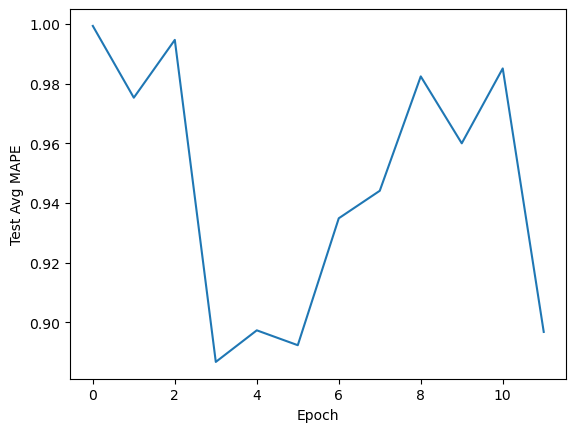

In [253]:
plt.plot(np.arange(len(l)), np.array(l).astype(float))
plt.xlabel('Epoch')
plt.ylabel('Test Avg MAPE')
plt.show()

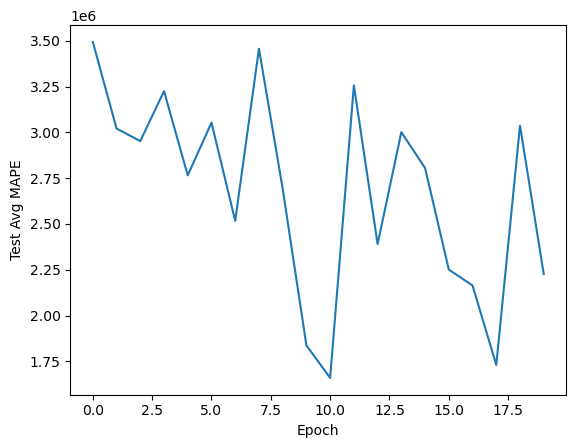

In [270]:
plt.plot(np.arange(len(l3)), np.array(l3).astype(float))
plt.xlabel('Epoch')
plt.ylabel('Test Avg MAPE')
plt.show()

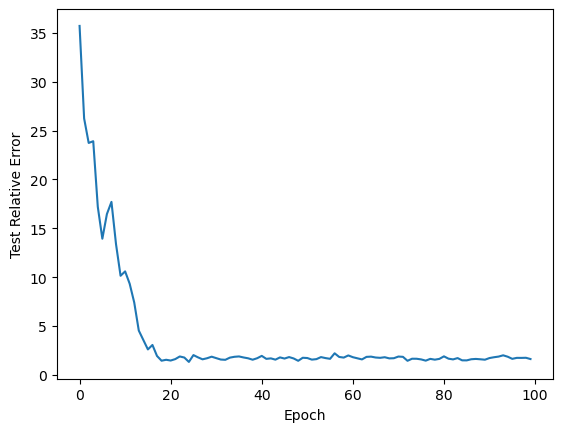

In [ ]:
plt.plot(np.arange(len(losses)), np.array(errors).astype(float))
plt.xlabel('Epoch')
plt.ylabel('Test Relative Error')
plt.show()